![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/00.SparkNLP_for_Healthcare_3h_Notebook.ipynb)

# Spark NLP for Healthcare Workshop - 3 hr

This is the 3 hr workshop version of the entire SparkNLP healthcare training notebooks : https://github.com/JohnSnowLabs/spark-nlp-workshop/tree/master/tutorials/Certification_Trainings/Healthcare

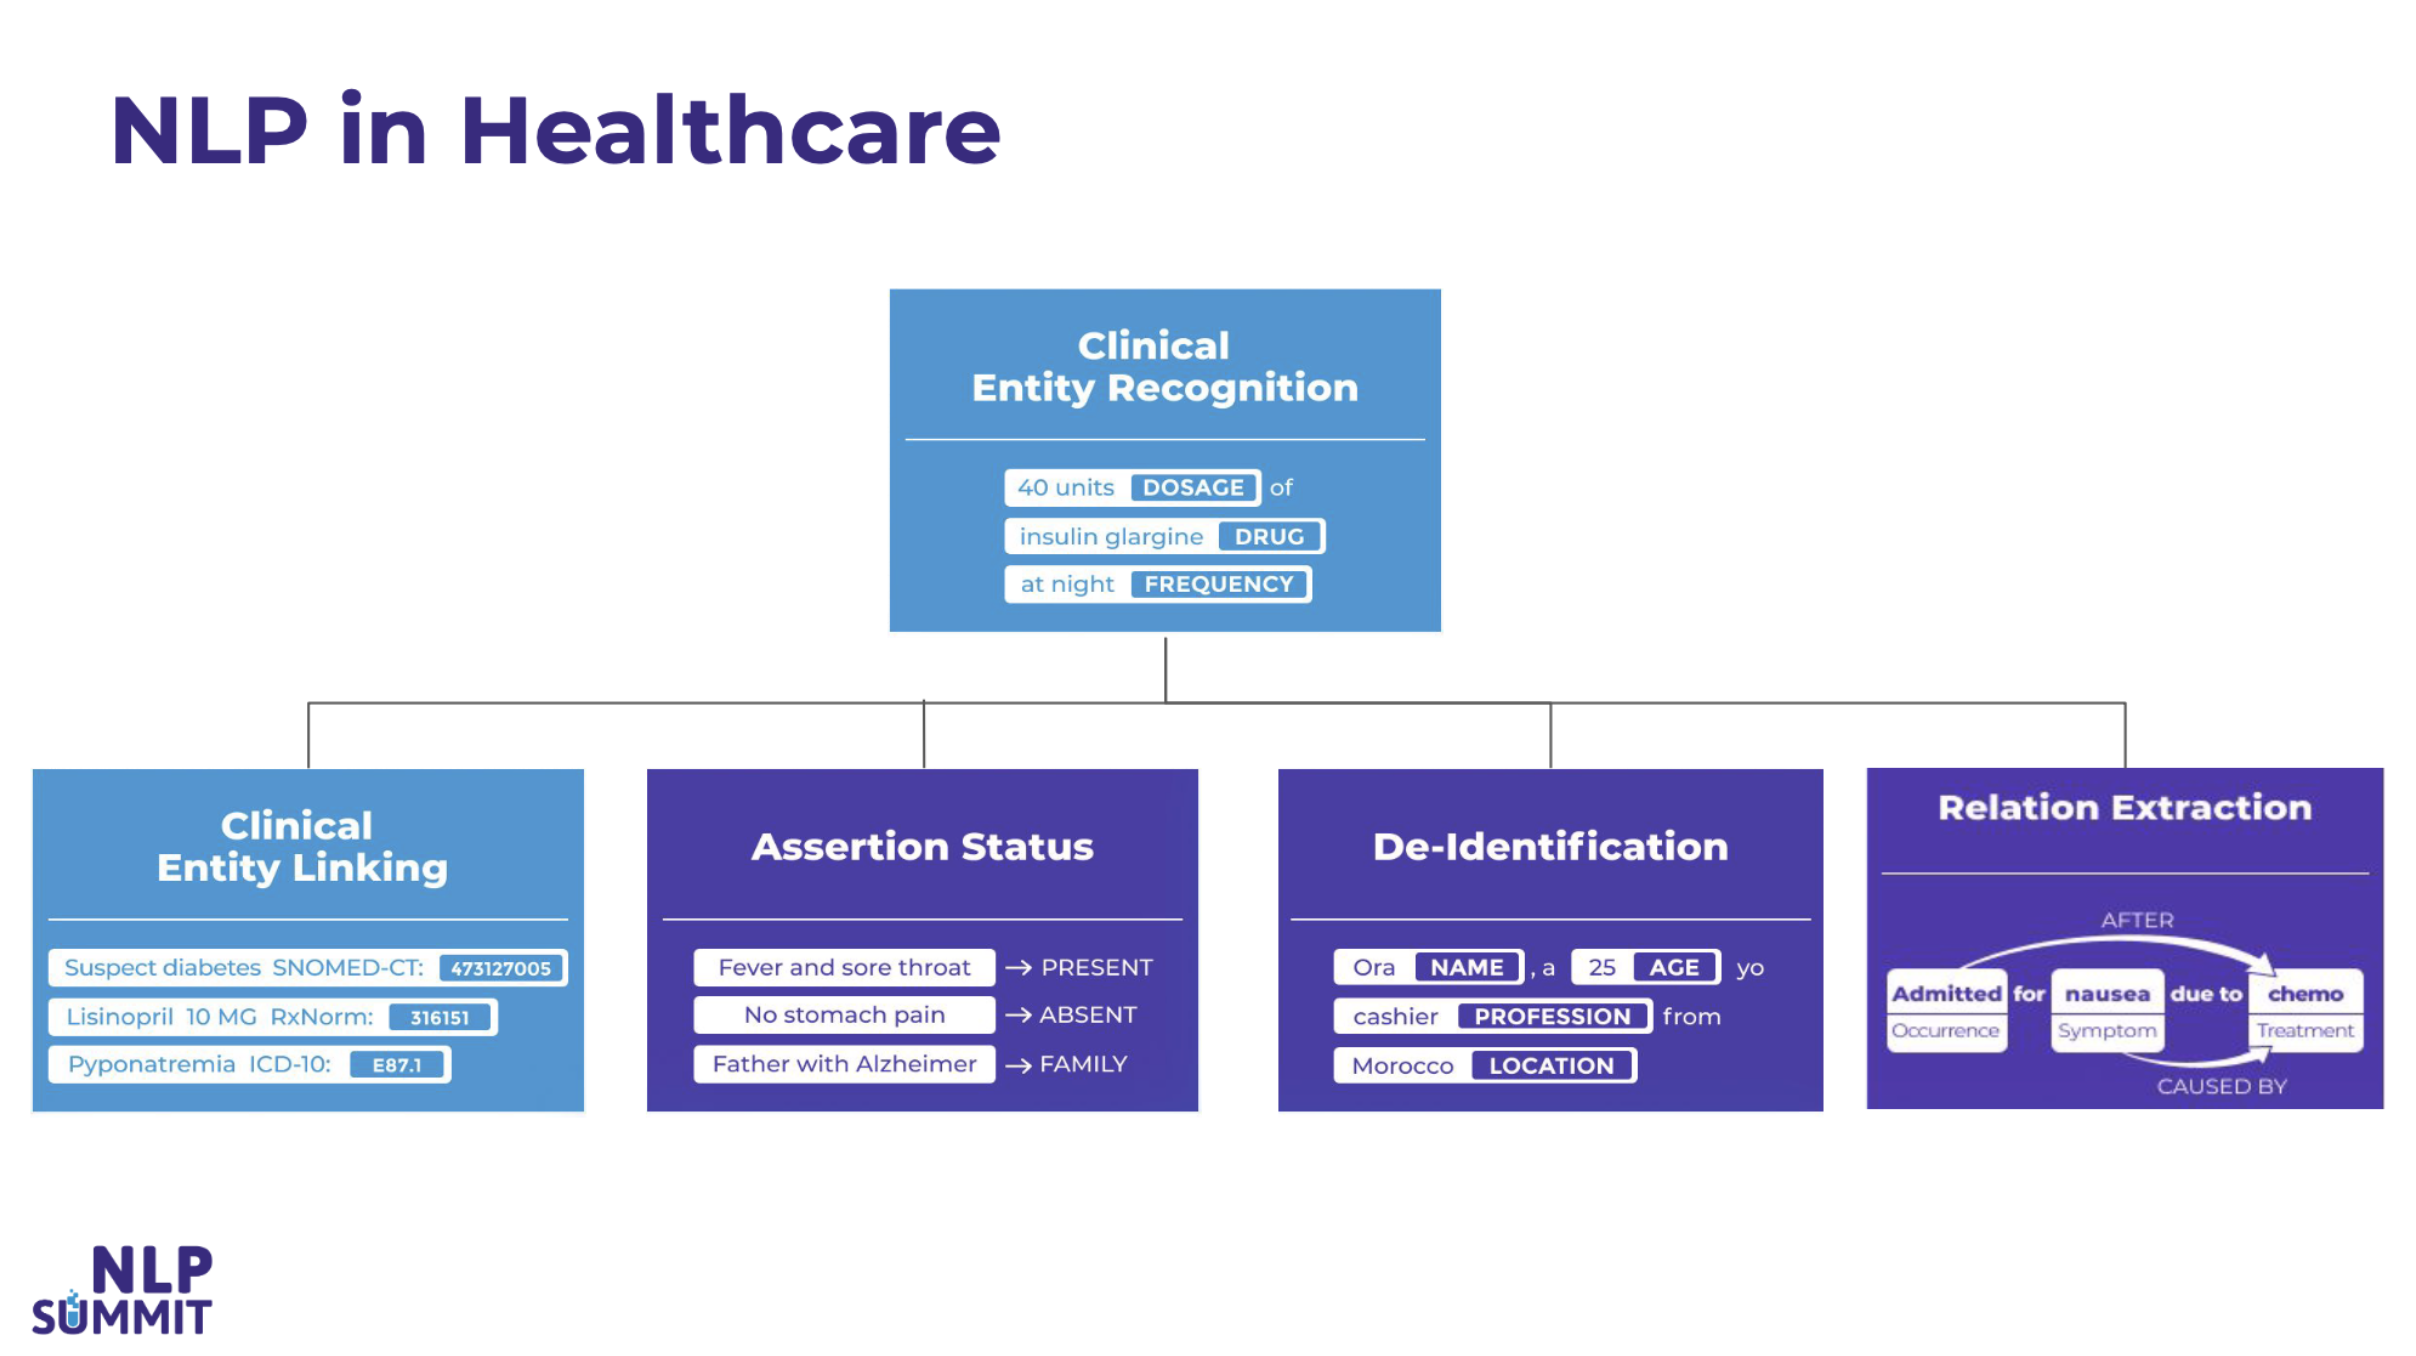

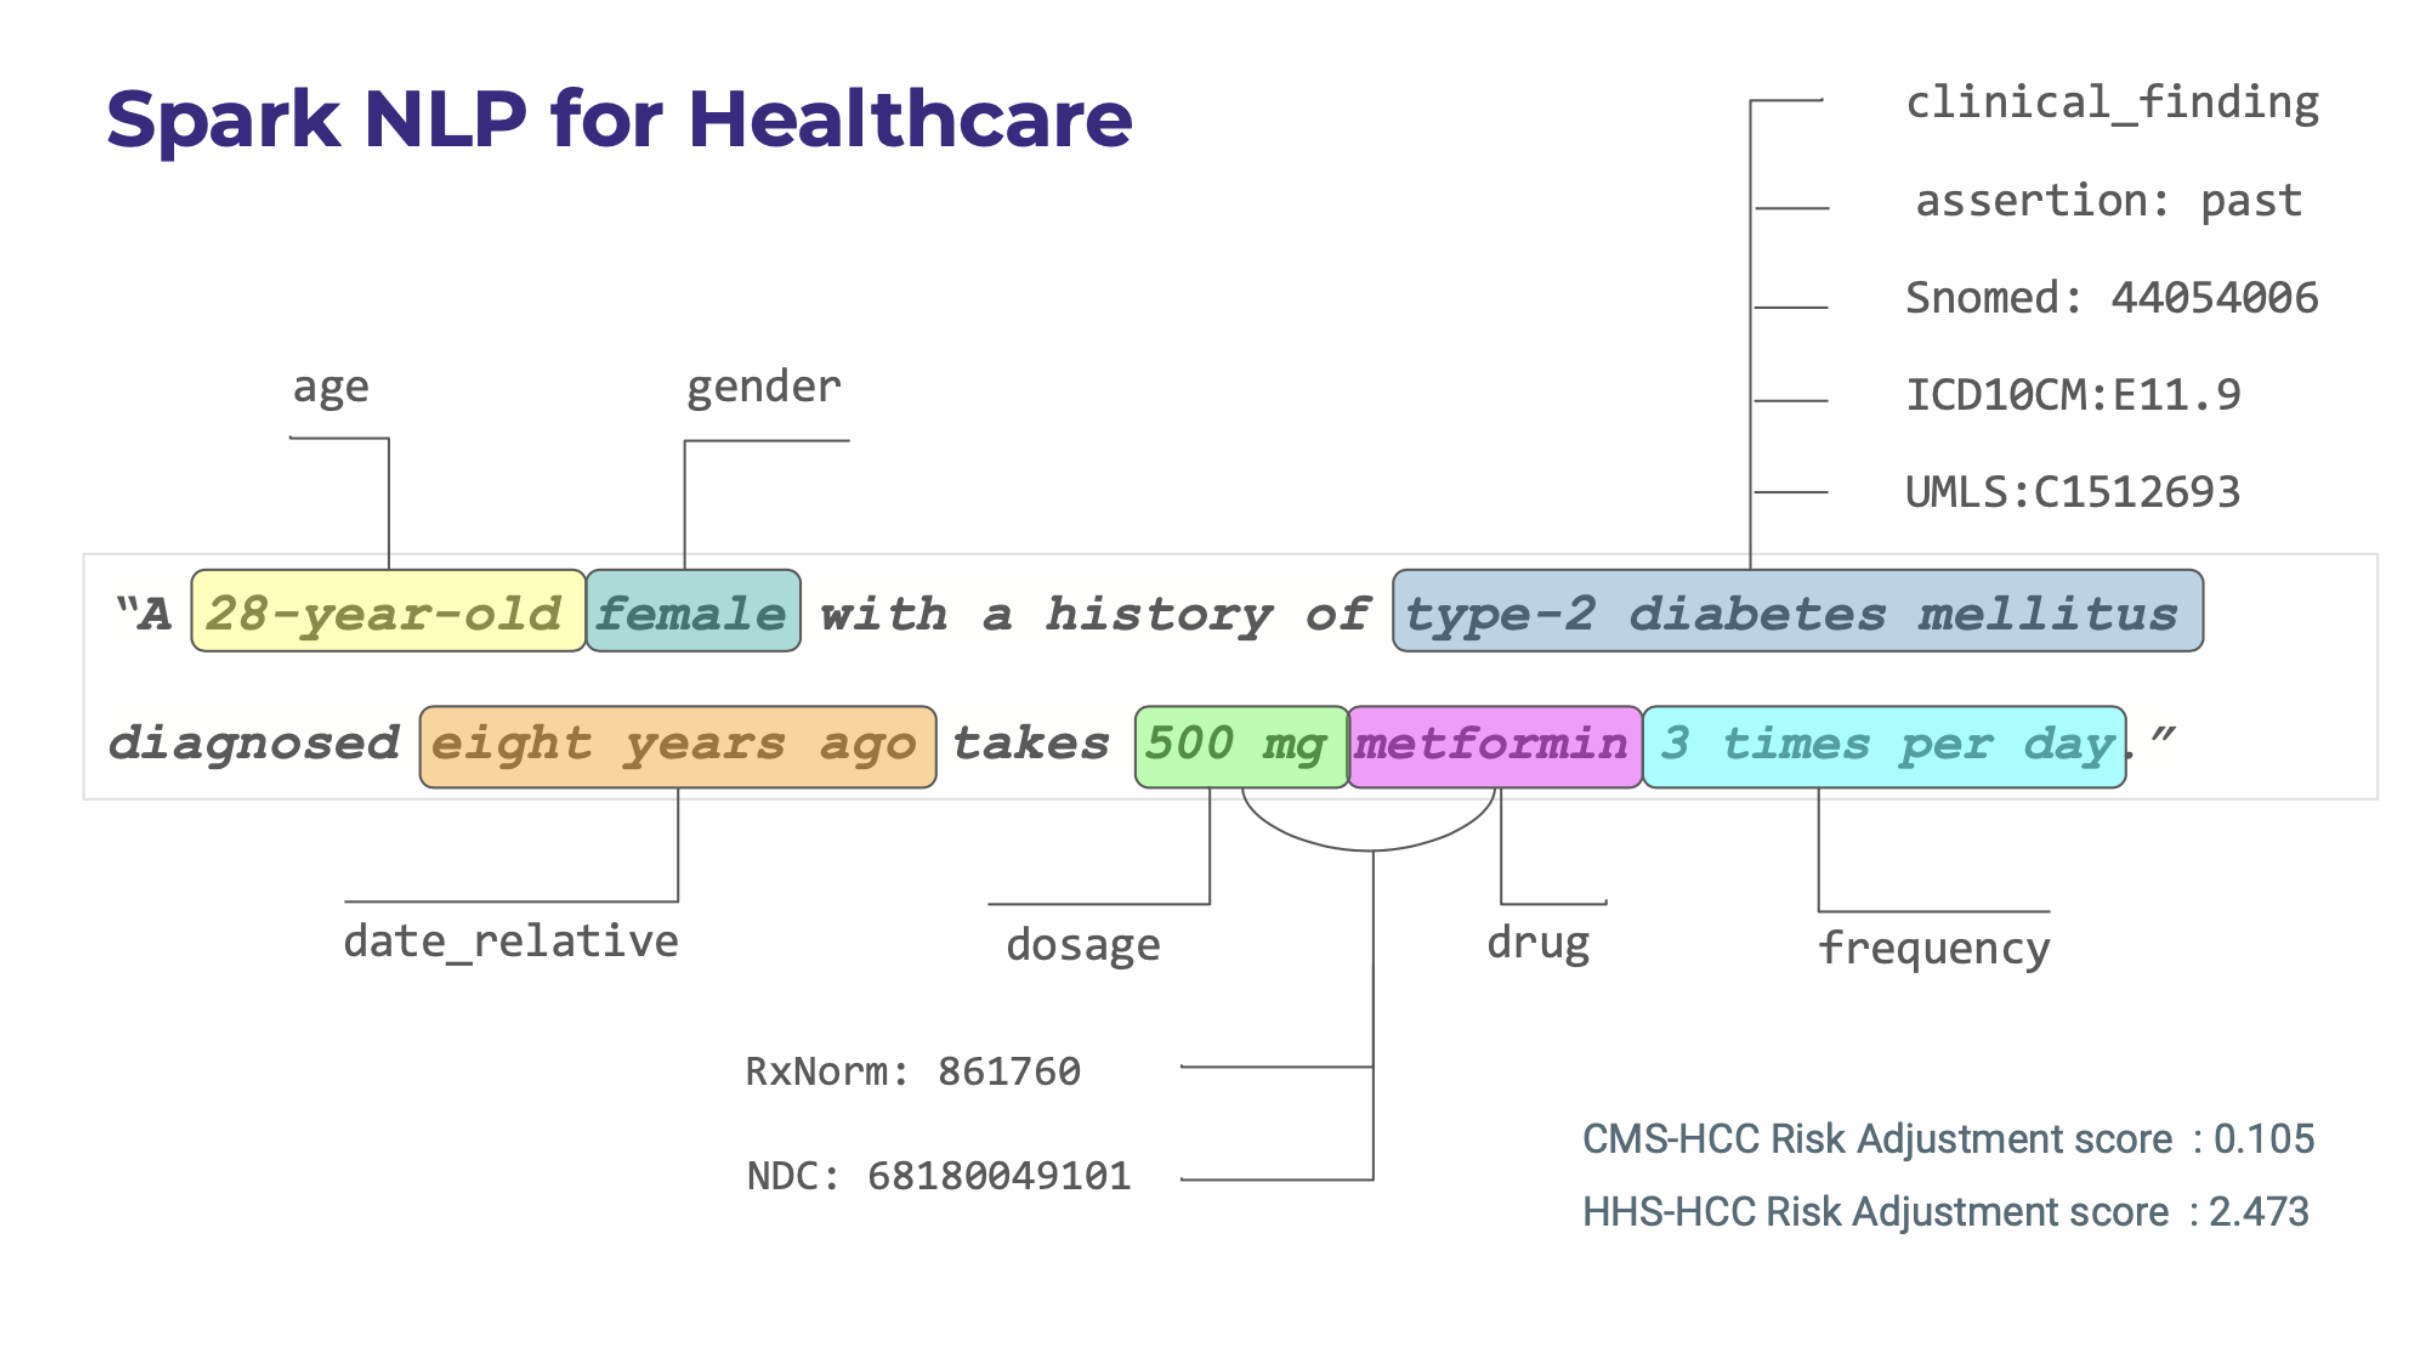

# Coding...

Colab set-up and installing library and packages

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs 

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, medical, visual

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.install()

In [ ]:
from johnsnowlabs import nlp, medical, visual
import pandas as pd

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

In [ ]:
from pyspark.sql import DataFrame
import pyspark.sql.functions as F
import pyspark.sql.types as T
import pyspark.sql as SQL
from pyspark import keyword_only

# 1.Clinical Named Entity Recognition (NER)

 The deep neural network architecture for NER model in
Spark NLP is BiLSTM-CNN-Char framework. a slightly modified version of the architecture proposed by Jason PC Chiu and Eric Nichols ([Named Entity Recognition with Bidirectional LSTM-CNNs
](https://arxiv.org/abs/1511.08308)). It is a neural network architecture that
automatically detects word and character-level features using a
hybrid bidirectional LSTM and CNN architecture, eliminating
the need for most feature engineering steps.

  In the original framework, the CNN extracts a fixed length
feature vector from character-level features. For each word,
these vectors are concatenated and fed to the BLSTM network
and then to the output layers. They employed a stacked
bi-directional recurrent neural network with long short-term
memory units to transform word features into named entity
tag scores. The extracted features of each word are fed into a
forward LSTM network and a backward LSTM network. The
output of each network at each time step is decoded by a linear
layer and a log-softmax layer into log-probabilities for each tag
category. These two vectors are then simply added together to
produce the final output. In the architecture of the proposed framework in the original paper, 50-dimensional pretrained word
embeddings is used for word features, 25-dimension character
embeddings is used for char features, and capitalization features
(allCaps, upperInitial, lowercase, mixedCaps, noinfo) are used
for case features.

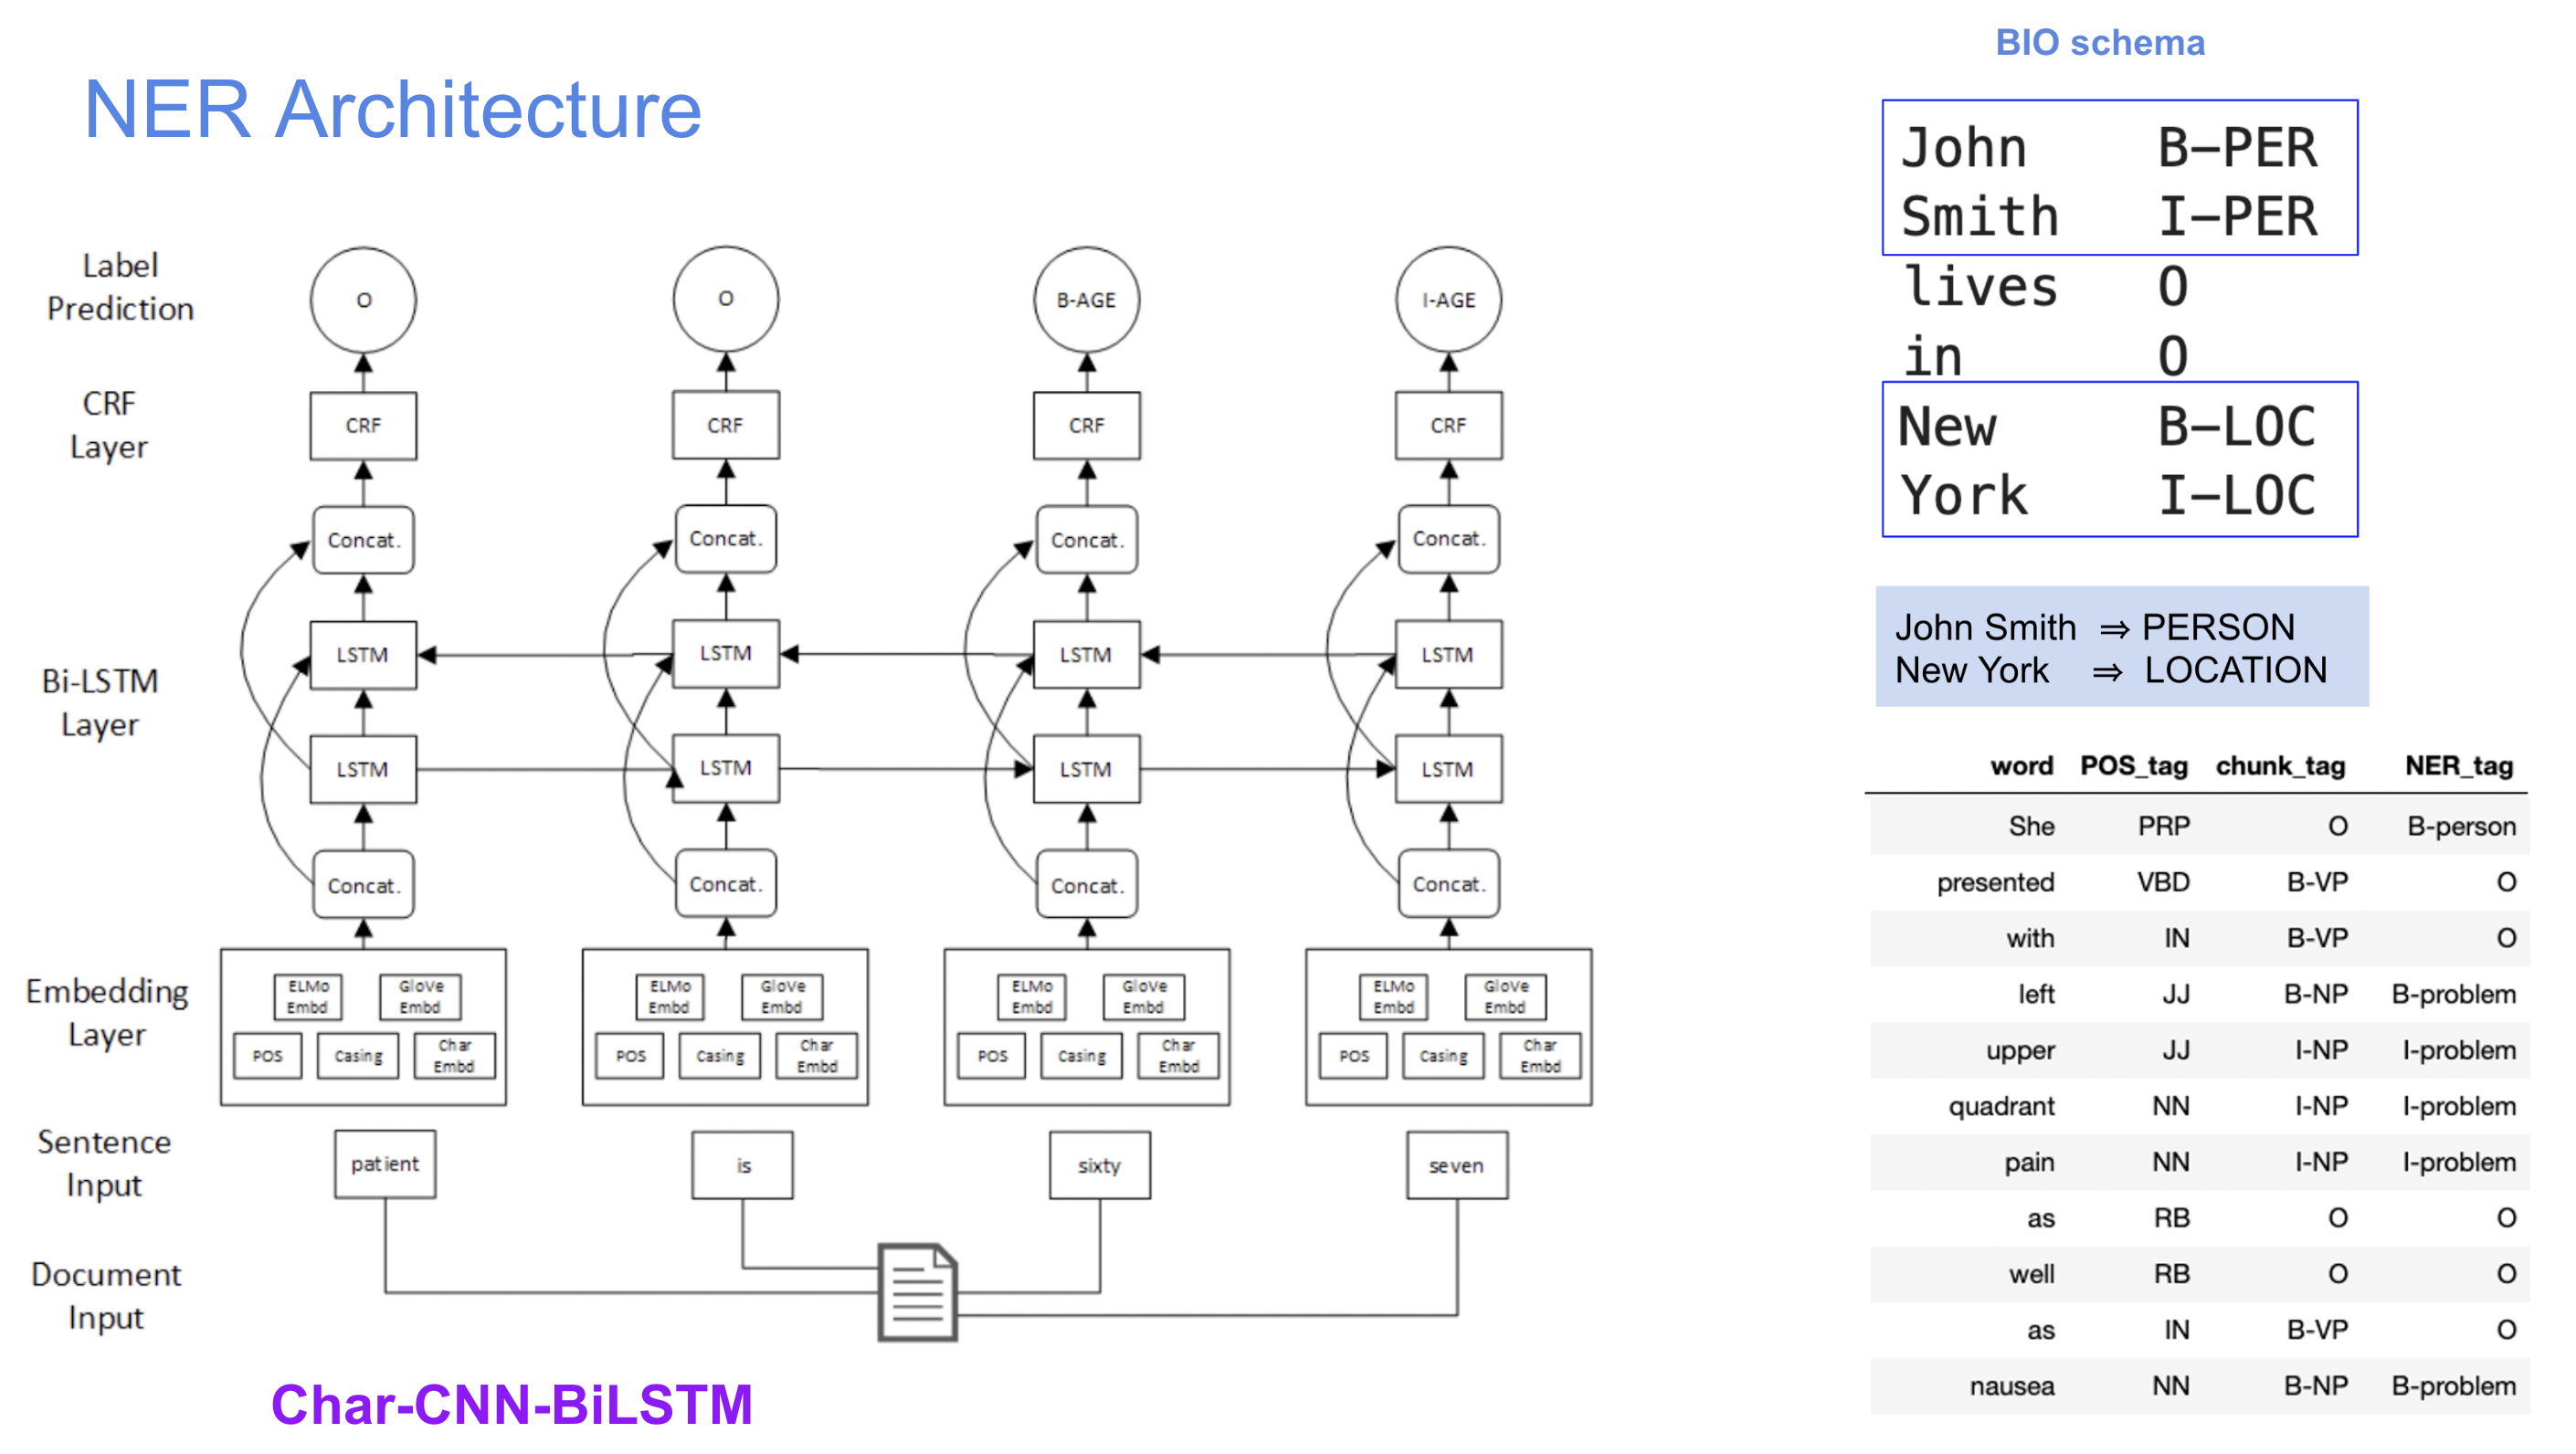

## Blogposts and videos:

- [How to Setup Spark NLP for HEALTHCARE on UBUNTU - Video](https://www.youtube.com/watch?v=yKnF-_oz0GE)

- [Named Entity Recognition (NER) with BERT in Spark NLP](https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77)

- [State of the art Clinical Named Entity Recognition in Spark NLP - Youtube](https://www.youtube.com/watch?v=YM-e4eOiQ34)

- [Named Entity Recognition for Healthcare with SparkNLP NerDL and NerCRF](https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571)

- [Named Entity Recognition for Clinical Text](https://medium.com/atlas-research/ner-for-clinical-text-7c73caddd180)

For more details about NER with SparkNLP, please visit [SparkNLP Workshop Repo](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.Clinical_Named_Entity_Recognition_Model.ipynb)

## Clinical NER Pipeline (with pretrained models)

SparkNLP has more than a hundred pretrained clinical NER pipelines which are trained with various domain-specific datasets and have various architectures. <br/>

**You can find all these models and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?task=Named+Entity+Recognition&edition=Spark+NLP+for+Healthcare)**


## Clinical NER Models
|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [jsl_ner_wip_clinical](https://nlp.johnsnowlabs.com/2021/03/31/jsl_ner_wip_clinical_en.html)  | 2| [jsl_ner_wip_greedy_clinical](https://nlp.johnsnowlabs.com/2021/03/31/jsl_ner_wip_greedy_clinical_en.html)  | 3| [jsl_ner_wip_modifier_clinical](https://nlp.johnsnowlabs.com/2021/04/01/jsl_ner_wip_modifier_clinical_en.html)  | 4| [jsl_rd_ner_wip_greedy_clinical](https://nlp.johnsnowlabs.com/2021/04/01/jsl_rd_ner_wip_greedy_clinical_en.html)  |
| 5| [ner_abbreviation_clinical](https://nlp.johnsnowlabs.com/2021/12/30/ner_abbreviation_clinical_en.html)  | 6| [ner_ade_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_clinical_en.html)  | 7| [ner_ade_clinicalbert](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_clinicalbert_en.html)  | 8| [ner_ade_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_healthcare_en.html)  |
| 9| [ner_anatomy](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_en.html)  | 10| [ner_anatomy_coarse](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_coarse_en.html)  | 11| [ner_anatomy_coarse_en](https://nlp.johnsnowlabs.com/2020/11/04/ner_anatomy_coarse_en.html)  | 12| [ner_anatomy_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_anatomy_en.html)  |
| 13| [ner_aspect_based_sentiment](https://nlp.johnsnowlabs.com/2021/03/31/ner_aspect_based_sentiment_en.html)  | 14| [ner_bacterial_species](https://nlp.johnsnowlabs.com/2021/04/01/ner_bacterial_species_en.html)  | 15| [ner_biomarker](https://nlp.johnsnowlabs.com/2021/11/26/ner_biomarker_en.html)  | 16| [ner_biomedical_bc2gm](https://nlp.johnsnowlabs.com/2022/05/11/ner_biomedical_bc2gm_en_2_4.html)  |
| 17| [ner_bionlp](https://nlp.johnsnowlabs.com/2021/03/31/ner_bionlp_en.html)  | 18| [ner_bionlp_en](https://nlp.johnsnowlabs.com/2020/01/30/ner_bionlp_en.html)  | 19| [ner_cancer_genetics](https://nlp.johnsnowlabs.com/2021/03/31/ner_cancer_genetics_en.html)  | 20| [ner_cellular](https://nlp.johnsnowlabs.com/2021/03/31/ner_cellular_en.html)  |
| 21| [ner_cellular_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_cellular_en.html)  | 22| [ner_chemd_clinical](https://nlp.johnsnowlabs.com/2021/11/04/ner_chemd_clinical_en.html)  | 23| [ner_chemicals](https://nlp.johnsnowlabs.com/2021/04/01/ner_chemicals_en.html)  | 24| [ner_chemprot_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_chemprot_clinical_en.html)  |
| 25| [ner_chexpert](https://nlp.johnsnowlabs.com/2021/09/30/ner_chexpert_en.html)  | 26| [ner_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_clinical_en.html)  | 27| [ner_clinical_en](https://nlp.johnsnowlabs.com/2020/01/30/ner_clinical_en.html)  | 28| [ner_clinical_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_clinical_large_en.html)  |
| 29| [ner_clinical_large_en](https://nlp.johnsnowlabs.com/2020/05/23/ner_clinical_large_en.html)  | 30| [ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/06/22/ner_clinical_trials_abstracts_en_3_0.html)  | 31| [ner_covid_trials](https://nlp.johnsnowlabs.com/2022/10/19/ner_covid_trials_en.html)  | 32| [ner_crf](https://nlp.johnsnowlabs.com/2020/01/28/ner_crf_en.html)  |
| 33| [ner_deid_augmented](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_augmented_en.html)  | 34| [ner_deid_enriched](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_enriched_en.html)  | 35| [ner_deid_generic_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_generic_glove_en.html)  | 36| [ner_deid_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_large_en.html)  |
| 37| [ner_deid_sd](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_en.html)  | 38| [ner_deid_sd_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_large_en.html)  | 39| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  | 40| [ner_deid_subentity_augmented_i2b2](https://nlp.johnsnowlabs.com/2021/11/29/ner_deid_subentity_augmented_i2b2_en.html)  |
| 41| [ner_deid_subentity_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_subentity_glove_en.html)  | 42| [ner_deid_synthetic](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_synthetic_en.html)  | 43| [ner_deidentify_dl](https://nlp.johnsnowlabs.com/2021/03/31/ner_deidentify_dl_en.html)  | 44| [ner_diseases](https://nlp.johnsnowlabs.com/2021/03/31/ner_diseases_en.html)  |
| 45| [ner_diseases_en](https://nlp.johnsnowlabs.com/2020/03/25/ner_diseases_en.html)  | 46| [ner_diseases_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_diseases_large_en.html)  | 47| [ner_drugprot_clinical](https://nlp.johnsnowlabs.com/2021/12/20/ner_drugprot_clinical_en.html)  | 48| [ner_drugs](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_en.html)  |
| 49| [ner_drugs_en](https://nlp.johnsnowlabs.com/2020/03/25/ner_drugs_en.html)  | 50| [ner_drugs_greedy](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_greedy_en.html)  | 51| [ner_drugs_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_drugs_large_en.html)  | 52| [ner_drugs_large_en](https://nlp.johnsnowlabs.com/2021/01/29/ner_drugs_large_en.html)  |
| 53| [ner_events_admission_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_events_admission_clinical_en.html)  | 54| [ner_events_clinical](https://nlp.johnsnowlabs.com/2021/03/31/ner_events_clinical_en.html)  | 55| [ner_events_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_events_healthcare_en.html)  | 56| [ner_financial_contract](https://nlp.johnsnowlabs.com/2021/04/01/ner_financial_contract_en.html)  |
| 57| [ner_genetic_variants](https://nlp.johnsnowlabs.com/2021/06/25/ner_genetic_variants_en.html)  | 58| [ner_healthcare](https://nlp.johnsnowlabs.com/2021/04/21/ner_healthcare_en.html)  | 59| [ner_healthcare_en](https://nlp.johnsnowlabs.com/2020/03/26/ner_healthcare_en.html)  | 60| [ner_human_phenotype_gene_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_human_phenotype_gene_clinical_en.html)  |
| 61| [ner_human_phenotype_go_clinical](https://nlp.johnsnowlabs.com/2020/09/21/ner_human_phenotype_go_clinical_en.html)  | 62| [ner_jsl](https://nlp.johnsnowlabs.com/2022/10/19/ner_jsl_en.html)  | 63| [ner_jsl_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_jsl_en.html)  | 64| [ner_jsl_enriched](https://nlp.johnsnowlabs.com/2021/10/22/ner_jsl_enriched_en.html)  |
| 65| [ner_jsl_enriched_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_jsl_enriched_en.html)  | 66| [ner_jsl_greedy](https://nlp.johnsnowlabs.com/2021/06/24/ner_jsl_greedy_en.html)  | 67| [ner_jsl_slim](https://nlp.johnsnowlabs.com/2021/08/13/ner_jsl_slim_en.html)  | 68| [ner_living_species](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_en_3_0.html)  |
| 69| [ner_measurements_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_measurements_clinical_en.html)  | 70| [ner_medmentions_coarse](https://nlp.johnsnowlabs.com/2021/04/01/ner_medmentions_coarse_en.html)  | 71| [ner_nature_nero_clinical](https://nlp.johnsnowlabs.com/2022/02/08/ner_nature_nero_clinical_en.html)  | 72| [ner_nihss](https://nlp.johnsnowlabs.com/2021/11/15/ner_nihss_en.html)  |
| 73| [ner_oncology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_en.html)  | 74| [ner_oncology_anatomy_general](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_anatomy_general_en.html)  | 75| [ner_oncology_anatomy_granular](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_anatomy_granular_en.html)  | 76| [ner_oncology_biomarker](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_biomarker_en.html)  |
| 77| [ner_oncology_demographics](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_demographics_en.html)  | 78| [ner_oncology_diagnosis](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_diagnosis_en.html)  | 79| [ner_oncology_posology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_posology_en.html)  | 80| [ner_oncology_response_to_treatment](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_response_to_treatment_en.html)  |
| 81| [ner_oncology_test](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_test_en.html)  | 82| [ner_oncology_therapy](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_therapy_en.html)  | 83| [ner_oncology_tnm](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_tnm_en.html)  | 84| [ner_oncology_unspecific_posology](https://nlp.johnsnowlabs.com/2022/10/25/ner_oncology_unspecific_posology_en.html)  |
| 85| [ner_pathogen](https://nlp.johnsnowlabs.com/2022/06/28/ner_pathogen_en_3_0.html)  | 86| [ner_posology](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_en.html)  | 87| [ner_posology_en](https://nlp.johnsnowlabs.com/2020/04/15/ner_posology_en.html)  | 88| [ner_posology_experimental](https://nlp.johnsnowlabs.com/2021/09/01/ner_posology_experimental_en.html)  |
| 89| [ner_posology_greedy](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_greedy_en.html)  | 90| [ner_posology_healthcare](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_healthcare_en.html)  | 91| [ner_posology_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_large_en.html)  | 92| [ner_posology_small](https://nlp.johnsnowlabs.com/2021/03/31/ner_posology_small_en.html)  |
| 93| [ner_radiology](https://nlp.johnsnowlabs.com/2021/03/31/ner_radiology_en.html)  | 94| [ner_radiology_wip_clinical](https://nlp.johnsnowlabs.com/2021/04/01/ner_radiology_wip_clinical_en.html)  | 95| [ner_risk_factors](https://nlp.johnsnowlabs.com/2021/03/31/ner_risk_factors_en.html)  | 96| [ner_risk_factors_en](https://nlp.johnsnowlabs.com/2020/04/22/ner_risk_factors_en.html)  |
| 97| [ner_sdoh_mentions](https://nlp.johnsnowlabs.com/2022/12/18/ner_sdoh_mentions_en.html)  | 98| [ner_sdoh_mentions_test](https://nlp.johnsnowlabs.com/2022/12/18/ner_sdoh_mentions_test_en.html)  | 99| [ner_supplement_clinical](https://nlp.johnsnowlabs.com/2022/02/01/ner_supplement_clinical_en.html)  | 100| [nerdl_tumour_demo](https://nlp.johnsnowlabs.com/2021/04/01/nerdl_tumour_demo_en.html)  |




- **BioBert NER Models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [jsl_ner_wip_greedy_biobert](https://nlp.johnsnowlabs.com/2021/07/26/jsl_ner_wip_greedy_biobert_en.html)  | 2| [jsl_rd_ner_wip_greedy_biobert](https://nlp.johnsnowlabs.com/2021/07/26/jsl_rd_ner_wip_greedy_biobert_en.html)  | 3| [ner_ade_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_ade_biobert_en.html)  | 4| [ner_anatomy_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_anatomy_biobert_en.html)  |
| 5| [ner_anatomy_coarse_biobert](https://nlp.johnsnowlabs.com/2021/03/31/ner_anatomy_coarse_biobert_en.html)  | 6| [ner_bionlp_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_bionlp_biobert_en.html)  | 7| [ner_cellular_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_cellular_biobert_en.html)  | 8| [ner_chemprot_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_chemprot_biobert_en.html)  |
| 9| [ner_clinical_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_clinical_biobert_en.html)  | 10| [ner_deid_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_biobert_en.html)  | 11| [ner_deid_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_enriched_biobert_en.html)  | 12| [ner_diseases_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_diseases_biobert_en.html)  |
| 13| [ner_events_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_events_biobert_en.html)  | 14| [ner_human_phenotype_gene_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_human_phenotype_gene_biobert_en.html)  | 15| [ner_human_phenotype_go_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_human_phenotype_go_biobert_en.html)  | 16| [ner_jsl_biobert](https://nlp.johnsnowlabs.com/2021/09/05/ner_jsl_biobert_en.html)  |
| 17| [ner_jsl_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_jsl_enriched_biobert_en.html)  | 18| [ner_jsl_greedy_biobert](https://nlp.johnsnowlabs.com/2021/08/13/ner_jsl_greedy_biobert_en.html)  | 19| [ner_living_species_biobert](https://nlp.johnsnowlabs.com/2022/06/22/ner_living_species_biobert_en_3_0.html)  | 20| [ner_posology_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_biobert_en.html)  |
| 21| [ner_posology_large_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_posology_large_biobert_en.html)  | 22| [ner_risk_factors_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_risk_factors_biobert_en.html)  | 23| []()| 24| []()|




- **BertForTokenClassification Clinical NER models**

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [bert_token_classifier_ade_tweet_binary](https://nlp.johnsnowlabs.com/2022/07/29/bert_token_classifier_ade_tweet_binary_en_3_0.html)  | 2| [bert_token_classifier_drug_development_trials](https://nlp.johnsnowlabs.com/2022/03/22/bert_token_classifier_drug_development_trials_en_3_0.html)  | 3| [bert_token_classifier_ner_ade](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_ade_en.html)  | 4| [bert_token_classifier_ner_ade_binary](https://nlp.johnsnowlabs.com/2022/07/27/bert_token_classifier_ner_ade_binary_en_3_0.html)  |
| 5| [bert_token_classifier_ner_anatem](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_anatem_en_3_0.html)  | 6| [bert_token_classifier_ner_anatomy](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_anatomy_en.html)  | 7| [bert_token_classifier_ner_bacteria](https://nlp.johnsnowlabs.com/2021/09/30/bert_token_classifier_ner_bacteria_en.html)  | 8| [bert_token_classifier_ner_bc2gm_gene](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc2gm_gene_en_3_0.html)  |
| 9| [bert_token_classifier_ner_bc4chemd_chemicals](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc4chemd_chemicals_en_3_0.html)  | 10| [bert_token_classifier_ner_bc5cdr_chemicals](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc5cdr_chemicals_en_3_0.html)  | 11| [bert_token_classifier_ner_bc5cdr_disease](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_bc5cdr_disease_en_3_0.html)  | 12| [bert_token_classifier_ner_bionlp](https://nlp.johnsnowlabs.com/2021/11/03/bert_token_classifier_ner_bionlp_en.html)  |
| 13| [bert_token_classifier_ner_cellular](https://nlp.johnsnowlabs.com/2021/11/03/bert_token_classifier_ner_cellular_en.html)  | 14| [bert_token_classifier_ner_chemicals](https://nlp.johnsnowlabs.com/2021/10/19/bert_token_classifier_ner_chemicals_en.html)  | 15| [bert_token_classifier_ner_chemprot](https://nlp.johnsnowlabs.com/2021/10/19/bert_token_classifier_ner_chemprot_en.html)  | 16| [bert_token_classifier_ner_clinical](https://nlp.johnsnowlabs.com/2022/01/06/bert_token_classifier_ner_clinical_en.html)  |
| 17| [bert_token_classifier_ner_clinical_trials_abstracts](https://nlp.johnsnowlabs.com/2022/06/29/bert_token_classifier_ner_clinical_trials_abstracts_en_3_0.html)  | 18| [bert_token_classifier_ner_deid](https://nlp.johnsnowlabs.com/2021/09/13/bert_token_classifier_ner_deid_en.html)  | 19| [bert_token_classifier_ner_drugs](https://nlp.johnsnowlabs.com/2021/09/20/bert_token_classifier_ner_drugs_en.html)  | 20| [bert_token_classifier_ner_jnlpba_cellular](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_jnlpba_cellular_en_3_0.html)  |
| 21| [bert_token_classifier_ner_jsl](https://nlp.johnsnowlabs.com/2021/09/16/bert_token_classifier_ner_jsl_en.html)  | 22| [bert_token_classifier_ner_jsl_slim](https://nlp.johnsnowlabs.com/2021/09/24/bert_token_classifier_ner_jsl_slim_en.html)  | 23| [bert_token_classifier_ner_linnaeus_species](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_linnaeus_species_en_3_0.html)  | 24| [bert_token_classifier_ner_living_species](https://nlp.johnsnowlabs.com/2022/06/26/bert_token_classifier_ner_living_species_en_3_0.html)  |
| 25| [bert_token_classifier_ner_ncbi_disease](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_ncbi_disease_en_3_0.html)  | 26| [bert_token_classifier_ner_pathogen](https://nlp.johnsnowlabs.com/2022/07/28/bert_token_classifier_ner_pathogen_en_3_0.html)  | 27| [bert_token_classifier_ner_species](https://nlp.johnsnowlabs.com/2022/07/25/bert_token_classifier_ner_species_en_3_0.html)  | 28| [bert_token_classifier_ner_supplement](https://nlp.johnsnowlabs.com/2022/02/09/bert_token_classifier_ner_supplement_en.html)  |




Let's start creating an example NER Pipeline. <br/>
In this pipeline, we will use `ner_jsl` pretrained model. By using this pretrained model, we can extract about 80 clinical entity labels by changing just only the ner model name in our pipeline.

**Entities**

| | | | | |
|-|-|-|-|-|
|Injury_or_Poisoning|Direction|Test|Admission_Discharge|Death_Entity|
|Relationship_Status|Duration|Respiration|Hyperlipidemia|Birth_Entity|
|Age|Labour_Delivery|Family_History_Header|BMI|Temperature|
|Alcohol|Kidney_Disease|Oncological|Medical_History_Header|Cerebrovascular_Disease|
|Oxygen_Therapy|O2_Saturation|Psychological_Condition|Heart_Disease|Employment|
|Obesity|Disease_Syndrome_Disorder|Pregnancy|ImagingFindings|Procedure|
|Medical_Device|Race_Ethnicity|Section_Header|Symptom|Treatment|
|Substance|Route|Drug_Ingredient|Blood_Pressure|Diet|
|External_body_part_or_region|LDL|VS_Finding|Allergen|EKG_Findings|
|Imaging_Technique|Triglycerides|RelativeTime|Gender|Pulse|
|Social_History_Header|Substance_Quantity|Diabetes|Modifier|Internal_organ_or_component|
|Clinical_Dept|Form|Drug_BrandName|Strength|Fetus_NewBorn|
|RelativeDate|Height|Test_Result|Sexually_Active_or_Sexual_Orientation|Frequency|
|Time|Weight|Vaccine|Vital_Signs_Header|Communicable_Disease|
|Dosage|Overweight|Hypertension|HDL|Total_Cholesterol|
|Smoking|Date||||

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
        
sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")
 
# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical","en","clinical/models")\
    .setInputCols(["sentence","token"])\
    .setOutputCol("embeddings")

# NER model trained on i2b2 (sampled from MIMIC) dataset
jsl_ner = medical.NerModel.pretrained("ner_jsl","en","clinical/models")\
    .setInputCols(["sentence","token","embeddings"])\
    .setOutputCol("jsl_ner")\
    # .setLabelCasing("upper") #decide if we want to return the tags in upper or lower case 

jsl_ner_converter = nlp.NerConverter()\
    .setInputCols(["sentence","token","jsl_ner"])\
    .setOutputCol("jsl_ner_chunk")

nlpPipeline = nlp.Pipeline(stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        jsl_ner,
        jsl_ner_converter])


model = nlpPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

We created our NER pipeline, let's check the stages. 

In [ ]:
model.stages

Now, let's transform our pipeline with sample data and see how our NER model works. 

In [ ]:
# Downloading sample datasets (oncology-related).
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/oncology_notes/mt_oncology_0.txt

In [ ]:
df = spark.read.format("text").load("mt_oncology_0.txt")
df= df.withColumnRenamed("value", "text")
df.show(truncate=False)

In [ ]:
df.count()

In [ ]:
#transform the pipeline with sample data
result = model.transform(df)

In [ ]:
result.show()

Let's see the labels of each token

In [ ]:
result_df = result.select(F.explode(F.arrays_zip("token.result","jsl_ner.result")).alias("cols"))\
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)

In [ ]:
result_df.select("token", "ner_label")\
         .groupBy('ner_label').count()\
         .orderBy('count', ascending=False)\
         .show(truncate=False)

As you see above, we have labels start with **"O", "B"** and **"I"**. <br/>
O means that the corresponding token is not labeled as any named entity. "B" means that the corresponding token refers to the beginning of the ner chunk while "I" means the continuation of the ner chunk.  <br/>

So, in our example, we have `deep venous thrombosis` `Disease_Syndrome_Disorder` chunk. In this case, `deep` labeled as `B-Disease_Syndrome_Disorder` since it is the beginnig of the chunk, `venous` and `thrombosis` labeled as `I-Disease_Syndrome_Disorder` as they are the continuation of the `Disease_Syndrome_Disorder` chunk. 


Now, let's check out the results as a **chunk-based** instead of token-based. 

In [ ]:
result.select(F.explode(F.arrays_zip('jsl_ner_chunk.result', 'jsl_ner_chunk.metadata')).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

As you see, our ner model successfully extracted useful named entities. <br/>

### with LightPipeline

We created a pipeline with `ner_jsl`. This time, let's use **LightPipeline** instead of `transform()`.

**LightPipeline** is a Spark NLP specific Pipeline class equivalent to Spark ML Pipeline. The difference is that its execution does not hold to Spark principles, instead, it computes everything locally (but in parallel) in order to achieve faster inference when dealing with small amounts of data. This means, we don't have to Spark Dataframe, but a string or an array of strings instead, to be annotated. To create Light Pipelines, you need to input an already trained (fit) Spark ML Pipeline.

 It’s `transform()` stage is converted into `annotate()` or `fullAnnotate()` instead. <br/>

Let's convert our existing ner pipeline to LightPipeline and see the results with an example text. 


In [ ]:
text = '''
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM )'''

print (text)

light_model = nlp.LightPipeline(model)

light_result = light_model.annotate(text)

light_result

In [ ]:
light_result.keys()

In [ ]:
list(zip(light_result['token'], light_result['jsl_ner']))

In [ ]:
text = '''
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 
'''

light_result_full = light_model.fullAnnotate(text)

In [ ]:
light_result_full

We used `fullAnnotate()` to see more detailed result

In [ ]:
chunks = []
entities = []
sentence= []
begin = []
end = []

for n in light_result_full[0]['jsl_ner_chunk']:
        
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    sentence.append(n.metadata['sentence'])
    
    
import pandas as pd

df_clinical = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end, 
                   'sentence_id':sentence, 'entities':entities})

df_clinical.head(20)

### NER Visualizer

The **NerVisualizer** highlights the named entities that are identified by Spark NLP and also displays their labels as decorations on top of the analyzed text. The colors assigned to the predicted labels can be configured to fit the particular needs of the application.

In [ ]:
from sparknlp_display import NerVisualizer

visualiser = nlp.viz.NerVisualizer()

visualiser.display(light_result_full[0], label_col='jsl_ner_chunk', document_col='document', save_path="display_result.html")

# Change color of an entity label

#visualiser.set_label_colors({'Age':'#008080', 'Gender':'#800080', 'Diabetes':'#808080'})
#visualiser.display(light_result[0], label_col='ner_chunk')

# Set label filter

# visualiser.display(light_result[0], label_col='jsl_ner_chunk', document_col='document',
                   #labels=['Symptom','Gender'])

## Clinical NER Chunk Merger

Sparknlp has the ability to merge the chunks that come from different annotators(NER, ContextualParser or any other annotator producing chunks) through the `ChunkMergeApproach()` annotator.  The decision on which chunk to select is made according to the chunk indices in the source document. (chunks with longer lengths and highest information will be kept from each source)


Let's create a sample pipeline consisting `ner_jsl`, `ner_posology` and `ner_deid_generic` models, and merge the outputs of these models. 

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP

documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model to detect PHI entities
deid_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner")

deid_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner"]) \
    .setOutputCol("deid_ner_chunk")\
    .setWhiteList(["AGE", "DATE", "LOCATION"]) # only AGE, DATE and LOCATION entities

# NER model to detect clinical entities (PROBLEM, TEST, TREATMENT)
clinical_ner = medical.NerModel.pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "clinical_ner"]) \
    .setOutputCol("clinical_ner_chunk")\
    .setBlackList(["TREATMENT"]) # blocks TREATMENT entities 

# NER model to detect medication entities (Durg, Dosage, etc.))
posology_ner = medical.NerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "posology_ner"]) \
    .setOutputCol("posology_ner_chunk")


# merge ner_chunks by prioritizing the overlapping indices (chunks with longer lengths and highest information will be kept from each ner model)
chunk_merger = medical.ChunkMergeApproach()\
    .setInputCols('deid_ner_chunk', "clinical_ner_chunk", "posology_ner_chunk")\
    .setOutputCol('merged_ner_chunk')


nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner,
    deid_ner_converter,
    clinical_ner,
    clinical_ner_converter,
    posology_ner,
    posology_ner_converter,
    chunk_merger])


empty_data = spark.createDataFrame([[""]]).toDF("text")
model = nlpPipeline.fit(empty_data)

In [ ]:
text = """HISTORY AND PHYSICAL: The patient is from Vietnam, 41-year-old female with a nonproductive cough that started on Sep 2006. 
          She has had right-sided chest pain radiating to her back with fever starting on November 5, 2006. 
          She has a history of pericarditis and pericardectomy in May 2006 and developed cough with right-sided chest pain, and went to an urgent care center. Chest x-ray revealed right-sided pleural effusion.
          MEDICATIONS: Coumadin 1 mg daily. Last INR was on Tuesday, August 14, 2007, and INR was 2.3. Amiodarone 100 mg p.o. daily.
       """

spark_df = spark.createDataFrame([[text]]).toDF("text")

merged_data = model.transform(spark_df)

%time merged_data.show()

In [ ]:
lp_model = nlp.LightPipeline(model)

In [ ]:
%time lp_result = lp_model.annotate(text)

Let's see the results

In [ ]:
result_df = merged_data.select(F.explode('merged_ner_chunk').alias("cols")) \
                       .select(F.expr("cols.begin").alias("begin"),
                               F.expr("cols.end").alias("end"),
                               F.expr("cols.result").alias("chunk"),
                               F.expr("cols.metadata.entity").alias("entity"))

result_df.show(50, truncate=100)

## Clinical NER Training

In this section, we will train our own NER model. <br/>
Firstly, let's download NCBI Disease dataset for training. 

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/NER_NCBIconlltrain.txt
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/NER_NCBIconlltest.txt

`CoNLL(includeDocId=True).readDataset(spark, "conll_file.txt")`  this methos can allow if you have doc_id information in the conll file, you can add this information to the dataframe as a column. 

```
conll="""-DOCSTART- -X- -1- O

EU NNP B-NP B-ORG
rejects VBZ B-VP O

-DOCSTART- -X- 2 O

Rare NNP B-NP O
Hendrix NNP I-NP B-PER

-DOCSTART- -X- -3-1- O

China NNP B-NP B-LOC
says VBZ B-VP O

-DOCSTART-

China NNP B-NP B-LOC
says VBZ B-VP O
"""
```
```
with open('conll_file.txt', 'w') as f:
    f.write(conll)

data = CoNLL(includeDocId=True).readDataset(spark, "conll_file.txt")

data.show()
```



```
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|doc_id|                text|            document|            sentence|               token|                 pos|               label|
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     1|EU rejects German...|[{document, 0, 28...|[{document, 0, 47...|[{token, 0, 1, EU...|[{pos, 0, 1, NNP,...|[{named_entity, 0...|
|     2|Rare Hendrix song...|[{document, 0, 97...|[{document, 0, 50...|[{token, 0, 3, Ra...|[{pos, 0, 3, NNP,...|[{named_entity, 0...|
|   3-1|China says Taiwan...|[{document, 0, 13...|[{document, 0, 46...|[{token, 0, 4, Ch...|[{pos, 0, 4, NNP,...|[{named_entity, 0...|
|     X|China says Taiwan...|[{document, 0, 13...|[{document, 0, 46...|[{token, 0, 4, Ch...|[{pos, 0, 4, NNP,...|[{named_entity, 0...|
+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
```

In [ ]:
from sparknlp.training import CoNLL

conll_data = CoNLL().readDataset(spark, 'NER_NCBIconlltrain.txt')
conll_data.show(3)

In [ ]:
conll_data.count()

Checking the number of labels in the dataset

In [ ]:
from pyspark.sql import functions as F

conll_data.select(F.explode(F.arrays_zip('token.result','label.result')).alias("cols")) \
          .select(F.expr("cols['0']").alias("token"),
                  F.expr("cols['1']").alias("ground_truth"))\
          .groupBy('ground_truth')\
          .count()\
          .orderBy('count', ascending=False)\
          .show(100,truncate=False)

In [ ]:
'''
As you can see, there are too many `O` labels in the dataset. 
To make it more balanced, we can drop the sentences have only O labels.
(`c>1` means we drop all the sentences that have no valuable labels other than `O`)
'''

'''
conll_data = conll_data.withColumn('unique', F.array_distinct("label.result"))\
                       .withColumn('c', F.size('unique'))\
                       .filter(F.col('c')>1)

conll_data.select(F.explode(F.arrays_zip('token.result','label.result')).alias("cols")) \
          .select(F.expr("cols['0']").alias("token"),
                  F.expr("cols['1']").alias("ground_truth"))\
          .groupBy('ground_truth')\
          .count()\
          .orderBy('count', ascending=False)\
          .show(100,truncate=False)
'''

Now, let's download the embeddings. We will transform the embeddings with our test data in order to use the `setTestDataset()` parameter of `MedicalNerApproach()` during the training. This parameter is used to calculate statistics on test dataset during training.

In [ ]:
# Clinical word embeddings trained on PubMED dataset
clinical_embeddings = nlp.WordEmbeddingsModel.pretrained('embeddings_clinical', "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

Let's read the test dataset and get its embeddings, then save it as a parquet format to use it in the training. 

In [ ]:
test_data = CoNLL().readDataset(spark, 'NER_NCBIconlltest.txt')

test_data = clinical_embeddings.transform(test_data)

test_data.write.parquet('NER_NCBIconlltest.parquet')

### NERDL Graph

We will use `TFGraphBuilder` annotator which can be used to create graphs in the model training pipeline. `TFGraphBuilder` inspects the data and creates the proper graph if a suitable version of TensorFlow is available. The graph is stored in the defined folder and loaded by the `MedicalNerApproach` annotator.

In [ ]:
!pip install -q tensorflow==2.7.0
!pip install -q tensorflow-addons

In [ ]:
from sparknlp_jsl.annotator import TFGraphBuilder

graph_folder_path = "medical_ner_graphs"

ner_graph_builder = medical.TFGraphBuilder()\
    .setModelName("ner_dl")\
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setLabelColumn("label")\
    .setGraphFolder(graph_folder_path)\
    .setGraphFile("auto")\
    .setHiddenUnitsNumber(20)\
    .setIsLicensed(True) # False -> if you want to use TFGraphBuilder with NerDLApproach

Also, we could use custom graph like following;

In [ ]:
# TensorFlow graph file (`.pb` extension) can be produced for NER training externally. 
# If this method is used, graph folder should be added to MedicalNerApproach training 
# model as `.setGraphFolder(graph_folder_path)` .

'''
from sparknlp_jsl.training import tf_graph

tf_graph.print_model_params("ner_dl")

graph_folder_path = "medical_ner_graphs"
tf_graph.build("ner_dl", 
               build_params={"embeddings_dim": 200, 
                             "nchars": 85, 
                             "ntags": 3, 
                             "is_medical": 1}, 
               model_location=graph_folder_path, 
               model_filename="auto")
'''

In [ ]:
# for open source users

'''
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/jupyter/training/english/dl-ner/nerdl-graph/create_graph.py
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/jupyter/training/english/dl-ner/nerdl-graph/dataset_encoder.py
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/jupyter/training/english/dl-ner/nerdl-graph/ner_model.py
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/jupyter/training/english/dl-ner/nerdl-graph/ner_model_saver.py
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/jupyter/training/english/dl-ner/nerdl-graph/sentence_grouper.py

!pip -q install tensorflow==1.15.0

import create_graph

ntags = 3 # number of labels
embeddings_dim = 200
nchars =83

create_graph.create_graph(ntags, embeddings_dim, nchars)
'''

Now we can train our model through `MedicalNerApproach()`

We will use `setEarlyStoppingCriterion` and `setEarlyStoppingPatience` parameters to stop training if it doesn't improve any more. Also, these parameters will provide us to save time and resources.

- `setEarlyStoppingCriterion(float)`: This parameter is used to set the minimal improvement of the test metric to terminate training. The metric monitored is the same which is used to save the best best model (macro F1 if using test or validation set, loss otherwise). If it is F1, then training is stopped if `F1_current - F1_previous < earlyStoppingCriterion`. If monitoring loss, then training is stopped if `loss_previous - loss_current < earlyStoppingCriterion`. If earlyStoppingCriterion is `0`, then no early stopping is applied. Default is `0`.

- `setEarlyStoppingPatience(int)`: This is the number of epoch without improvement which will be tolerated. Default is `0`, which means that early stopping will occur at the first time when performance in the current epoch is no better than in the previous epoch (taking earlyStoppingCriterion into account).

In [ ]:
nerTagger = medical.NerApproach()\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setLabelColumn("label")\
    .setOutputCol("ner")\
    .setMaxEpochs(30)\
    .setBatchSize(64)\
    .setRandomSeed(0)\
    .setVerbose(1)\
    .setValidationSplit(0.2)\
    .setEvaluationLogExtended(True) \
    .setEnableOutputLogs(True)\
    .setIncludeConfidence(True)\
    .setOutputLogsPath('ner_logs')\
    .setTestDataset("NER_NCBIconlltest.parquet")\
    .setUseBestModel(True)\
    .setEarlyStoppingCriterion(0.04)\
    .setEarlyStoppingPatience(3)\
    .setGraphFolder(graph_folder_path)
   # .setEnableMemoryOptimizer(True) #>> if you have a limited memory and a large conll file, you can set this True to train batch by batch       

ner_pipeline = nlp.Pipeline(stages=[
          clinical_embeddings,
          ner_graph_builder,
          nerTagger
 ])

You can visit [1.4.Resume_MedicalNer_Model_Training.ipynb](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.4.Resume_MedicalNer_Model_Training.ipynb) notebook for fine-tuning pretrained NER models and more details of `MedicalNerApproach()` parameters.

In [ ]:
%%time
ner_model = ner_pipeline.fit(conll_data)

If you get an error for incompatible TF graph, use [4.1 NerDL-Graph](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/4.1_NerDL_Graph.ipynb) notebook in public folder to create a graph

Licensed users can also use [17.Graph_builder_for_DL_models.ipynb](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/17.Graph_builder_for_DL_models.ipynb) to create TF graphs easily.

`getTrainingClassDistribution()` parameter returns the distribution of labels used when training the NER model.

In [ ]:
ner_model.stages[2].getTrainingClassDistribution()

Let's check the results saved in the log file.

In [ ]:
import os 
log_file= os.listdir("ner_logs")[0]

with open (f"./ner_logs/{log_file}") as f:
  print(f.read())

As you see above, our **earlyStopping** feature worked, trainining was terminated before 30th epoch.

### Evaluating the Model

Firstly, we will get the predictions from test data

In [ ]:
pred_df = ner_model.stages[2].transform(test_data)

In [ ]:
pred_df.columns

Now, let's see the metrics by using **eval** package of sparknlp_jsl

In [ ]:
# chunk-based evaluation (full_chunk) mode

from sparknlp_jsl.eval import NerDLMetrics
import pyspark.sql.functions as F

evaler = medical.NerDLMetrics(mode="full_chunk")

eval_result = evaler.computeMetricsFromDF(pred_df.select("label","ner"), prediction_col="ner", label_col="label", drop_o = True, case_sensitive = True).cache()

eval_result.withColumn("precision", F.round(eval_result["precision"],4))\
           .withColumn("recall", F.round(eval_result["recall"],4))\
           .withColumn("f1", F.round(eval_result["f1"],4)).show(100)

print(eval_result.selectExpr("avg(f1) as macro").show())
print (eval_result.selectExpr("sum(f1*total) as sumprod","sum(total) as sumtotal").selectExpr("sumprod/sumtotal as micro").show())

In [ ]:
# token-based evaluation (partial_chunk_per_token mode)

evaler = medical.NerDLMetrics(mode="partial_chunk_per_token")

eval_result = evaler.computeMetricsFromDF(pred_df.select("label","ner"), prediction_col="ner", label_col="label", drop_o = True, case_sensitive = True).cache()

eval_result.withColumn("precision", F.round(eval_result["precision"],4))\
           .withColumn("recall", F.round(eval_result["recall"],4))\
           .withColumn("f1", F.round(eval_result["f1"],4)).show(100)

print(eval_result.selectExpr("avg(f1) as macro").show())
print (eval_result.selectExpr("sum(f1*total) as sumprod","sum(total) as sumtotal").selectExpr("sumprod/sumtotal as micro").show())

`ner_utils`: This new module is used after NER training to calculate chunkbase mertics and plot training logs.

`evaluate`: if verbose, returns overall performance, as well as performance per chunk type; otherwise, simply returns overall precision, recall, f1 scores

`loss_plot`: Plots the figure of loss vs epochs

`get_charts` : Plots the figures of metrics ( precision, recall, f1) vs epochs

```
from sparknlp_jsl.utils.ner_utils import get_charts, loss_plot, evaluate

metrics = evaluate( preds_df['prediction'].values, preds_df['ground_truth'].values)

loss_plot(f"./ner_logs/{log_file}")

get_charts('./ner_logs/'+log_files[0])
```

### Saving the model and using it in different pipeline

We can save our custom ner model and use it in other pieplines with the `load()` method of `MedicalNerModel`

In [ ]:
#saving the model
ner_model.stages[2].write().overwrite().save('models/custom_NER')

In [ ]:
document = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence = nlp.SentenceDetector()\
    .setInputCols(['document'])\
    .setOutputCol('sentence')

token = nlp.Tokenizer()\
    .setInputCols(['sentence'])\
    .setOutputCol('token')

#custom ner model
loaded_ner_model = medical.NerModel.load("models/custom_NER")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("ner")

converter = medical.NerConverterInternal()\
    .setInputCols(["document", "token", "ner"])\
    .setOutputCol("ner_span")

ner_prediction_pipeline = nlp.Pipeline(
    stages = [
        document,
        sentence,
        token,
        clinical_embeddings,
        loaded_ner_model,
        converter])

empty_data = spark.createDataFrame([['']]).toDF("text")

prediction_model = ner_prediction_pipeline.fit(empty_data)


We just created a pipeline with our ner model, let's apply it over a sample data and see the results with LightPipeline quickly

In [ ]:
from sparknlp.base import LightPipeline

light_model = nlp.LightPipeline(prediction_model)

In [ ]:
text = "The patient just received a lung cancer diagnosis"

result = light_model.fullAnnotate(text)[0]

[(i.result, i.metadata['entity']) for i in result['ner_span']]

As you see, we succesfully trained an NER model with our own data, saved it and got predictions!

**FINE-TUNING NER MODELS:**

You can visit [1.4.Resume_MedicalNer_Model_Training.ipynb](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.4.Resume_MedicalNer_Model_Training.ipynb) notebook for fine-tuning pretrained NER models and more details of `MedicalNerApproach()` parameters.

## BertForTokenClassification NER models

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols("sentence")\
    .setOutputCol("token")

tokenClassifier = medical.BertForTokenClassification.pretrained("bert_token_classifier_ner_clinical", "en", "clinical/models")\
    .setInputCols("token", "sentence")\
    .setOutputCol("ner")\
    .setCaseSensitive(True)

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

pipeline =  nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    tokenClassifier,
    ner_converter
    ])

model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

text = """A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting . 
Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . 
Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 . 
Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia . 
The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission . 
However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L . 
The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again . 
The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours . 
Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use . 
The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . 
It was determined that all SGLT2 inhibitors should be discontinued indefinitely . She had close follow-up with endocrinology post discharge ."""

res = model.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
from pyspark.sql import functions as F

res.select(F.explode(F.arrays_zip(res.ner_chunk.result, 
                                  res.ner_chunk.begin, 
                                  res.ner_chunk.end, 
                                  res.ner_chunk.metadata)).alias("cols")) \
   .select(F.expr("cols['3']['sentence']").alias("sentence_id"),
           F.expr("cols['0']").alias("chunk"),
           F.expr("cols['2']").alias("end"),
           F.expr("cols['3']['entity']").alias("ner_label"))\
   .filter("ner_label!='O'")\
   .show(truncate=False)

In [ ]:
light_model = nlp.LightPipeline(model)

light_result = light_model.fullAnnotate(text)

from sparknlp_display import NerVisualizer

visualiser = nlp.viz.NerVisualizer()

visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', save_path="display_bert_result.html")

**Training Clinical BertForTokenClassification Model**

For training your own BertForTokenClassification NER model, you can check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.5.BertForTokenClassification_NER_SparkNLP_with_Transformers.ipynb)

## Pretrained NER Profiling Pipelines

We can use pretrained NER profiling pipelines for exploring all the available pretrained NER models at once. In Spark NLP we have two different NER profiling pipelines;

- `ner_profiling_clinical` : Returns results for clinical NER models trained with `embeddings_clinical`.
- `ner_profiling_biobert` : Returns results for clinical NER models trained with `biobert_pubmed_base_cased`.

For more examples, please check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.2.Pretrained_NER_Profiling_Pipelines.ipynb).





<center><b>NER Profiling Clinical Model List</b>

|| | | |
|--------------|-----------------|-----------------|-----------------|
| jsl_ner_wip_clinical | jsl_ner_wip_greedy_clinical | jsl_ner_wip_modifier_clinical | jsl_rd_ner_wip_greedy_clinical |
| ner_abbreviation_clinical | ner_ade_binary | ner_ade_clinical | ner_anatomy |
| ner_anatomy_coarse | ner_bacterial_species | ner_biomarker | ner_biomedical_bc2gm |
| ner_bionlp | ner_cancer_genetics | ner_cellular | ner_chemd_clinical |
| ner_chemicals | ner_chemprot_clinical | ner_chexpert | ner_clinical |
| ner_clinical_large | ner_clinical_trials_abstracts | ner_covid_trials | ner_deid_augmented |
| ner_deid_enriched | ner_deid_generic_augmented | ner_deid_large | ner_deid_sd |
| ner_deid_sd_large | ner_deid_subentity_augmented | ner_deid_subentity_augmented_i2b2 | ner_deid_synthetic |
| ner_deidentify_dl | ner_diseases | ner_diseases_large | ner_drugprot_clinical |
| ner_drugs | ner_drugs_greedy | ner_drugs_large | ner_events_admission_clinical |
| ner_events_clinical | ner_genetic_variants | ner_human_phenotype_gene_clinical | ner_human_phenotype_go_clinical |
| ner_jsl | ner_jsl_enriched | ner_jsl_greedy | ner_jsl_slim |
| ner_living_species | ner_measurements_clinical | ner_medmentions_coarse | ner_nature_nero_clinical |
| ner_nihss | ner_pathogen | ner_posology | ner_posology_experimental |
| ner_posology_greedy | ner_posology_large | ner_posology_small | ner_radiology |
| ner_radiology_wip_clinical | ner_risk_factors | ner_supplement_clinical | nerdl_tumour_demo |

<b>NER Profiling BioBert Model List</b>

| | |
|-|-|
| ner_cellular_biobert           | ner_clinical_biobert             |
| ner_diseases_biobert           | ner_anatomy_coarse_biobert       |
| ner_events_biobert             | ner_human_phenotype_gene_biobert |
| ner_bionlp_biobert             | ner_posology_large_biobert       |
| ner_jsl_greedy_biobert         | jsl_rd_ner_wip_greedy_biobert    |
| ner_jsl_biobert                | ner_posology_biobert             |
| ner_anatomy_biobert            | jsl_ner_wip_greedy_biobert       |
| ner_jsl_enriched_biobert       | ner_chemprot_biobert             |
| ner_human_phenotype_go_biobert | ner_ade_biobert                  |
| ner_deid_biobert               | ner_risk_factors_biobert         |
| ner_deid_enriched_biobert      | ner_living_species_biobert                                |


</center>

We can easily apply `ner_profiling_clinical` as follows

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

clinical_profiling_pipeline = nlp.PretrainedPipeline("ner_profiling_clinical", "en", "clinical/models")

In [ ]:
#sample text for ner profiling
text = '''A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting .'''

We will `fullAnnotate()` with our sample text and see the results

In [ ]:
clinical_result = clinical_profiling_pipeline.fullAnnotate(text)[0]
clinical_result.keys()

Let's write a function to get the results properly and more clear

In [ ]:
def get_token_results(light_result):

  tokens = [j.result for j in light_result["token"]]
  sentences = [j.metadata["sentence"] for j in light_result["token"]]
  begins = [j.begin for j in light_result["token"]]
  ends = [j.end for j in light_result["token"]]
  model_list = [ a for a in light_result.keys() if (a not in ["sentence", "token"] and "_chunks" not in a)]

  df = pd.DataFrame({'sentence':sentences, 'begin': begins, 'end': ends, 'token':tokens})

  for model_name in model_list:
    
    temp_df = pd.DataFrame(light_result[model_name])
    temp_df["jsl_label"] = temp_df.iloc[:,0].apply(lambda x : x.result)
    temp_df = temp_df[["jsl_label"]]

    # temp_df = get_ner_result(model_name)
    temp_df.columns = [model_name]
    df = pd.concat([df, temp_df], axis=1)
    
  return df

In [ ]:
get_token_results(clinical_result)

**Let's plot the labelled entity counts by NER models.**

In [ ]:
import plotly.graph_objects as go

result_df = get_token_results(clinical_result)

label_result_df = result_df[result_df.columns[4:]].copy()
label_count_list = [label_result_df[label_result_df[i] != "O"].shape[0] for i in label_result_df.columns]

fig = go.Figure(go.Bar(x=label_count_list, y=label_result_df.columns, orientation='h'))

fig.update_layout(
    autosize = False,
    width = 1500,
    height = 1500,
    margin = dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor = "LightSteelBlue",
    title={'text': "Counts of Labelled Entities", 'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    titlefont=dict(size=30),
    yaxis=dict(title_text="Clinical NER Models", titlefont=dict(size=30)),
)

fig.show()

## NER Model Finder Pretrained Pipeline
`ner_model_finder`  pretrained pipeline trained with bert embeddings that can be used to find the most appropriate NER model given the entity name.

In [ ]:
from sparknlp.pretrained import PretrainedPipeline
finder_pipeline = nlp.PretrainedPipeline("ner_model_finder", "en", "clinical/models")

In [ ]:
result = finder_pipeline.fullAnnotate("oncology")[0]
result.keys()

From the metadata in the `model_names` column, we'll get to the top models to the given 'oncology' entity and oncology related categories.

In [ ]:
df= pd.DataFrame(zip(result["model_names"][0].metadata["all_k_resolutions"].split(":::"), 
                     result["model_names"][0].metadata["all_k_results"].split(":::")), 
                 columns=["category", "top_models"])

df.head(10)

**NER Model Playground:**

You can check [Spark NLP Clinical NER Model Playground Notebook](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/Spark_NLP_Clinical_NER_Playground_Streamlit_app.ipynb#scrollTo=yFLcEPoAPB48) for a streamlit demo with all NER models in Spark NLP.

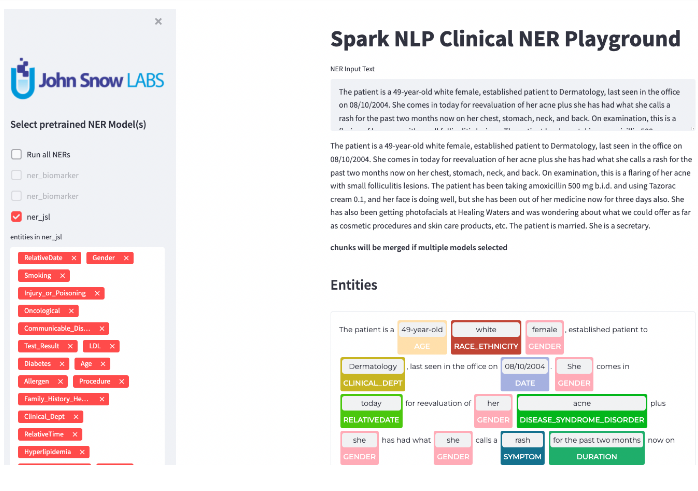

# 2.ContextualParser (Rule Based NER)

Spark NLP's `ContextualParser` is a licensed annotator that allows users to extract entities from a document based on pattern matching. It provides more functionality than its open-source counterpart `EntityRuler` by allowing users to customize specific characteristics for pattern matching. You're able to find entities using regex rules for full and partial matches, a dictionary with normalizing options and context parameters to take into account things such as token distances.

There are 3 components necessary to understand when using the `ContextualParser` annotator:

- **`ContextualParser` annotator's parameters**
Here are all the parameters available to use with the ContextualParserApproach
```
contextualParser = ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("entity") \
    .setCaseSensitive(True) \
    .setJsonPath("context_config.json") \
    .setPrefixAndSuffixMatch(True) \
    .setDictionary("dictionary.tsv", options=.    
                    {"orientation":"vertical"})
```

- **JSON configuration file** ContextualParser extracts entity from a document based on user defined rules. Rule matching is based on a RegexMatcher defined in a JSON file. It is set through the parameter `setJsonPath()`. In this JSON file, regex is defined that you want to match along with the information that will output on metadata field. 

- **Dictionary** You can specify a path to a dictionary in tsv or csv format using the `setDictionary()` parameter. Using a dictionary is a useful when you have a list of exact words that you want the parser to pick up when processing some text.

For more details about the components(parameters, JSON and dictionary), please visit [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.2.Contextual_Parser_Rule_Based_NER.ipynb)

Now, we will create a dictionary and json file to build a sample `ContextualParser` pipeline to detect "gender" and "age" from given text. And merge their results with NER model which we will get only `DATE` and `LOCATION` labels.


In [ ]:
# Here's some sample text
sample_text = """The patient is a 28 years old female with a history of gestational diabetes mellitus was diagnosed in April 2002 in County Baptist Hospital .
                 3 years ago, he reported an episode of HTG-induced pancreatitis . 
                 5 months old boy with repeated concussions."""

In [ ]:
# Create a dictionary to detect gender
gender = '''male,man,male,boy,gentleman,he,him
female,woman,female,girl,lady,old-lady,she,her
neutral,they,neutral,it'''

with open('gender.csv', 'w') as f:
    f.write(gender)

# Check what dictionary looks like
!cat gender.csv

In [ ]:
# Create JSON file for gender
gender = {
  "entity": "Gender",
  "ruleScope": "sentence", 
  "completeMatchRegex": "true",
  "matchScope":"token"
}

import json
with open('gender.json', 'w') as f:
    json.dump(gender, f)

In [ ]:
# Create JSON file for age
age = {
  "entity": "Age",
  "ruleScope": "sentence",
  "matchScope":"token",
  "regex":"\\d{1,3}",
  "prefix":["age of", "age"],
  "suffix": ["-years-old", "years-old", "-year-old",
             "-months-old", "-month-old", "-months-old",
             "-day-old", "-days-old", "month old",
             "days old", "year old", "years old", 
             "years", "year", "months", "old"],
  "contextLength": 25,
  "contextException": ["ago"],
  "exceptionDistance": 12
}

with open('age.json', 'w') as f:
    json.dump(age, f)

In [ ]:
# Build pipeline
document_assembler = nlp.DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = nlp.SentenceDetector() \
    .setInputCols(["document"]) \
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("token")

gender_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("gender_chunk") \
    .setJsonPath("gender.json") \
    .setCaseSensitive(False) \
    .setDictionary('gender.csv', options={"delimiter":","}) \
    .setPrefixAndSuffixMatch(False)      

age_contextual_parser = medical.ContextualParserApproach() \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("age_chunk") \
    .setJsonPath("age.json") \
    .setCaseSensitive(False) \
    .setPrefixAndSuffixMatch(False)    

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

deid_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner")

deid_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner"]) \
    .setOutputCol("deid_ner_chunk")\
    .setWhiteList(["DATE", "LOCATION"])

# merge CP and NER model chunks
chunk_merger = medical.ChunkMergeApproach() \
    .setInputCols(["gender_chunk", "age_chunk", "deid_ner_chunk"]) \
    .setOutputCol("ner_chunk")

parserPipeline = nlp.Pipeline(stages=[
        document_assembler, 
        sentence_detector,
        tokenizer,
        gender_contextual_parser,
        age_contextual_parser,
        word_embeddings,
        deid_ner,
        deid_ner_converter,
        chunk_merger
        ])

# Create a lightpipeline model
parserModel = parserPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))
light_model = nlp.LightPipeline(parserModel)

**In the metadata, `ner_source` is for showing the source of the entities.**

In [ ]:
# Annotate the sample text
annotations = light_model.fullAnnotate(sample_text)[0]

# Check outputs
annotations.get('ner_chunk')

In [ ]:
visualiser = nlp.viz.NerVisualizer()

visualiser.display(annotations, label_col='ner_chunk', document_col='document', save_path="display_result.html")

# 3.Clinical Assertion Status

The deep neural network architecture for assertion status detection in Spark NLP is based on a Bi-LSTM framework, and is a modified version of the architecture proposed by Federico Fancellu, Adam Lopez and Bonnie Webber ([Neural Networks For Negation Scope Detection](https://aclanthology.org/P16-1047.pdf)). Its goal is to classify the assertions made on given medical concepts as being present, absent, or possible in the patient, conditionally present in the patient under certain circumstances,
hypothetically present in the patient at some future point, and
mentioned in the patient report but associated with someoneelse.
In the proposed implementation, input units depend on the
target tokens (a named entity) and the neighboring words that
are explicitly encoded as a sequence using word embeddings.
Similar to paper mentioned above,  it is observed that that 95% of the scope tokens (neighboring words) fall in a window of 9 tokens to the left and 15
to the right of the target tokens in the same dataset. Therefore, the same window size was implemented and it following parameters were used: learning
rate 0.0012, dropout 0.05, batch size 64 and a maximum sentence length 250. The model has been implemented within
Spark NLP as an annotator called AssertionDLModel. After
training 20 epoch and measuring accuracy on the official test
set, this implementation exceeds the latest state-of-the-art
accuracy benchmarks as summarized as following table:

|Assertion Label|Spark NLP|Latest Best|
|-|-|-|
|Absent       |0.944 |0.937|
|Someone-else |0.904|0.869|
|Conditional  |0.441|0.422|
|Hypothetical |0.862|0.890|
|Possible     |0.680|0.630|
|Present      |0.953|0.957|
|micro F1     |0.939|0.934|


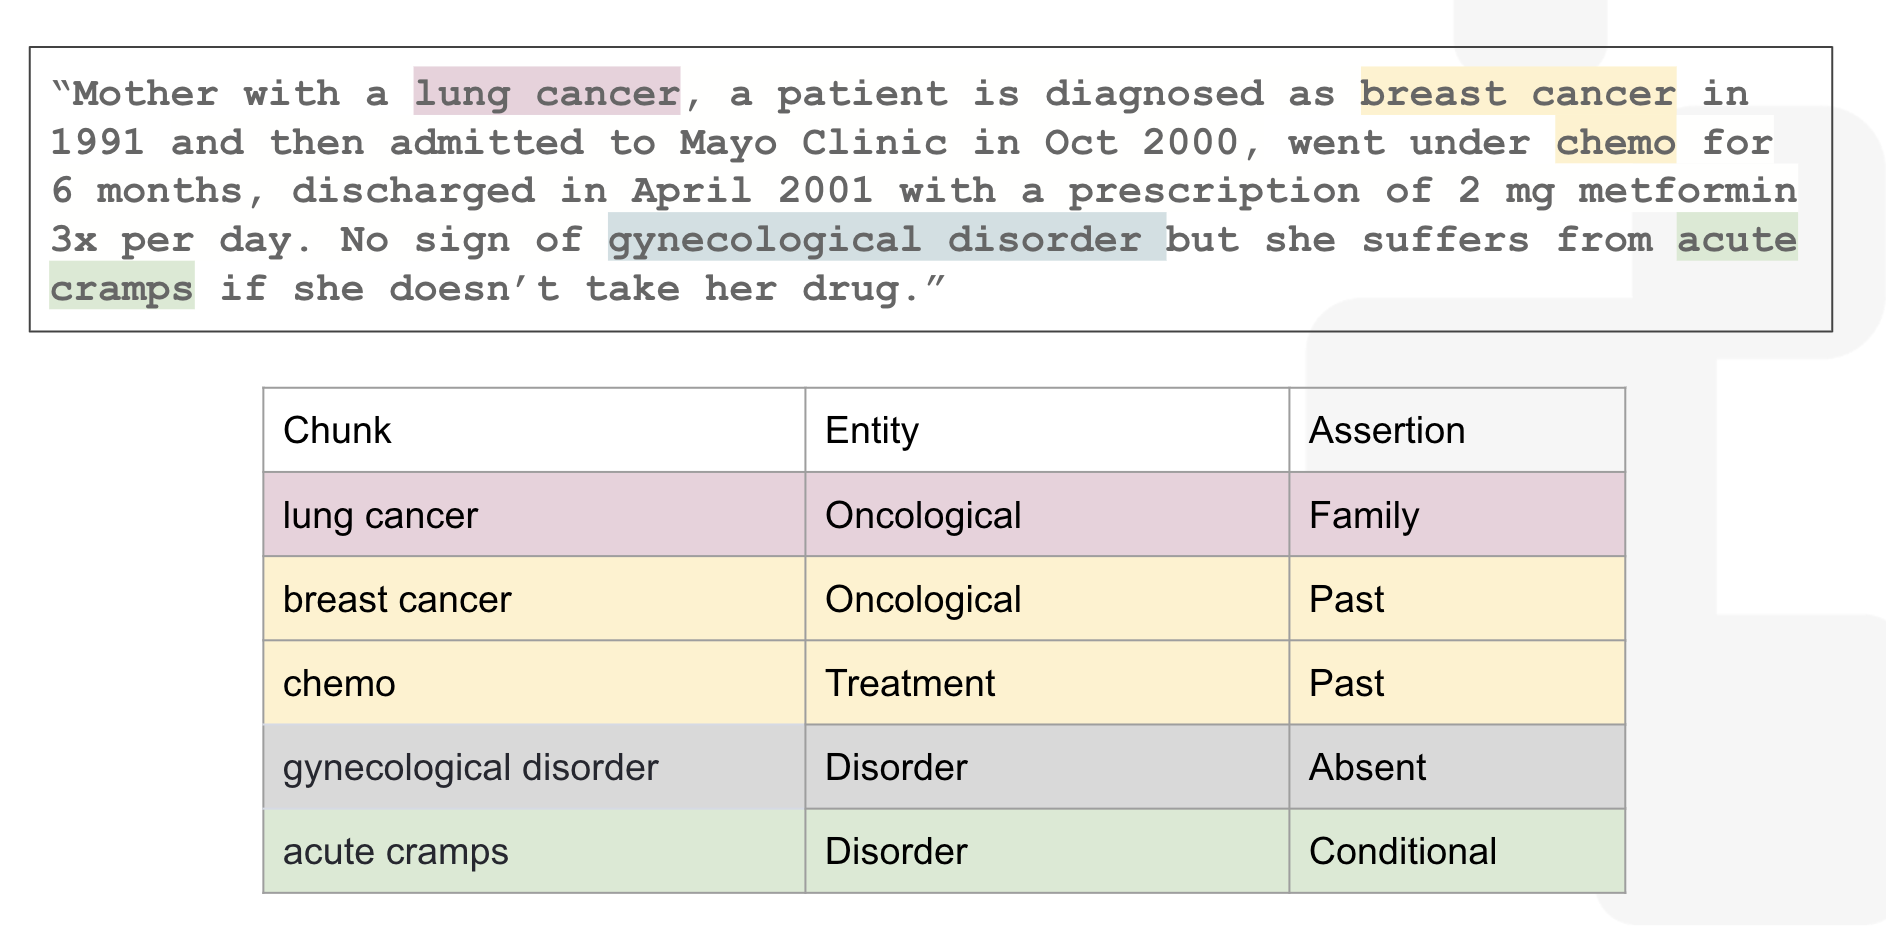

### Pretrained Assertion Status Models

|    | model_name              |Predicted Entities|
|---:|:------------------------|-|
|  1 | [assertion_dl](https://nlp.johnsnowlabs.com/2021/01/26/assertion_dl_en.html)            |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  2 | [assertion_dl_biobert](https://nlp.johnsnowlabs.com/2021/01/26/assertion_dl_biobert_en.html)    |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  3 | [assertion_dl_healthcare](https://nlp.johnsnowlabs.com/2020/09/23/assertion_dl_healthcare_en.html) |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  4 | [assertion_dl_large](https://nlp.johnsnowlabs.com/2020/05/21/assertion_dl_large_en.html)      |Present, Absent, Possible, conditional, hypothetical, associated_with_someone_else|
|  5 | [assertion_dl_radiology](https://nlp.johnsnowlabs.com/2021/03/18/assertion_dl_radiology_en.html)   |Confirmed, Suspected, Negative|
|  6 | [assertion_jsl](https://nlp.johnsnowlabs.com/2021/07/24/assertion_jsl_en.html)           |Present, Absent, Possible, Planned, Someoneelse, Past, Family, Hypotetical|
|  7 | [assertion_jsl_large](https://nlp.johnsnowlabs.com/2021/07/24/assertion_jsl_large_en.html)     |present, absent, possible, planned, someoneelse, past, hypothetical|
|  8 |  [assertion_ml](https://nlp.johnsnowlabs.com/2020/01/30/assertion_ml_en.html) |Hypothetical, Present, Absent, Possible, Conditional, Associated_with_someone_else|
|  9 | [assertion_dl_scope_L10R10](https://nlp.johnsnowlabs.com/2022/03/17/assertion_dl_scope_L10R10_en_3_0.html)| hypothetical, associated_with_someone_else, conditional, possible, absent, present|
| 10 | [assertion_dl_biobert_scope_L10R10](https://nlp.johnsnowlabs.com/2022/03/24/assertion_dl_biobert_scope_L10R10_en_2_4.html)| hypothetical, associated_with_someone_else, conditional, possible, absent, present|
| 11 | [assertion_jsl_augmented](https://nlp.johnsnowlabs.com/2022/09/15/assertion_jsl_augmented_en.html)| Present, Absent, Possible, Planned, Past, Family, Hypotetical, SomeoneElse|






- **Oncology Assertion Models**

|    | model_name              |Predicted Entities|
|---:|:------------------------|-|
| 1 | **assertion_oncology_wip** | Medical_History, Family_History, Possible, Hypothetical_Or_Absent|
| 2 | **assertion_oncology_problem_wip** |Present, Possible, Hypothetical, Absent, Family|
| 3 | **assertion_oncology_treatment_wip** |Present, Planned, Past, Hypothetical, Absent|
| 4 | **assertion_oncology_response_to_treatment_wip** |Present_Or_Past, Hypothetical_Or_Absent|
| 5 | **assertion_oncology_test_binary_wip** |Present_Or_Past, Hypothetical_Or_Absent|
| 6 | **assertion_oncology_smoking_status_wip** |Absent, Past, Present|
| 7 | **assertion_oncology_family_history_wip** |Family_History, Other|
| 8 | **assertion_oncology_demographic_binary_wip** |Patient, Someone_Else|

Let's start to create a Pipeline in order to detect assertion status with `assertion_jsl_augmented` pretrained model. <br/>
This model detects following assertion status; 
`Absent`, `Present`, `Past`, `Family`, `Planned`, `SomeoneElse`, `Hypotetical`, `Possible`.

And we will use **`AssertionFilterer`** for filtering out the NERs by the list of acceptable assertion statuses. This annotator would be quite handy if you want to set a white list for the acceptable assertion statuses like `Present` or `Planned`; and do not want `Absent` conditions get out of your pipeline.

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

clinical_ner = medical.NerModel.pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "clinical_ner"]) \
    .setOutputCol("clinical_ner_chunk")


# Assertion model trained on i2b2 (sampled from MIMIC) dataset
clinical_assertion = medical.AssertionDLModel.pretrained("assertion_jsl_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "clinical_ner_chunk", "embeddings"]) \
    .setOutputCol("assertion")\
    # .setScopeWindow([9,15]) # default [9,15]
    
# filter out the named entities by the list of acceptable assertion statuses. Present here.
assertion_filterer = medical.AssertionFilterer()\
    .setInputCols("sentence","clinical_ner_chunk","assertion")\
    .setOutputCol("assertion_filtered")\
    .setCaseSensitive(False)\
    .setWhiteList(["Present"])

assertionPipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    clinical_ner_converter,
    clinical_assertion,
    assertion_filterer
    ])


assertion_model = assertionPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

Creating example dataframe with sample text and check the results


In [ ]:
#text = """
#Patient with severe fever and sore throat also suffers from pain.
#He shows no stomach pain and he maintained on an epidural and PCA for pain control.
#He also become short of breath with climbing a flight of stairs.
#After CT, lung tumor located at the right lower lobe. Father with Alzheimer.
#"""

text = 'Patient has a headache for the last 2 weeks, needs to get a head CT, and appears anxious when she walks fast. Alopecia noted. She denies pain.'


data = spark.createDataFrame([[text]]).toDF("text")

# fit/transform and show
results = assertion_model.transform(data)
results.show()

In [ ]:
results.select(F.explode(F.arrays_zip("clinical_ner_chunk.result", "clinical_ner_chunk.metadata", "assertion.result")).alias("cols"))\
       .select(F.expr("cols['0']").alias("ner_chunk"),
               F.expr("cols['1']['entity']").alias("entities"),
               F.expr("cols['2']").alias("assertion")).show(truncate=False)

#### Assertion Filterer Results

In [ ]:
assertion_filterer.getWhiteList()

Here are our filtered (only present assertions) chunks;

In [ ]:
results.select("assertion_filtered.result").show(truncate=False)

As you see above, there is no **"a head C"**, **"anxious"** and **"pain"** in filtered results

### Assertion Visualizer

Also, we can visualize the assertion results by using `AssertionVisualizer` of Sparknlp-Display library.

Now, we will create a LightPipeline with our existing model and visualize the results. 

In [ ]:
from sparknlp_display import AssertionVisualizer

light_model = nlp.LightPipeline(assertion_model)
light_result = light_model.fullAnnotate(text)[0]

vis = nlp.viz.AssertionVisualizer()
vis.display(light_result, 'clinical_ner_chunk', 'assertion')

### Train a Custom Assertion Model

In this section, we will train a custom assertion model. <br/>

Firstly, download a sample dataset for training.

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/i2b2_assertion_sample_short.csv

In [ ]:
import pandas as pd

In [ ]:
assertion_df = spark.read.option("header", True).option("inferSchema", "True").csv("i2b2_assertion_sample_short.csv")
assertion_df.show(5, truncate=100)

Splitting data into train and test set

In [ ]:
(training_data, test_data) = assertion_df.randomSplit([0.8, 0.2], seed = 100)
print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

In [ ]:
training_data.groupBy('label').count().orderBy('count', ascending=False).show(truncate=False)

We will transform our test data with a pipeline consisting of same steps with the pipeline which contains `AssertionDLApproach`.
By doing this, we enable that the test data will have the same columns with the training data in `AssertionDLApproach`. <br/>
The goal of this implementation is enabling the usage of `setTestDataset()` parameter in `AssertionDLApproach`. 

In [ ]:
document = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

chunk = nlp.Doc2Chunk()\
    .setInputCols("document")\
    .setOutputCol("chunk")\
    .setChunkCol("target")\
    .setStartCol("start")\
    .setStartColByTokenIndex(True)\
    .setFailOnMissing(False)\
    .setLowerCase(True)

token = nlp.Tokenizer()\
    .setInputCols(['document'])\
    .setOutputCol('token')

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

clinical_assertion_pipeline = nlp.Pipeline(
    stages = [
    document,
    chunk,
    token,
    embeddings])

assertion_test_data = clinical_assertion_pipeline.fit(test_data).transform(test_data)

In [ ]:
assertion_test_data.columns

We will save the test data in parquet format to use in `AssertionDLApproach()`. 

In [ ]:
assertion_test_data.write.parquet('i2b2_assertion_sample_test_data.parquet')

#### Assertion Graph

Also, we could use custom graph like following;

In [ ]:
!pip install -q tensorflow==2.7.0
!pip install -q tensorflow-addons

We will use TFGraphBuilder annotator which can be used to create graphs in the model training pipeline. 

TFGraphBuilder inspects the data and creates the proper graph if a suitable version of TensorFlow (<= 2.7 ) is available. The graph is stored in the defined folder and loaded by the approach.

In [ ]:
from sparknlp_jsl.annotator import TFGraphBuilder

graph_folder= "./tf_graphs"

assertion_graph_builder = medical.TFGraphBuilder()\
    .setModelName("assertion_dl")\
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setLabelColumn("label")\
    .setGraphFolder(graph_folder)\
    .setGraphFile("assertion_graph.pb")\
    .setMaxSequenceLength(250)\
    .setHiddenUnitsNumber(25)

In [ ]:
'''
# ready to use tf_graph

!mkdir training_logs
!mkdir assertion_tf_graph

!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/tf_graphs/blstm_34_32_30_200_2.pb -P /content/assertion_tf_graph
'''

In [ ]:
'''
# create custom graph

from sparknlp_jsl.training import tf_graph
tf_graph.print_model_params("assertion_dl")

feat_size = 200
n_classes = 6

tf_graph.build("assertion_dl",
              build_params={"n_classes": n_classes},
              model_location= "./tf_graphs", 
              model_filename="blstm_34_32_30_{}_{}.pb".format(feat_size, n_classes))
'''

**Setting the Scope Window (Target Area) Dynamically in Assertion Status Detection Models**


This parameter allows you to train the Assertion Status Models to focus on specific context windows when resolving the status of a NER chunk. The window is in format `[X,Y]` being `X` the number of tokens to consider on the left of the chunk, and `Y` the max number of tokens to consider on the right. Let’s take a look at what different windows mean:


*   By default, the window is `[-1,-1]` which means that the Assertion Status will look at all of the tokens in the sentence/document (up to a maximum of tokens set in `setMaxSentLen()` ).
*   `[0,0]` means “don’t pay attention to any token except the ner_chunk”, what basically is not considering any context for the Assertion resolution.
*   `[9,15]` is what empirically seems to be the best baseline, meaning that we look up to 9 tokens on the left and 15 on the right of the ner chunk to understand the context and resolve the status.


Check this [Scope Window Tuning Assertion Status Detection notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/2.1.Scope_window_tuning_assertion_status_detection.ipynb)  that illustrates the effect of the different windows and how to properly fine-tune your AssertionDLModels to get the best of them.

In our case, the best Scope Window is around [10,10]

Now, let's define the `AssertionDLApproach()` to train a model 

In [ ]:
scope_window = [10,10]

assertionStatus = medical.AssertionDLApproach()\
    .setLabelCol("label")\
    .setInputCols("document", "chunk", "embeddings")\
    .setOutputCol("assertion")\
    .setBatchSize(128)\
    .setDropout(0.1)\
    .setLearningRate(0.001)\
    .setEpochs(15)\
    .setValidationSplit(0.2)\
    .setStartCol("start")\
    .setEndCol("end")\
    .setMaxSentLen(250)\
    .setIncludeConfidence(True)\
    .setEnableOutputLogs(True)\
    .setOutputLogsPath('training_logs/')\
    .setGraphFolder(graph_folder)\
    .setGraphFile(f"{graph_folder}/assertion_graph.pb")\
    .setTestDataset(path="/content/i2b2_assertion_sample_test_data.parquet")\
    .setScopeWindow(scope_window)

'''
If .setTestDataset parameter is employed, raw test data cannot be fitted. .setTestDataset only works for dataframes which are correctly transformed
by a pipeline consisting of document, chunk, embeddings stages.
'''

In [ ]:
'''
assertionStatus = AssertionLogRegApproach()\
    .setLabelCol("label")\
    .setInputCols("document", "chunk", "embeddings")\
    .setOutputCol("assertion")\
    .setMaxIter(100) # default: 26
'''

In [ ]:
%%time

#training pipeline
clinical_assertion_pipeline = nlp.Pipeline(
    stages = [
    document,
    chunk,
    token,
    embeddings,
    assertion_graph_builder,
    assertionStatus])

assertion_model = clinical_assertion_pipeline.fit(training_data)

Checking the results saved in the log file

In [ ]:
import os

log_files = os.listdir("/content/training_logs")
log_files

In [ ]:
with open("/content/training_logs/"+log_files[0]) as log_file:
    print(log_file.read())

Now, let's get prediction from the test data

In [ ]:
preds = assertion_model.transform(test_data).select('label','assertion.result')

preds.show()

In [ ]:
preds_df = preds.toPandas()
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])
preds_df

#### Evaluating the Model

We are going to use sklearn to evalute the results on test dataset

In [ ]:
from sklearn.metrics import classification_report

print (classification_report(preds_df['label'], preds_df['result']))

And we can save the trained model 

In [ ]:
assertion_model.stages[-1].write().overwrite().save('assertion_model')

# 4.Clinical Deidentification

Protected Health Information: 
- individual’s past, present, or future physical or mental health or condition
- provision of health care to the individual
- past, present, or future payment for the health care 

Protected health information includes many common identifiers (e.g., name, address, birth date, Social Security Number) when they can be associated with the health information.

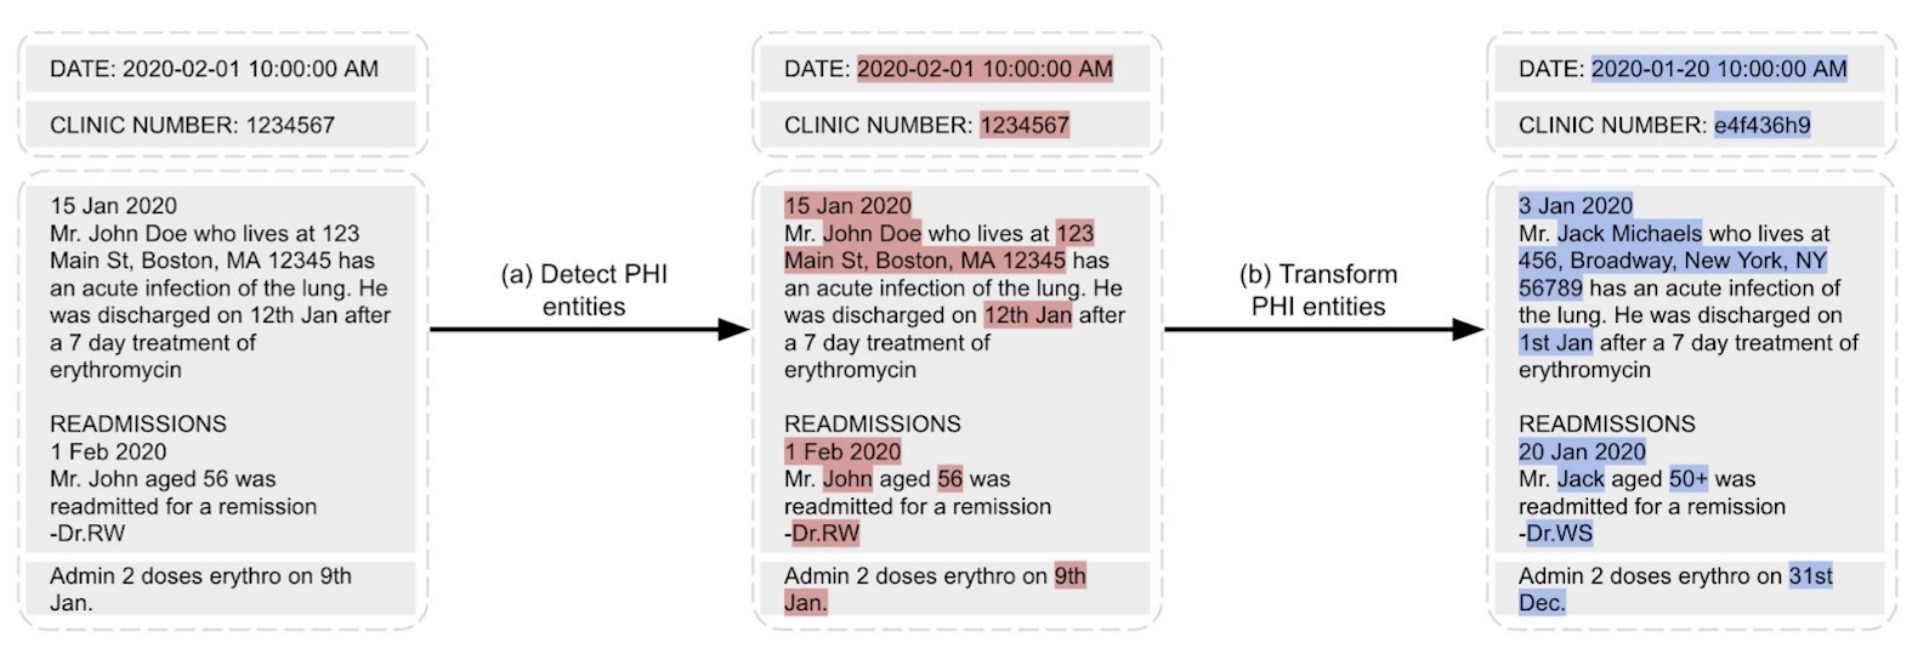

<center><b>Deidentification NER Models for English</b></center>

|index|model|lang|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|-----:|:-----|----|
| 1| [deidentify_dl](https://nlp.johnsnowlabs.com/2021/01/28/deidentify_dl_en.html)  |en| 7| [ner_deid_enriched_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_enriched_biobert_en.html)  |en| 13| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2021/09/03/ner_deid_subentity_augmented_en.html)  |en|
| 2| [deidentify_large](https://nlp.johnsnowlabs.com/2020/08/04/deidentify_large_en.html)  |en| 8| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2021/06/30/ner_deid_generic_augmented_en.html)  |en| 14| [ner_deid_subentity_augmented_i2b2](https://nlp.johnsnowlabs.com/2021/11/29/ner_deid_subentity_augmented_i2b2_en.html)  |en|
| 3| [deidentify_rb](https://nlp.johnsnowlabs.com/2019/06/04/deidentify_rb_en.html)  |en| 9| [ner_deid_generic_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_generic_glove_en.html)  |en| 15| [ner_deid_subentity_glove](https://nlp.johnsnowlabs.com/2021/06/06/ner_deid_subentity_glove_en.html)  |en|
| 4| [ner_deid_augmented](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_augmented_en.html)  |en| 10| [ner_deid_large](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_large_en.html)  |en| 16| [ner_deid_synthetic](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_synthetic_en.html)  |en|
| 5| [ner_deid_biobert](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_biobert_en.html)  |en| 11| [ner_deid_sd](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_en.html)  |en| 17| [ner_deidentify_dl](https://nlp.johnsnowlabs.com/2021/03/31/ner_deidentify_dl_en.html)  |en|
| 6| [ner_deid_enriched](https://nlp.johnsnowlabs.com/2021/03/31/ner_deid_enriched_en.html)  |en| 12| [ner_deid_sd_large](https://nlp.johnsnowlabs.com/2021/04/01/ner_deid_sd_large_en.html)  |en| 18| []()|


<center><b>Deidentification NER Models for Other Languages</b></center>

|index|model|lang|index|model|lang|
|-----:|:-----|----|-----:|:-----|----|
| 1| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/01/06/ner_deid_generic_de.html)  |de| 11| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/02/11/ner_deid_generic_fr.html)  |fr|
| 2| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/01/06/ner_deid_subentity_de.html)  |de| 12| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/02/14/ner_deid_subentity_fr.html)  |fr|
| 3| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/01/18/ner_deid_generic_es.html)  |es| 13| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_generic_it_3_0.html)  |it|
| 4| [ner_deid_generic_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_augmented_es.html)  |es| 14| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/03/25/ner_deid_subentity_it_2_4.html)  |it|
| 5| [ner_deid_generic_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_generic_roberta_es.html)  |es| 15| [ner_deid_generic](https://nlp.johnsnowlabs.com/2022/04/13/ner_deid_generic_pt_3_0.html)  |pt|
| 6| [ner_deid_generic_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_generic_roberta_augmented_es.html)  |es| 16| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/04/13/ner_deid_subentity_pt_3_0.html)  |pt|
| 7| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/01/18/ner_deid_subentity_es.html)  |es| 17| [ner_deid_subentity](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_ro_3_0.html)  |ro|
| 8| [ner_deid_subentity_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_augmented_es.html)  |es| 18| [ner_deid_subentity_bert](https://nlp.johnsnowlabs.com/2022/06/27/ner_deid_subentity_bert_ro_3_0.html)  |ro|
| 9| [ner_deid_subentity_roberta](https://nlp.johnsnowlabs.com/2022/01/17/ner_deid_subentity_roberta_es.html)  |es| 19| [ner_deid_generic](https://nlp.johnsnowlabs.com/models)  |ro|
| 10| [ner_deid_subentity_roberta_augmented](https://nlp.johnsnowlabs.com/2022/02/16/ner_deid_subentity_roberta_augmented_es.html)  |es| 20| [ner_deid_generic_bert](https://nlp.johnsnowlabs.com/models)  |ro|


You can find German, Spanish, French, Portuguese, Romanian and Italian deidentification models and pretrained pipeline examples in [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.1.Clinical_Multi_Language_Deidentification.ipynb):



**ONE-LINER DEIDENTIFICATION MODULE** <br/>
Additionally, Spark NLP for Healthcare provides functionality to apply Deidentification using **one-liner module** called `Deid`. <br/>

The `Deid` module is a tool for deidentifying Protected Health Information (PHI) from data in a file path. It can be used with or without ant Spark NLP NER pipelines. It can apply deidentification and obfuscation on different columns at the same time.
It returns the deidentification & obfuscation results as a spark dataframe as well as a `csv` or `json file` saved locally.
The module also includes functionality for applying Structured Deidentification task to data from a file path. <br/>

Please visit [Clinical Deidentification Utility Module Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/4.5.Clinical_Deidentification_Utility_Module.ipynb) for datailed usage and examples.

Firstly, we will load NER pipeline to identify protected entities. Pretrained NER models extracts:

- Name
- Profession
- Age
- Date
- Contact(Telephone numbers, FAX numbers, Email addresses)
- Location (Address, City, Postal code, Hospital Name, Employment information)
- Id (Social Security numbers, Medical record numbers, Internet protocol addresses)

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
deid_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner")

deid_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner"]) \
    .setOutputCol("deid_ner_chunk")


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter])

deid_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson Ora , MR #7194334 Date : 01/13/93 . PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital , 0295 Keats Street , Phone 55-555-5555 .
'''

In [ ]:
result = deid_model.transform(spark.createDataFrame([[text]]).toDF("text"))

Let's check extracted sensitive entities by NER piepline

In [ ]:
result.select(F.explode(F.arrays_zip('deid_ner_chunk.result', 'deid_ner_chunk.metadata')).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

Sometimes we need to leave some entities in the text, for example, if we want to analyze the frequency of the disease by the hospital. In this case, we may use the parameter **`setBlackList()`** to modify `ner_chunk` output. This parameter having using a list of entity types to deidentify as an input. So, if we want to exclude the location, we need to specify this tag in the list:

In [ ]:
filtered_ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "deid_ner"])\
    .setOutputCol("deid_ner_chunk") \
    .setBlackList(['LOCATION'])

deidPipeline = nlp.Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    deid_ner,
    filtered_ner_converter])


model_with_black_list = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

result_with_black_list = model_with_black_list.transform(spark.createDataFrame([[text]]).toDF("text"))

In [ ]:
print("All Labels :")
result.select(F.explode(F.arrays_zip('deid_ner_chunk.result', 'deid_ner_chunk.metadata')).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

print("BlackListed Labels: ")
result_with_black_list.select(F.explode(F.arrays_zip('deid_ner_chunk.result', 'deid_ner_chunk.metadata')).alias("cols")) \
                      .select(F.expr("cols['0']").alias("chunk"),
                              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

### Masking

Now, we will replace this enitites with tags, this process is called **"masking"**. We will specifiy `setMode()` parameter as `setMode("mask")` in `DeIdentification()` in order to apply masking

In [ ]:
deid_ner_converter = medical.NerConverterInternal()\
      .setInputCols(["sentence", "token", "deid_ner"])\
      .setOutputCol("deid_ner_chunk") 

deidentification = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "deid_ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setReturnEntityMappings(True) #  return a new column to save the mappings between the mask/obfuscated entities and original entities.
      #.setMappingsColumn("MappingCol") # change the name of the column, 'aux' is default

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      deidentification])

deid_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
result = deid_model.transform(spark.createDataFrame([[text]]).toDF("text"))
result.show()

Let's check the results

In [ ]:
pd.set_option('display.max_colwidth', None)

result.select(F.explode(F.arrays_zip('sentence.result', 'deidentified.result')).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).toPandas()

We have three modes to mask the entities in the Deidentification annotator. You can select the modes using the `.setMaskingPolicy()` parameter. The methods are the followings:

**“entity_labels”**: Mask with the entity type of that chunk. (default) <br/>
**“same_length_chars”**: Mask the deid entities with same length of asterix ( * ) with brackets ( [ , ] ) on both end. <br/>
**“fixed_length_chars”**: Mask the deid entities with a fixed length of asterix ( * ). The length is setting up using the `setFixedMaskLength()` method. <br/>
Let's try each of these and compare the results. 

In [ ]:
#deid model with "entity_labels"
deid_entity_labels= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"])\
    .setOutputCol("deid_entity_label")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("entity_labels")

#deid model with "same_length_chars"
deid_same_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"])\
    .setOutputCol("deid_same_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("same_length_chars")

#deid model with "fixed_length_chars"
deid_fixed_length= medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"])\
    .setOutputCol("deid_fixed_length")\
    .setMode("mask")\
    .setReturnEntityMappings(True)\
    .setMaskingPolicy("fixed_length_chars")\
    .setFixedMaskLength(4)


deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      deid_entity_labels,
      deid_same_length,
      deid_fixed_length])

deid_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
policy_result = deid_model.transform(spark.createDataFrame([[text]]).toDF("text"))
policy_result.show()

In [ ]:
policy_result.select(F.explode(F.arrays_zip('sentence.result', 
                                            'deid_entity_label.result', 
                                            'deid_same_length.result', 
                                            'deid_fixed_length.result')).alias("cols")) \
             .select(F.expr("cols['0']").alias("sentence"),
                     F.expr("cols['1']").alias("deid_entity_label"),
                     F.expr("cols['2']").alias("deid_same_length"),
                     F.expr("cols['3']").alias("deid_fixed_length")).toPandas()

### Reidentification

We can use `ReIdentification` annotator to go back to the original sentence. Let's see how it works

In [ ]:
reIdentification = medical.ReIdentification()\
    .setInputCols(["aux","deidentified"])\
    .setOutputCol("original")

In [ ]:
reid_result = reIdentification.transform(result)
reid_result.show()

In [ ]:
print(text)

reid_result.select('original.result').show(truncate=False)

### Enriching with Regex and Override NER




We can enrich our existing Deidentification model with both custom and embedded regex.

Firstly, let's build our deid pipeline again, but this time by filtering "`CONTACT`" entities from ner model. 

Then, we will set `setReturnEntityMappings(True)`. In this way, we are going to see that we still be able to deidentify "`CONTACT`" as `PHONE` even though ner model doesn't detect "`CONTACT`" entity since the regex embedded in deid model will be taken account.

In [ ]:
filtered_ner_converter = medical.NerConverterInternal()\
      .setInputCols(["sentence", "token", "deid_ner"])\
      .setOutputCol("deid_ner_chunk")\
      .setBlackList(["CONTACT"])

deidentification = medical.DeIdentification() \
      .setInputCols(["sentence", "token", "deid_ner_chunk"]) \
      .setOutputCol("deidentified") \
      .setMode("mask")\
      .setRegexOverride(True)

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      filtered_ner_converter,
      deidentification])

model_default_rgx = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
result = model_default_rgx.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip('sentence.result', 'deidentified.result')).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

As you see above, we were able to deidentify `CONTACT` entity as `PHONE` which comes from the embedded regex even though ner model doesn't detect them.

Now, let's identify a custom regex and see how it works.

We will write a regex to deidentify "number" and save it as .txt file. Then, we will specify this file in `Deidentification()` through `setRegexPatternsDictionary()` parameter. 

In [ ]:
rgx = '''NUMBER ([0-9]{2})
NUMBER (\d{7})''' 

with open("./custom_regex.txt", "w") as f:
  f.write(rgx)

f = open("./custom_regex.txt", "r")

print(f.read())

In [ ]:
deid_ner_converter = medical.NerConverterInternal()\
      .setInputCols(["sentence", "token", "deid_ner"])\
      .setOutputCol("deid_ner_chunk")

deidentification_rgx = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"])\
    .setOutputCol("deidentified")\
    .setMode("mask") \
    .setRegexPatternsDictionary("./custom_regex.txt")\
    .setRegexOverride(True)# Prioritizing regex rules

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      deidentification_rgx])

model_rgx = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
text ='''Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR . # 7194334 Date : 01/13/93 PCP : Oliveira , 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street.'''
result = model_rgx.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip('sentence.result', 'deidentified.result')).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

As you see above, we deidentified the "number" through our custom regex even though ner model doesn't detect the "number" entity. 

### Obfuscation 

In the obfuscation mode **DeIdentificationModel** will replace sensetive entities with random values of the same type. 
We can specify `.setMode()` parameter as `.setMode("obfuscate")` to use this feature. 

Let's create a piepline and see how it works


In [ ]:
deid_ner_converter = medical.NerConverterInternal()\
      .setInputCols(["sentence", "token", "deid_ner"])\
      .setOutputCol("deid_ner_chunk")

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      obfuscation])

obfuscation_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR #7194334 Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street
'''

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip('sentence.result', 'deidentified.result')).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"), F.expr("cols['1']").alias("deidentified")).toPandas()

As you see, we succesfully obfuscated the entities. 


In addition, we can define a reference file for obfuscation. In this way, deid model uses the fake entities that we defined in this file.

If we want to use reference file, we should give the path of txt file that includes our custom entities to the `setObfuscateRefFile()` parameter. Then, we should set `setObfuscateRefSource("file")` parameter.

However, we can set `setObfuscateRefSource` parameter as **faker** or **both** as well. 

The faker module allows  the user to use a set of fake entities that are in the memory of the spark-nlp-internal. You can set up this module for using the following property `setObfuscateRefSource('faker')`.

If we select the `setObfuscateRefSource('both')` then we choose randomly the entities using the faker and the fake entities from the obfuscateRefFile.





Now, let's define a reference file and use it in our deidentification model. 

In [ ]:
obs_lines = """Marvin MARSHALL#NAME
Hubert GROGAN#NAME
ALTHEA COLBURN#NAME
Kalil AMIN#NAME
Inci FOUNTAIN#NAME
Ekaterina Rosa#NAME
Rudiger Chao#NAME
COLLETTE KOHLER#NAME
Mufi HIGGS#NAME"""


with open ('obfuscation.txt', 'w') as f:
  f.write(obs_lines)

In [ ]:
deid_ner_converter = medical.NerConverterInternal()\
      .setInputCols(["sentence", "token", "deid_ner"])\
      .setOutputCol("deid_ner_chunk")

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "deid_ner_chunk"]) \
    .setOutputCol("deidentified") \
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefFile('obfuscation.txt')\
    .setObfuscateRefSource("file") #both or faker

deidPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      deid_ner_converter,
      obfuscation])


obfuscation_model = deidPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

In [ ]:
text ='''
Record date : 2093-01-13 , David Hale , M.D . , Name : Hendrickson , Ora MR # 7194334 Date : 01/13/93 . Patient : Oliveira, 25 years-old , Record date : 2079-11-09 . Cocke County Baptist Hospital . 0295 Keats Street
'''

result = obfuscation_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result.select(F.explode(F.arrays_zip('sentence.result', 'deidentified.result')).alias("cols")) \
      .select(F.expr("cols['0']").alias("sentence"),
              F.expr("cols['1']").alias("deidentified")).toPandas()

**`.setObfuscateDate(True)` parameter obfuscated the `DATE` entities and the `NAME`s were replaced with the custom list.**

## Shifting Days

In the example above, we replaced date entities with another date randomly. Instead of that, we can shift the date according to any column.

In [ ]:
#sample data for day shifting
data = pd.DataFrame(
    {'patientID' : ['A001', 'A001', 'A002', 'A002'],
     'text' : ['Chris Brown was discharged on 10/02/2022', 
               'Mark White was discharged on 02/28/2020', 
               'John was discharged on 03/15/2022',
               'John Moore was discharged on 12/31/2022'
              ]
    }
)

my_input_df = spark.createDataFrame(data)

my_input_df.show(truncate = False)

### Shifting days according to the ID column

We use the `DocumentHashCoder()` annotator to determine shifting days. This annotator gets the hash of the specified column and creates a new document column containing day shift information. And then, the `DeIdentification` annotator deidentifies this new doc. We should set the seed parameter to hash consistently.  

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setPatientIdColumn("patientID")\
    .setRangeDays(100)\
    .setNewDateShift("shift_days")\
    .setSeed(100)

tokenizer = nlp.Tokenizer()\
    .setInputCols(["document2"])\
    .setOutputCol("token")

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document2", "token"])\
    .setOutputCol("word_embeddings")

clinical_ner = medical.NerModel\
    .pretrained("ner_deid_subentity_augmented", "en", "clinical/models")\
    .setInputCols(["document2","token", "word_embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["document2", "token", "ner"])\
    .setOutputCol("ner_chunk")

de_identification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')
    

pipeline = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification
    
])

empty_data = spark.createDataFrame([["", ""]]).toDF("text", "patientID")

pipeline_model = pipeline.fit(empty_data)

In [ ]:
output = pipeline_model.transform(my_input_df)

output.select('patientID','text', "shift_days", 'deid_text.result').show(truncate = False)

### Shifting days according to specified values

Instead of shifting days according to ID column, we can specify shifting values with another column.

```python
documentHasher = DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setDateShiftColumn("dateshift")\
```


In [ ]:
data = pd.DataFrame(
    {'patientID' : ['A001', 'A002', 'A003', 'A004'],
     'text' : ['Chris Brown was discharged on 10/02/2022', 
               'Mark White was discharged on 03/01/2020', 
               'John was discharged on 03/15/2022',
               'John Moore was discharged on 12/31/2022'
              ],
     'dateshift' : ['10', '-2', '30', '-8']
    }
)

my_input_df = spark.createDataFrame(data)

my_input_df.show(truncate=False)

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

documentHasher = medical.DocumentHashCoder()\
    .setInputCols("document")\
    .setOutputCol("document2")\
    .setDateShiftColumn("dateshift")\

tokenizer = nlp.Tokenizer()\
    .setInputCols(["document2"])\
    .setOutputCol("token")

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document2", "token"])\
    .setOutputCol("word_embeddings")

clinical_ner = medical.NerModel\
    .pretrained("ner_deid_subentity_augmented", "en", "clinical/models")\
    .setInputCols(["document2","token", "word_embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols(["document2", "token", "ner"])\
    .setOutputCol("ner_chunk")

de_identification = medical.DeIdentification() \
    .setInputCols(["ner_chunk", "token", "document2"]) \
    .setOutputCol("deid_text") \
    .setMode("obfuscate") \
    .setObfuscateDate(True) \
    .setDateTag("DATE") \
    .setLanguage("en") \
    .setObfuscateRefSource('faker') \
    .setUseShifDays(True)\
    .setRegion('us')

pipeline_col = nlp.Pipeline().setStages([
    documentAssembler,
    documentHasher,
    tokenizer,
    embeddings,
    clinical_ner,
    ner_converter,
    de_identification
    
])

empty_data = spark.createDataFrame([["", "", ""]]).toDF("patientID","text", "dateshift")

pipeline_col_model = pipeline_col.fit(empty_data)

In [ ]:
output = pipeline_col_model.transform(my_input_df)

output.select('text', 'dateshift', 'deid_text.result').show(truncate = False)

Here, dates were shifted according to `dateshift` column

## Age Groups Obfuscation

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on n2c2 (de-identification and Heart Disease Risk Factors Challenge) datasets)
deid_ner = medical.NerModel.pretrained("ner_deid_generic_augmented", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("deid_ner")

deid_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "deid_ner"]) \
    .setOutputCol("deid_ner_chunk")


In [ ]:
ner_converter = medical.NerConverterInternal()\
    .setInputCols(["sentence", "token", "deid_ner"])\
    .setOutputCol("age_chunk")\
    .setWhiteList(["AGE"])

obfuscation = medical.DeIdentification()\
    .setInputCols(["sentence", "token", "age_chunk"])\
    .setOutputCol("obfuscation")\
    .setMode("obfuscate")\
    .setObfuscateDate(True)\
    .setObfuscateRefSource("faker")\
    .setAgeRanges([1, 4, 12, 20, 40, 60, 80])

nlpPipeline = nlp.Pipeline(stages=[
      documentAssembler, 
      sentenceDetector,
      tokenizer,
      word_embeddings,
      deid_ner,
      ner_converter,
      obfuscation
      ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model_agerange = nlpPipeline.fit(empty_data)

In [ ]:
# Infant = 0-1 year.
# Toddler = 2-4 yrs.
# Child = 5-12 yrs.
# Teen = 13-19 yrs.
# Adult = 20-39 yrs.
# Middle Age Adult = 40-59 yrs.
# Senior Adult = 60+

dates = [
'1 year old baby',
'4 year old kids',
'A 15 year old female with',
'Record date: 2093-01-13, Age: 25',
'Patient is 45 years-old',
'He is 65 years-old male'
]
from pyspark.sql.types import StringType
df_dates = spark.createDataFrame(dates,StringType()).toDF('text')


result = model_agerange.transform(df_dates)

result_df = result.select("text",F.explode(F.arrays_zip(result.age_chunk.result, 
                                                        result.obfuscation.result)).alias("cols")) \
                  .select("text",F.expr("cols['0']").alias("age_chunk"),
                                 F.expr("cols['1']").alias("obfuscation"))
                  
result_df.show(truncate=False)

## Structured Deidentification

We can use deidentification not only text but also structured data as well.

Let's see how it works

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/hipaa-table-001.txt

df = spark.read.format("csv") \
    .option("sep", "\t") \
    .option("inferSchema", "true") \
    .option("header", "true") \
    .load("hipaa-table-001.txt")

df = df.withColumnRenamed("PATIENT","NAME")
df.show(truncate=False)

In [ ]:
from sparknlp_jsl.structured_deidentification import StructuredDeidentification

In [ ]:
obfuscator = medical.StructuredDeidentification(spark,{"NAME":"PATIENT","AGE":"AGE"}, obfuscateRefSource = "faker")
obfuscator_df = obfuscator.obfuscateColumns(df)
obfuscator_df.show(truncate=False)

We can define reference file for obfuscation as well like we did before. All we need to do is defining `obfuscateRefFile` and `onfuscateRefSource` parameters. 

In [ ]:
obfuscator_unique_ref_test = '''Will Perry#PATIENT
John Smith#PATIENT
Marvin MARSHALL#PATIENT
Hubert GROGAN#PATIENT
ALTHEA COLBURN#PATIENT
Kalil AMIN#PATIENT
Inci FOUNTAIN#PATIENT
Jackson WILLE#PATIENT
Jack SANTOS#PATIENT
Mahmood ALBURN#PATIENT
Marnie MELINGTON#PATIENT
Aysha GHAZI#PATIENT
Maryland CODER#PATIENT
Darene GEORGIOUS#PATIENT
Shelly WELLBECK#PATIENT
Min Kun JAE#PATIENT
Thomson THOMAS#PATIENT
Christian SUDDINBURG#PATIENT
Aberdeen#CITY
Louisburg St#STREET
France#LOC
Nick Riviera#DOCTOR
5552312#PHONE
St James Hospital#HOSPITAL
Calle del Libertador#ADDRESS
111#ID
Will#DOCTOR
20#AGE
30#AGE
40#AGE
50#AGE
60#AGE
'''

with open('obfuscator_unique_ref_test.txt', 'w') as f:
  f.write(obfuscator_unique_ref_test)

In [ ]:
# obfuscateRefSource = "file"

obfuscator = medical.StructuredDeidentification(spark,{"NAME":"PATIENT","AGE":"AGE"}, 
                                        obfuscateRefFile = "/content/obfuscator_unique_ref_test.txt",
                                        obfuscateRefSource = "file",
                                        columnsSeed={"NAME": 23, "AGE": 23})
obfuscator_df = obfuscator.obfuscateColumns(df)
obfuscator_df.select("NAME","AGE").show(truncate=False)

We can **shift n days** in the structured deidentification through "days" parameter when the column is a Date.

In [ ]:
df = spark.createDataFrame([
            ["Juan García", "13/02/1977", "711 Nulla St.", "140", "673 431234"],
            ["Will Smith", "23/02/1977", "1 Green Avenue.", "140", "+23 (673) 431234"],
            ["Pedro Ximénez", "11/04/1900", "Calle del Libertador, 7", "100", "912 345623"]
        ]).toDF("NAME", "DOB", "ADDRESS", "SBP", "TEL")
df.show(truncate=False)

In [ ]:
obfuscator = medical.StructuredDeidentification(spark=spark, 
                                        columns={"NAME": "ID", "DOB": "DATE"},
                                        columnsSeed={"NAME": 23, "DOB": 23},
                                        obfuscateRefSource="faker",
                                        days=5
                                         )

In [ ]:
result = obfuscator.obfuscateColumns(df)
result.show(truncate=False)

## Pretrained Deidentification Pipeline

`clinical_deidentification` pipeline can be used to deidentify PHI information from medical texts. The PHI information will be masked and obfuscated in the resulting text. The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities. There is also a slim version of deidentificaiton pipeline, `clinical_deidentification_slim`

Let's see how it works

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

deid_pipeline = nlp.PretrainedPipeline("clinical_deidentification", "en", "clinical/models")

In [ ]:
deid_pipeline.model.stages

In [ ]:
text= """Name : Hendrickson, Ora, Record date: 2093-01-13, Age: 25, # 719435. Dr. John Green, ID: 1231511863, IP 203.120.223.13. He is a 60-year-old male was admitted to the Day Hospital for cystectomy on 01/13/93. Patient's VIN : 1HGBH41JXMN109286, SSN #333-44-6666, Driver's license no:A334455B. Phone (302) 786-5227, 0295 Keats Street, San Francisco."""

In [ ]:
deid_res= deid_pipeline.annotate(text)

In [ ]:
deid_res.keys()

In [ ]:
pd.set_option("display.max_colwidth", 100)

df= pd.DataFrame(list(zip(deid_res["sentence"], 
                          deid_res["masked"],
                          deid_res["masked_with_chars"],
                          deid_res["masked_fixed_length_chars"], 
                          deid_res["obfuscated"])),
                 columns= ["Sentence", "Masked", "Masked with Chars", "Masked with Fixed Chars", "Obfuscated"])

df

# 5.Clinical Relation Extraction

### Pretrained Relation Extraction Models

Extracts and classifies instances of relations between named entities. For this, relation pairs need to be defined with `setRelationPairs`, to specify between which entities the extraction should be done.

We have also trained as end-to-end bert models using **BioBERT** and ported in to the Spark NLP ecosystem (**ReDL**). They offer **SOTA performance** on most benchmark tasks and outperform our existing Relation Extraction Models.


*  **Relation Extraction Models**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [posology_re](https://nlp.johnsnowlabs.com/2020/09/01/posology_re.html)  | 16| [re_oncology_size_wip](https://nlp.johnsnowlabs.com/2022/09/26/re_oncology_size_wip_en.html)  | 31| [redl_date_clinical_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_date_clinical_biobert_en.html)  |
| 2| [re_ade_biobert](https://nlp.johnsnowlabs.com/2021/07/16/re_ade_biobert_en.html)  | 17| [re_oncology_temporal_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_temporal_wip_en.html)  | 32| [redl_drug_drug_interaction_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_drug_drug_interaction_biobert_en.html)  |
| 3| [re_ade_clinical](https://nlp.johnsnowlabs.com/2021/07/12/re_ade_clinical_en.html)  | 18| [re_oncology_test_result_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_test_result_wip_en.html)  | 33| [redl_drugprot_biobert](https://nlp.johnsnowlabs.com/2022/01/05/redl_drugprot_biobert_en.html)  |
| 4| [re_ade_conversational](https://nlp.johnsnowlabs.com/2022/07/27/re_ade_conversational_en_3_0.html)  | 19| [re_oncology_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_wip_en.html)  | 34| [redl_human_phenotype_gene_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_human_phenotype_gene_biobert_en.html)  |
| 5| [re_bodypart_directions](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_directions_en.html)  | 20| [re_temporal_events_clinical](https://nlp.johnsnowlabs.com/2020/09/28/re_temporal_events_clinical_en.html)  | 35| [redl_nihss_biobert](https://nlp.johnsnowlabs.com/2021/11/16/redl_nihss_biobert_en.html)  |
| 6| [re_bodypart_problem](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_problem_en.html)  | 21| [re_temporal_events_enriched_clinical](https://nlp.johnsnowlabs.com/2020/09/28/re_temporal_events_enriched_clinical_en.html)  | 36| [redl_oncology_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_biobert_wip_en.html)  |
| 7| [re_bodypart_proceduretest](https://nlp.johnsnowlabs.com/2021/01/18/re_bodypart_proceduretest_en.html)  | 22| [re_test_problem_finding](https://nlp.johnsnowlabs.com/2021/04/19/re_test_problem_finding_en.html)  | 37| [redl_oncology_biomarker_result_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_biomarker_result_biobert_wip_en.html)  |
| 8| [re_clinical](https://nlp.johnsnowlabs.com/2020/09/24/re_clinical_en.html)  | 23| [re_test_result_date](https://nlp.johnsnowlabs.com/2021/02/24/re_test_result_date_en.html)  | 38| [redl_oncology_granular_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_granular_biobert_wip_en.html)  |
| 9| [re_date_clinical](https://nlp.johnsnowlabs.com/2021/01/18/re_date_clinical_en.html)  | 24| [re_zeroshot_biobert](https://nlp.johnsnowlabs.com/2022/04/05/re_zeroshot_biobert_en_3_0.html)  | 39| [redl_oncology_location_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_location_biobert_wip_en.html)  |
| 10| [re_drug_drug_interaction_clinical](https://nlp.johnsnowlabs.com/2020/09/03/re_drug_drug_interaction_clinical_en.html)  | 25| [redl_ade_biobert](https://nlp.johnsnowlabs.com/2021/07/12/redl_ade_biobert_en.html)  | 40| [redl_oncology_size_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/28/redl_oncology_size_biobert_wip_en.html)  |
| 11| [re_drugprot_clinical](https://nlp.johnsnowlabs.com/2022/01/05/re_drugprot_clinical_en.html)  | 26| [redl_bodypart_direction_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_bodypart_direction_biobert_en.html)  | 41| [redl_oncology_temporal_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_temporal_biobert_wip_en.html)  |
| 12| [re_human_phenotype_gene_clinical](https://nlp.johnsnowlabs.com/2020/09/30/re_human_phenotype_gene_clinical_en.html)  | 27| [redl_bodypart_problem_biobert](https://nlp.johnsnowlabs.com/2021/06/01/redl_bodypart_problem_biobert_en.html)  | 42| [redl_oncology_test_result_biobert_wip](https://nlp.johnsnowlabs.com/2022/09/29/redl_oncology_test_result_biobert_wip_en.html)  |
| 13| [re_oncology_biomarker_result_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_biomarker_result_wip_en.html)  | 28| [redl_bodypart_procedure_test_biobert](https://nlp.johnsnowlabs.com/2021/09/10/redl_bodypart_procedure_test_biobert_en.html)  | 43| [redl_temporal_events_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_temporal_events_biobert_en.html)  |
| 14| [re_oncology_granular_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_granular_wip_en.html)  | 29| [redl_chemprot_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_chemprot_biobert_en.html)  | |
| 15| [re_oncology_location_wip](https://nlp.johnsnowlabs.com/2022/09/27/re_oncology_location_wip_en.html)  | 30| [redl_clinical_biobert](https://nlp.johnsnowlabs.com/2021/07/24/redl_clinical_biobert_en.html)  | |

*  **Relation Extraction Pipelines**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [re_bodypart_directions_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_directions_pipeline_en_3_0.html)  | 4| [re_human_phenotype_gene_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_human_phenotype_gene_clinical_pipeline_en_3_0.html)  | 7| [re_test_problem_finding_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_problem_finding_pipeline_en_3_0.html)  |
| 2| [re_bodypart_proceduretest_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_proceduretest_pipeline_en_3_0.html)  | 5| [re_temporal_events_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_clinical_pipeline_en_3_0.html)  | 8| [re_test_result_date_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_result_date_pipeline_en_3_0.html)  |
| 3| [re_date_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_date_clinical_pipeline_en_3_0.html)  | 6| [re_temporal_events_enriched_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_enriched_clinical_pipeline_en_3_0.html)  | |



[In this link](https://nlp.johnsnowlabs.com/docs/en/best_practices_pretrained_models#relation-extraction-models-and-relation-pairs-table), available Relation Extraction models, its labels, optimal NER model, and meaningful relation pairs are illustrated.

#### Posology Relation Extraction

This is a demonstration of using SparkNLP for extracting posology relations. The following relatios are supported:

DRUG-DOSAGE
DRUG-FREQUENCY
DRUG-ADE (Adversed Drug Events)
DRUG-FORM
DRUG-ROUTE
DRUG-DURATION
DRUG-REASON
DRUG=STRENGTH

The model has been validated against the posology dataset described in (Magge, Scotch, & Gonzalez-Hernandez, 2018).

| Relation | Recall | Precision | F1 | F1 (Magge, Scotch, & Gonzalez-Hernandez, 2018) |
| --- | --- | --- | --- | --- |
| DRUG-ADE | 0.66 | 1.00 | **0.80** | 0.76 |
| DRUG-DOSAGE | 0.89 | 1.00 | **0.94** | 0.91 |
| DRUG-DURATION | 0.75 | 1.00 | **0.85** | 0.92 |
| DRUG-FORM | 0.88 | 1.00 | **0.94** | 0.95* |
| DRUG-FREQUENCY | 0.79 | 1.00 | **0.88** | 0.90 |
| DRUG-REASON | 0.60 | 1.00 | **0.75** | 0.70 |
| DRUG-ROUTE | 0.79 | 1.00 | **0.88** | 0.95* |
| DRUG-STRENGTH | 0.95 | 1.00 | **0.98** | 0.97 |


*Magge, Scotch, Gonzalez-Hernandez (2018) collapsed DRUG-FORM and DRUG-ROUTE into a single relation.

**Build pipeline using SparNLP pretrained models and the relation extration model optimized for posology**.
 
 The precision of the RE model is controlled by "setMaxSyntacticDistance(4)", which sets the maximum syntactic distance between named entities to 4. A larger value will improve recall at the expense at lower precision. A value of 4 leads to literally perfect precision (i.e. the model doesn't produce any false positives) and reasonably good recall.

In [ ]:
documenter = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentencer = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

words_embedder = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = nlp.PerceptronModel.pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

posology_ner = medical.NerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "posology_ner"]) \
    .setOutputCol("posology_ner_chunk")

dependency_parser = nlp.DependencyParserModel.pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

reModel = medical.RelationExtractionModel()\
    .pretrained("posology_re")\
    .setInputCols(["embeddings", "pos_tags", "posology_ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setMaxSyntacticDistance(4)\
#   .setRelationPairs(["DRUG-FREQUENCY, FREQUENCY-DRUG", "DOSAGE-DRUG, DRUG-DOSAGE"])\
#   .setRelationPairsCaseSensitive(False)

relationPipeline = nlp.Pipeline(stages=[
    documenter,
    sentencer,
    tokenizer, 
    words_embedder, 
    pos_tagger, 
    posology_ner,
    posology_ner_converter,
    dependency_parser,
    reModel
])


relation_model = relationPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

Now, let's create a light pipeline for annotating free text

In [ ]:
text = """
The patient was prescribed 1 unit of Advil for 5 days after meals. The patient was also 
given 1 unit of Metformin daily.
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 
12 units of insulin lispro with meals , and metformin 1000 mg two times a day.
"""

lmodel = nlp.LightPipeline(relation_model)
results = lmodel.fullAnnotate(text)

In [ ]:
from sparknlp_display import RelationExtractionVisualizer

'''
The `RelationExtractionVisualizer` can be used to visualize the relations predicted by Spark NLP. 
The two entities involved in a relation will be highlighted and their label will be displayed. 
Also a directed and labeled arc(line) will be used to connect the two entities.
'''
vis = nlp.viz.RelationExtractionVisualizer()
vis.display(results[0], 'relations', show_relations=True) # default show_relations: True

In [ ]:
results[0].keys()

In [ ]:
results[0]['posology_ner_chunk']

In [ ]:
results[0]['relations']

Showing extracted relations

In [ ]:
for rel in results[0]["relations"]:
    print("{}({}={} - {}={})".format(
        rel.result,
        rel.metadata['entity1'], 
        rel.metadata['chunk1'], 
        rel.metadata['entity2'],
        rel.metadata['chunk2']
    ))

In [ ]:
# get relations in a pandas dataframe

import pandas as pd

def get_relations_df (results, col='relations'):
  rel_pairs=[]
  for rel in results[0][col]:
      rel_pairs.append((
          rel.result, 
          rel.metadata['entity1'], 
          rel.metadata['entity1_begin'],
          rel.metadata['entity1_end'],
          rel.metadata['chunk1'], 
          rel.metadata['entity2'],
          rel.metadata['entity2_begin'],
          rel.metadata['entity2_end'],
          rel.metadata['chunk2'], 
          rel.metadata['confidence']
      ))

  rel_df = pd.DataFrame(rel_pairs, columns=['relation','entity1','entity1_begin','entity1_end','chunk1','entity2','entity2_begin','entity2_end','chunk2', 'confidence'])

  return rel_df


rel_df = get_relations_df (results)
rel_df

Let's try with another text

In [ ]:
text ="""A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), 
one prior episode of HTG-induced pancreatitis three years prior to presentation,  associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting . 
Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . 
She had been on dapagliflozin for six months at the time of presentation. Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . 
Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 . Serum lipase was normal at 43 U/L . 
Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia . The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission . However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L . 
The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again . 
The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours . Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use . 
The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely . 
She had close follow-up with endocrinology post discharge .
"""

annotations = lmodel.fullAnnotate(text)

rel_df = get_relations_df (annotations)
rel_df


#### ReDL - ADE

Now, let's create a sample pipeline with `redl_ade_biobert` model and see how it works

In [ ]:
documenter = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentencer = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

words_embedder = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = nlp.PerceptronModel.pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

ade_ner = medical.NerModel.pretrained("ner_ade_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ade_ner")  

ade_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "ade_ner"]) \
    .setOutputCol("ade_ner_chunk")

ade_re_ner_chunk_filter = medical.RENerChunksFilter() \
    .setInputCols(["ade_ner_chunk", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairs(["drug-ade, ade-drug"])

ade_re_model = medical.RelationExtractionDLModel()\
    .pretrained('redl_ade_biobert', 'en', "clinical/models") \
    .setPredictionThreshold(0.5)\
    .setInputCols(["re_ner_chunks", "sentence"]) \
    .setOutputCol("relations")

ade_pipeline = nlp.Pipeline(stages=[
    documenter,
    sentencer,
    tokenizer, 
    words_embedder, 
    pos_tagger, 
    ade_ner,
    ade_ner_converter,
    dependency_parser,
    ade_re_ner_chunk_filter,
    ade_re_model
])

ade_model = ade_pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

Checking the results

In [ ]:
text ="""A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands."""

ade_lmodel = nlp.LightPipeline(ade_model)
ade_results = ade_lmodel.fullAnnotate(text)

rel_df = get_relations_df (ade_results)
rel_df

### Merging Multiple RE Model Results

We can merge multiple RE model results by using `AnnotationMerger()`. <br/>
Now, we will build a pipeline consisting of `posology_re`, `re_ade_clinical` models and `AnnotationMerger()` to merge these RE models' results. 

In [ ]:
documenter = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentencer = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

words_embedder = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

pos_tagger = nlp.PerceptronModel.pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")

posology_ner = medical.NerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "posology_ner"]) \
    .setOutputCol("posology_ner_chunk")

dependency_parser = nlp.DependencyParserModel.pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

pos_reModel = medical.RelationExtractionModel.pretrained("posology_re")\
    .setInputCols(["embeddings", "pos_tags", "posology_ner_chunk", "dependencies"])\
    .setOutputCol("pos_relations")\
    .setMaxSyntacticDistance(4)

ade_ner = medical.NerModel.pretrained("ner_ade_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token", "embeddings")\
    .setOutputCol("ade_ner")  

ade_ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "ade_ner"]) \
    .setOutputCol("ade_ner_chunk")

ade_reModel = medical.RelationExtractionModel()\
    .pretrained("re_ade_clinical", "en", 'clinical/models')\
    .setInputCols(["embeddings", "pos_tags", "ade_ner_chunk", "dependencies"])\
    .setOutputCol("ade_relations")\
    .setMaxSyntacticDistance(10)\
    .setRelationPairs(["drug-ade, ade-drug"])\
    .setCustomLabels({"1": "is_ade", "0": "not_ade"})

annotation_merger = medical.AnnotationMerger()\
    .setInputCols("ade_relations", "pos_relations")\
    .setInputType("category")\
    .setOutputCol("all_relations")

merger_pipeline = nlp.Pipeline(stages=[
    documenter,
    sentencer,
    tokenizer, 
    words_embedder, 
    pos_tagger, 
    posology_ner,
    posology_ner_converter,
    dependency_parser,
    pos_reModel,
    ade_ner,
    ade_ner_converter,
    ade_reModel,
    annotation_merger
])


merger_model= merger_pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

Transform and check the results

In [ ]:
text = """
The patient was prescribed 1 unit of naproxen for 5 days after meals for chronic low back pain. The patient was also given 1 unit of oxaprozin daily for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.. 
"""
data = spark.createDataFrame([[text]]).toDF("text")

result = merger_model.transform(data)
result.show()

In [ ]:
from pyspark.sql import functions as F

result_df = result.select(F.explode(F.arrays_zip('pos_relations.result', 'pos_relations.metadata','ade_relations.result', 'ade_relations.metadata','all_relations.result', 'all_relations.metadata')).alias("cols")) \
                  .select(
                          F.expr("cols['0']").alias("pos_relations"),\
                          F.expr("cols['1']['entity1']").alias("pos_relations_entity1"),\
                          F.expr("cols['1']['chunk1']" ).alias("pos_relations_chunk1" ),\
                          F.expr("cols['1']['entity2']").alias("pos_relations_entity2"),\
                          F.expr("cols['1']['chunk2']" ).alias("pos_relations_chunk2" ),\
                          F.expr("cols['2']").alias("ade_relations"),\
                          F.expr("cols['3']['entity1']").alias("ade_relations_entity1"),\
                          F.expr("cols['3']['chunk1']" ).alias("ade_relations_chunk1" ),\
                          F.expr("cols['3']['entity2']").alias("ade_relations_entity2"),\
                          F.expr("cols['3']['chunk2']" ).alias("ade_relations_chunk2" ),\
                          F.expr("cols['4']").alias("all_relations"),\
                          F.expr("cols['5']['entity1']").alias("all_relations_entity1"),\
                          F.expr("cols['5']['chunk1']" ).alias("all_relations_chunk1" ),\
                          F.expr("cols['5']['entity2']").alias("all_relations_entity2"),\
                          F.expr("cols['5']['chunk2']" ).alias("all_relations_chunk2" )
                          )

result_df.show()

In [ ]:
lmodel = nlp.LightPipeline(merger_model)
merged_results = lmodel.fullAnnotate(text)

vis = nlp.viz.RelationExtractionVisualizer()
vis.display(merged_results[0], 'all_relations', show_relations=True) # default show_relations: True

## Zero-shot Clinical Relation Extraction Model

Zero-shot Relation Extraction to extract relations between clinical entities with no training dataset. zero-shot relation extraction model leverages `BertForSequenceClassificaiton` to return, based on a predefined set of relation candidates (including no-relation / O), which one has the higher probability to be linking two entities.

The dataset will be a csv which contains the following columns: `sentence`, `chunk1`, `firstCharEnt1`, `lastCharEnt1`, `label1`, `chunk2`, `firstCharEnt2`, `lastCharEnt2`, `label2`, `rel`.

For more detailed explanation of the usage of this model, please visit [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/10.3.ZeroShot_Clinical_Relation_Extraction.ipynb)

Now, we will use the pretrained `re_zeroshot_biobert` model, this model available in Models Hub under the Relation Extraction category.

This is our Zero-shot RE pipeline;

In [ ]:
# Clinical NER

documenter = nlp.DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentencer = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentences")

tokenizer = nlp.Tokenizer() \
    .setInputCols(["sentences"]) \
    .setOutputCol("tokens")

words_embedder = nlp.WordEmbeddingsModel() \
    .pretrained("embeddings_clinical", "en", "clinical/models") \
    .setInputCols(["sentences", "tokens"]) \
    .setOutputCol("embeddings")

ner_clinical = medical.NerModel.pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentences", "tokens", "embeddings"]) \
    .setOutputCol("ner_clinical")

ner_clinical_converter = medical.NerConverterInternal() \
    .setInputCols(["sentences", "tokens", "ner_clinical"]) \
    .setOutputCol("ner_clinical_chunks")\
    .setWhiteList(["PROBLEM", "TEST"])      # PROBLEM-TEST-TREATMENT

ner_posology = medical.NerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentences", "tokens", "embeddings"]) \
    .setOutputCol("ner_posology")           

ner_posology_converter = medical.NerConverterInternal() \
    .setInputCols(["sentences", "tokens", "ner_posology"]) \
    .setOutputCol("ner_posology_chunks")\
    .setWhiteList(["DRUG"])                # DRUG-FREQUENCY-DOSAGE-DURATION-FORM-ROUTE-STRENGTH

chunk_merger = medical.ChunkMergeApproach()\
    .setInputCols("ner_clinical_chunks", "ner_posology_chunks")\
    .setOutputCol('merged_ner_chunks')


## ZERO-SHOT RE Starting...

pos_tagger = nlp.PerceptronModel() \
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentences", "tokens"]) \
    .setOutputCol("pos_tags")

dependency_parser = nlp.DependencyParserModel() \
    .pretrained("dependency_conllu", "en") \
    .setInputCols(["document", "pos_tags", "tokens"]) \
    .setOutputCol("dependencies")

re_ner_chunk_filter = medical.RENerChunksFilter() \
    .setRelationPairs(["problem-test","problem-drug"]) \
    .setMaxSyntacticDistance(4)\
    .setDocLevelRelations(False)\
    .setInputCols(["merged_ner_chunks", "dependencies"]) \
    .setOutputCol("re_ner_chunks")

re_model = medical.ZeroShotRelationExtractionModel.pretrained("re_zeroshot_biobert", "en", "clinical/models")\
    .setInputCols(["re_ner_chunks", "sentences"]) \
    .setOutputCol("relations")\
    .setRelationalCategories({
                            "ADE": ["{DRUG} causes {PROBLEM}."],
                            "IMPROVE": ["{DRUG} improves {PROBLEM}.", "{DRUG} cures {PROBLEM}."],
                            "REVEAL": ["{TEST} reveals {PROBLEM}."]})\
    .setMultiLabel(True)

pipeline = nlp.Pipeline() \
    .setStages([documenter,  
                sentencer,
                tokenizer, 
                words_embedder, 
                ner_clinical, 
                ner_clinical_converter,
                ner_posology, 
                ner_posology_converter,
                chunk_merger,
                pos_tagger, 
                dependency_parser, 
                re_ner_chunk_filter, 
                re_model])

Let's transform and see the results.

In [ ]:
# create Spark DF

sample_text = "Paracetamol can alleviate headache or sickness. An MRI test can be used to find cancer."

data = spark.createDataFrame([[sample_text]]).toDF("text")
data.show(truncate=False)

In [ ]:
zero_model = pipeline.fit(data)

results = zero_model.transform(data)

results\
    .selectExpr("explode(relations) as relation")\
    .show(truncate=False)

In [ ]:
# results in Spark DF 

from pyspark.sql import functions as F

results.select(F.explode(F.arrays_zip("relations.metadata", "relations.result")).alias("cols"))\
       .select(F.expr("cols['0']['sentence']").alias("sentence"),
               F.expr("cols['0']['entity1_begin']").alias("entity1_begin"),
               F.expr("cols['0']['entity1_end']").alias("entity1_end"),
               F.expr("cols['0']['chunk1']").alias("chunk1"),
               F.expr("cols['0']['entity1']").alias("entity1"),
               F.expr("cols['0']['entity2_begin']").alias("entity2_begin"),
               F.expr("cols['0']['entity2_end']").alias("entity2_end"),
               F.expr("cols['0']['chunk2']").alias("chunk2"),
               F.expr("cols['0']['entity2']").alias("entity2"),
               F.expr("cols['0']['hypothesis']").alias("hypothesis"),
               F.expr("cols['0']['nli_prediction']").alias("nli_prediction"),
               F.expr("cols['1']").alias("relation"),
               F.expr("cols['0']['confidence']").alias("confidence"),
       ).show(truncate=70)

## Train a Custom Relation Extraction Model

Now, we will train our custom RE model with sample data, let's see how it works

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/i2b2_clinical_rel_dataset.csv

In [ ]:
data = spark.read.option("header","true").format("csv").load("i2b2_clinical_rel_dataset.csv")
data = data.select( 'sentence','firstCharEnt1','firstCharEnt2','lastCharEnt1','lastCharEnt2', "chunk1", "chunk2", "label1", "label2",'rel','dataset')

data.show(10)

# you only need these columns>> 'sentence','firstCharEnt1','firstCharEnt2','lastCharEnt1','lastCharEnt2', "chunk1", "chunk2", "label1", "label2",'rel'
# ('dataset' column is optional)

In [ ]:
data.groupby('dataset').count().show()

In [ ]:
data.groupby('rel').count().show()

In [ ]:
from sparknlp_jsl.training import REDatasetHelper

# map entity columns to dataset columns
column_map = {
    "begin1": "firstCharEnt1",
    "end1": "lastCharEnt1",
    "begin2": "firstCharEnt2",
    "end2": "lastCharEnt2",
    "chunk1": "chunk1",
    "chunk2": "chunk2",
    "label1": "label1",
    "label2": "label2"
}

# apply preprocess function to dataframe
data = medical.REDatasetHelper(data).create_annotation_column(
    column_map,
    ner_column_name="train_ner_chunks" # optional, default train_ner_chunks
)

train_data = data.where("dataset='train'")
test_data = data.where("dataset='test'")

In [ ]:
data.show()

We have prepared our train and test data in desired format for traininig. 


#### RE Graph 

We will use `TFGraphBuilder` annotator which can be used to create graphs automatically in the model training pipeline. 

`TFGraphBuilder` inspects the data and creates the proper graph if a suitable version of TensorFlow is available. The graph is stored in the defined folder and loaded by the approach.

You can also create a custom graph by using `tf_graph` module in Spark NLP for Healthcare.

In [ ]:
!pip install -q tensorflow==2.7.0 tensorflow-addons

In [ ]:
'''
# custom graph

from sparknlp_jsl.training import tf_graph

tf_graph.print_model_params("relation_extraction")

tf_graph.build("relation_extraction", 
             build_params={"input_dim": 10000, 
                          "output_dim": 10, 
                          'batch_norm':1, 
                          "hidden_layers": [300, 200], 
                          "hidden_act": "relu", 
                          'hidden_act_l2':1}, 
                          'model_location'=".", 
                          'model_filename'="re_in6000D_out10.pb")
'''

'''
# ready to use graph
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/generic_classifier_graph/RE_in1200D_out20.pb
'''

In [ ]:
from sparknlp_jsl.annotator import TFGraphBuilder

In [ ]:
graph_folder= "./tf_graphs"

re_graph_builder = medical.TFGraphBuilder()\
    .setModelName("relation_extraction")\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"]) \
    .setLabelColumn("rel")\
    .setGraphFolder(graph_folder)\
    .setGraphFile("re_graph.pb")\
    .setHiddenLayers([300, 200])\
    .setHiddenAct("relu")\
    .setHiddenActL2(True)\
    .setHiddenWeightsL2(False)\
    .setBatchNorm(False)

In [ ]:
documenter = nlp.DocumentAssembler()\
    .setInputCol("sentence")\
    .setOutputCol("sentences")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentences"])\
    .setOutputCol("tokens")\

words_embedder = nlp.WordEmbeddingsModel()\
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentences", "tokens"])\
    .setOutputCol("embeddings")

pos_tagger = nlp.PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentences", "tokens"])\
    .setOutputCol("pos_tags")
    
dependency_parser = nlp.DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentences", "pos_tags", "tokens"])\
    .setOutputCol("dependencies")

# set training params and upload model graph (see ../Healthcare/8.Generic_Classifier.ipynb)
reApproach = medical.RelationExtractionApproach()\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"])\
    .setOutputCol("relations")\
    .setLabelColumn("rel")\
    .setEpochsNumber(80)\
    .setBatchSize(200)\
    .setDropout(0.5)\
    .setLearningRate(0.001)\
    .setModelFile(f"{graph_folder}/re_graph.pb")\
    .setFixImbalance(True)\
    .setFromEntity("firstCharEnt1", "lastCharEnt1", "label1")\
    .setToEntity("firstCharEnt2", "lastCharEnt2", "label2")\
    .setOutputLogsPath('/content')

finisher = nlp.Finisher()\
    .setInputCols(["relations"])\
    .setOutputCols(["relations_out"])\
    .setCleanAnnotations(False)\
    .setValueSplitSymbol(",")\
    .setAnnotationSplitSymbol(",")\
    .setOutputAsArray(False)

train_pipeline = nlp.Pipeline(stages=[
    documenter, 
    tokenizer, 
    words_embedder, 
    pos_tagger, 
    dependency_parser, 
    re_graph_builder,
    reApproach, 
    finisher
])

In [ ]:
%%time

rel_model = train_pipeline.fit(train_data)

Let's get predictions from test data and evaluate the results

In [ ]:
result = rel_model.transform(test_data)

**Save the model and evaluate the performance** <br/>
We will create a pipeline and use our trained RE model by calling with `.load` method. Then we will get predictions by transforming our test set on this pipeline.

In [ ]:
# save model
rel_model.stages[-2].write().overwrite().save('custom_RE_model')

In [ ]:
customReModel = medical.RelationExtractionModel.load("custom_RE_model")\
    .setInputCols(["embeddings", "pos_tags", "train_ner_chunks", "dependencies"])\
    .setOutputCol("relations_pred")\
    .setMaxSyntacticDistance(0)

test_pipeline = nlp.Pipeline(stages=[
    documenter, 
    tokenizer, 
    words_embedder, 
    words_embedder, 
    pos_tagger, 
    dependency_parser, 
    customReModel])

test_results = test_pipeline.fit(test_data).transform(test_data)

In [ ]:
test_results.show(5)

When you check the `relations_pred` column, you can see that some of the relations between the chunk pairs were not detected this time. 

Now we will get metrics using the ground truth (`rel`) and prediction (`relations_pred`) columns in the result dataframe.

In [ ]:
pd_test_results = test_results.select('rel', 'relations_pred.result').toPandas()
pd_test_results.head()

We will explode the `result` column and fill null values as `O` label.

In [ ]:
pd_test_results = pd_test_results.explode("result").fillna("O")
pd_test_results.result.value_counts()

In [ ]:
pd_test_results.rel.value_counts()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pd_test_results["rel"], pd_test_results["result"]))

# 6.Clinical Entity Resolvers

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>Before continue, <font color='darkred'> RESET the COLAB RUNTIME, INSTALL the LIBRARIES, START the SparkSession </font> and go ahead because of the memory issue.<b>

In [ ]:
from johnsnowlabs import nlp, medical, visual
import pandas as pd
import json
import string
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Automatically load license data and start a session with all jars user has access to

spark = nlp.start()

from pyspark.sql import DataFrame
import pyspark.sql.functions as F
import pyspark.sql.types as T
import pyspark.sql as SQL
from pyspark import keyword_only

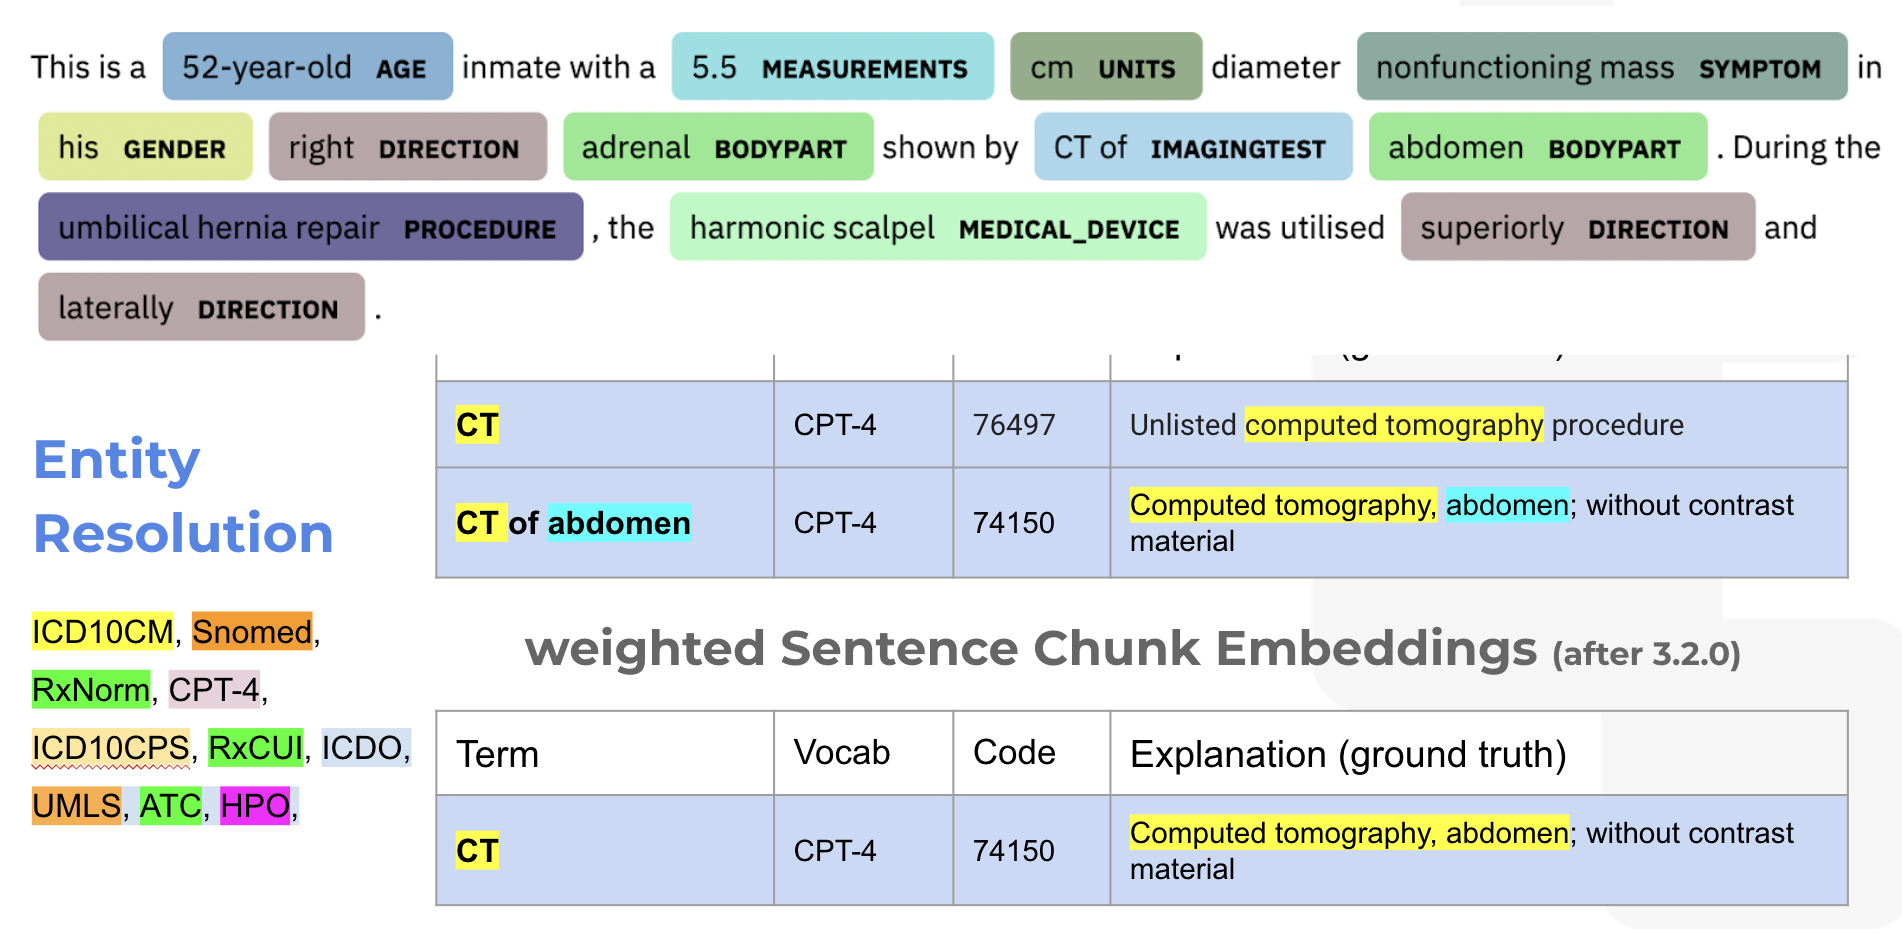

## Sentence Entity Resolver Models

**Entity Resolvers in SparkNLP**
- RxNorm
- ICD10-CM
- ICD-9-CM
- CPT
- SNOMED
- LOINC
- UMLS
- HPO
- HCPCS
- ICD-O
- MeSH
- NDC
- RX-CUI
- ATC


Sparknlp has more than **50 pretrained sentence entity resolver models**

<center><b>MODEL LIST</b>

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [sbertresolve_icd10cm_slim_billable_hcc_med](https://nlp.johnsnowlabs.com/2021/05/25/sbertresolve_icd10cm_slim_billable_hcc_med_en.html)  | 2| [sbertresolve_jsl_rxnorm_augmented_med](https://nlp.johnsnowlabs.com/2021/12/28/sbertresolve_jsl_rxnorm_augmented_med_en.html)  | 3| [sbertresolve_ner_model_finder](https://nlp.johnsnowlabs.com/2022/09/05/sbertresolve_ner_model_finder_en.html)  | 4| [sbertresolve_rxnorm_disposition](https://nlp.johnsnowlabs.com/2021/08/28/sbertresolve_rxnorm_disposition_en.html)  |
| 5| [sbertresolve_snomed_bodyStructure_med](https://nlp.johnsnowlabs.com/2021/06/15/sbertresolve_snomed_bodyStructure_med_en.html)  | 6| [sbertresolve_snomed_conditions](https://nlp.johnsnowlabs.com/2021/08/28/sbertresolve_snomed_conditions_en.html)  | 7| [sbiobert_jsl_rxnorm_cased](https://nlp.johnsnowlabs.com/2021/12/23/sbiobert_jsl_rxnorm_cased_en.html)  | 8| [sbiobertresolve_HPO](https://nlp.johnsnowlabs.com/2021/05/16/sbiobertresolve_HPO_en.html)  |
| 9| [sbiobertresolve_atc](https://nlp.johnsnowlabs.com/2022/03/01/sbiobertresolve_atc_en_3_0.html)  | 10| [sbiobertresolve_clinical_abbreviation_acronym](https://nlp.johnsnowlabs.com/2022/01/03/sbiobertresolve_clinical_abbreviation_acronym_en.html)  | 11| [sbiobertresolve_clinical_snomed_procedures_measurements](https://nlp.johnsnowlabs.com/2021/11/15/sbiobertresolve_clinical_snomed_procedures_measurements_en.html)  | 12| [sbiobertresolve_cpt](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_cpt_en.html)  |
| 13| [sbiobertresolve_cpt_augmented](https://nlp.johnsnowlabs.com/2021/05/30/sbiobertresolve_cpt_augmented_en.html)  | 14| [sbiobertresolve_cpt_procedures_augmented](https://nlp.johnsnowlabs.com/2021/05/30/sbiobertresolve_cpt_procedures_augmented_en.html)  | 15| [sbiobertresolve_cpt_procedures_measurements_augmented](https://nlp.johnsnowlabs.com/2022/05/10/sbiobertresolve_cpt_procedures_measurements_augmented_en_3_0.html)  | 16| [sbiobertresolve_cvx](https://nlp.johnsnowlabs.com/2022/10/12/sbiobertresolve_cvx_en.html)  |
| 17| [sbiobertresolve_hcc_augmented](https://nlp.johnsnowlabs.com/2021/05/30/sbiobertresolve_hcc_augmented_en.html)  | 18| [sbiobertresolve_hcpcs](https://nlp.johnsnowlabs.com/2021/09/29/sbiobertresolve_hcpcs_en.html)  | 19| [sbiobertresolve_icd10cm](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_icd10cm_en.html)  | 20| [sbiobertresolve_icd10cm_augmented](https://nlp.johnsnowlabs.com/2021/10/31/sbiobertresolve_icd10cm_augmented_en.html)  |
| 21| [sbiobertresolve_icd10cm_augmented_billable_hcc](https://nlp.johnsnowlabs.com/2021/11/01/sbiobertresolve_icd10cm_augmented_billable_hcc_en.html)  | 22| [sbiobertresolve_icd10cm_generalised](https://nlp.johnsnowlabs.com/2021/09/29/sbiobertresolve_icd10cm_generalised_en.html)  | 23| [sbiobertresolve_icd10cm_slim_billable_hcc](https://nlp.johnsnowlabs.com/2021/05/25/sbiobertresolve_icd10cm_slim_billable_hcc_en.html)  | 24| [sbiobertresolve_icd10cm_slim_normalized](https://nlp.johnsnowlabs.com/2021/05/17/sbiobertresolve_icd10cm_slim_normalized_en.html)  |
| 25| [sbiobertresolve_icd10pcs](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_icd10pcs_en.html)  | 26| [sbiobertresolve_icd10pcs_augmented](https://nlp.johnsnowlabs.com/2022/10/28/sbiobertresolve_icd10pcs_augmented_en.html)  | 27| [sbiobertresolve_icd9](https://nlp.johnsnowlabs.com/2022/09/30/sbiobertresolve_icd9_en.html)  | 28| [sbiobertresolve_icdo](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_icdo_en.html)  |
| 29| [sbiobertresolve_icdo_augmented](https://nlp.johnsnowlabs.com/2021/06/22/sbiobertresolve_icdo_augmented_en.html)  | 30| [sbiobertresolve_icdo_base](https://nlp.johnsnowlabs.com/2021/07/02/sbiobertresolve_icdo_base_en.html)  | 31| [sbiobertresolve_jsl_rxnorm_augmented](https://nlp.johnsnowlabs.com/2021/12/27/sbiobertresolve_jsl_rxnorm_augmented_en.html)  | 32| [sbiobertresolve_loinc](https://nlp.johnsnowlabs.com/2021/05/16/sbiobertresolve_loinc_en.html)  |
| 33| [sbiobertresolve_loinc_augmented](https://nlp.johnsnowlabs.com/2021/11/23/sbiobertresolve_loinc_augmented_en.html)  | 34| [sbiobertresolve_loinc_cased](https://nlp.johnsnowlabs.com/2021/12/24/sbiobertresolve_loinc_cased_en.html)  | 35| [sbiobertresolve_mesh](https://nlp.johnsnowlabs.com/2021/11/14/sbiobertresolve_mesh_en.html)  | 36| [sbiobertresolve_ndc](https://nlp.johnsnowlabs.com/2021/11/27/sbiobertresolve_ndc_en.html)  |
| 37| [sbiobertresolve_rxcui](https://nlp.johnsnowlabs.com/2021/05/16/sbiobertresolve_rxcui_en.html)  | 38| [sbiobertresolve_rxnorm](https://nlp.johnsnowlabs.com/2021/10/10/sbiobertresolve_rxnorm_en.html)  | 39| [sbiobertresolve_rxnorm_action_treatment](https://nlp.johnsnowlabs.com/2022/04/25/sbiobertresolve_rxnorm_action_treatment_en_2_4.html)  | 40| [sbiobertresolve_rxnorm_augmented](https://nlp.johnsnowlabs.com/2022/01/03/sbiobertresolve_rxnorm_augmented_en.html)  |
| 41| [sbiobertresolve_rxnorm_augmented_cased](https://nlp.johnsnowlabs.com/2021/12/28/sbiobertresolve_rxnorm_augmented_cased_en.html)  | 42| [sbiobertresolve_rxnorm_augmented_re](https://nlp.johnsnowlabs.com/2022/02/09/sbiobertresolve_rxnorm_augmented_re_en.html)  | 43| [sbiobertresolve_rxnorm_disposition](https://nlp.johnsnowlabs.com/2021/08/12/sbiobertresolve_rxnorm_disposition_en.html)  | 44| [sbiobertresolve_rxnorm_ndc](https://nlp.johnsnowlabs.com/2021/10/05/sbiobertresolve_rxnorm_ndc_en.html)  |
| 45| [sbiobertresolve_snomed_auxConcepts](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_auxConcepts_en.html)  | 46| [sbiobertresolve_snomed_auxConcepts_int](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_auxConcepts_int_en.html)  | 47| [sbiobertresolve_snomed_bodyStructure](https://nlp.johnsnowlabs.com/2021/06/15/sbiobertresolve_snomed_bodyStructure_en.html)  | 48| [sbiobertresolve_snomed_drug](https://nlp.johnsnowlabs.com/2022/01/18/sbiobertresolve_snomed_drug_en.html)  |
| 49| [sbiobertresolve_snomed_findings](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_findings_en.html)  | 50| [sbiobertresolve_snomed_findings_aux_concepts](https://nlp.johnsnowlabs.com/2021/07/14/sbiobertresolve_snomed_findings_aux_concepts_en.html)  | 51| [sbiobertresolve_snomed_findings_int](https://nlp.johnsnowlabs.com/2020/11/27/sbiobertresolve_snomed_findings_int_en.html)  | 52| [sbiobertresolve_snomed_procedures_measurements](https://nlp.johnsnowlabs.com/2021/11/11/sbiobertresolve_snomed_procedures_measurements_en.html)  |
| 53| [sbiobertresolve_umls_clinical_drugs](https://nlp.johnsnowlabs.com/2021/10/11/sbiobertresolve_umls_clinical_drugs_en.html)  | 54| [sbiobertresolve_umls_disease_syndrome](https://nlp.johnsnowlabs.com/2021/10/11/sbiobertresolve_umls_disease_syndrome_en.html)  | 55| [sbiobertresolve_umls_drug_substance](https://nlp.johnsnowlabs.com/2021/12/06/sbiobertresolve_umls_drug_substance_en.html)  | 56| [sbiobertresolve_umls_findings](https://nlp.johnsnowlabs.com/2021/10/03/sbiobertresolve_umls_findings_en.html)  |
| 57| [sbiobertresolve_umls_major_concepts](https://nlp.johnsnowlabs.com/2021/10/03/sbiobertresolve_umls_major_concepts_en.html)  | 58| [sbluebertresolve_loinc](https://nlp.johnsnowlabs.com/2021/04/29/sbluebertresolve_loinc_en.html)  | 59| [sbluebertresolve_loinc_uncased](https://nlp.johnsnowlabs.com/2022/01/18/sbluebertresolve_loinc_uncased_en.html)  | 60| [sbluebertresolve_rxnorm_augmented_uncased](https://nlp.johnsnowlabs.com/2021/12/28/sbluebertresolve_rxnorm_augmented_uncased_en.html)  |


<br>
<br>

<b>PRETRAINED PIPELINE LIST</b>

|index|model|
|-----:|:-----|
| 1| [cvx_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/10/12/cvx_resolver_pipeline_en.html)  |
| 2| [icd10cm_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/11/02/icd10cm_resolver_pipeline_en.html)  |
| 3| [icd9_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/09/30/icd9_resolver_pipeline_en.html)  |
| 4| [medication_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/09/01/medication_resolver_pipeline_en.html)  |
| 5| [medication_resolver_transform_pipeline](https://nlp.johnsnowlabs.com/2022/09/01/medication_resolver_transform_pipeline_en.html)  |
| 6| [umls_clinical_findings_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/26/umls_clinical_findings_resolver_pipeline_en_3_0.html)  |
| 7| [umls_disease_syndrome_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/26/umls_disease_syndrome_resolver_pipeline_en_3_0.html)  |
| 8| [umls_drug_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/26/umls_drug_resolver_pipeline_en_3_0.html)  |
| 9| [umls_drug_substance_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/25/umls_drug_substance_resolver_pipeline_en_3_0.html)  |
| 10| [umls_major_concepts_resolver_pipeline](https://nlp.johnsnowlabs.com/2022/07/25/umls_major_concepts_resolver_pipeline_en_3_0.html)  |





</center>

You can find all resolver models and more on [Models Hub](https://nlp.johnsnowlabs.com/models?task=Entity+Resolution&edition=Spark+NLP+for+Healthcare) page.

Our pipelines provide more metadata about the matching process other than providing the code in the "result" field;

- target_text -> Text to resolve
- resolved_text -> Best match text
- confidence -> Relative confidence for the top match (distance to probability)
- confidence_ratio -> Relative confidence for the top match. TopMatchConfidence / SecondMatchConfidence
- alternative_codes -> List of other plausible codes (in the KNN neighborhood)
- all_k_resolutions -> All codes descriptions
- all_k_results -> All resolved codes for metrics calculation purposes
- sentence -> SentenceId

We create a pipeline that from each of these problems, will try to assign a resolution on the content, the sentence embeddings and some pretrained models for resolver annotation.

The architecture of this new pipeline will be as follows:

- DocumentAssembler (text -> document)

- SentenceDetector (document -> sentence)

- Tokenizer (sentence -> token)

- WordEmbeddingsModel ([sentence, token] -> embeddings)

- MedicalNerModel ([sentence, token, embeddings] -> ner)

- NerConverter (["sentence, token, ner] -> ner_chunk

- Chunk2Doc (ner_chunk) -> ner_chunk_doc

- BertSentenceEmbeddings (ner_chunk_doc) -> sbert_embeddings

- SentenceEntityResolverModel ([ner_chunk, sbert_embeddings] -> resolution)

So from a text we end having a list of Named Entities (ner_chunk) and their resolutions.

`setPreservePosition(True)` takes exactly the original indices (under some tokenization conditions it might include some undesires chars like `")","]"...)`

`setPreservePosition(False)` takes adjusted indices based on substring indexing of the first (for begin) and last (for end) tokens


Let's see how we build a resolver pipeline

Firstly, we will write some **generic functions** for getting the codes and relation pairs

In [ ]:
# returns LP resolution results

import pandas as pd
pd.set_option('display.max_colwidth', 0)


def get_codes (lp, text, vocab='icd10cm_code', col_name="ner_chunk", hcc=False):
    
    full_light_result = lp.fullAnnotate(text)

    chunks = []
    codes = []
    begin = []
    end = []
    resolutions=[]
    all_distances =[]
    all_codes=[]
    all_cosines = []
    all_k_aux_labels=[]

    for chunk, code in zip(full_light_result[0][col_name], full_light_result[0][vocab]):
            
        begin.append(chunk.begin)
        end.append(chunk.end)
        chunks.append(chunk.result)
        codes.append(code.result) 
        all_codes.append(code.metadata['all_k_results'].split(':::'))
        resolutions.append(code.metadata['all_k_resolutions'].split(':::'))
        all_distances.append(code.metadata['all_k_distances'].split(':::'))
        all_cosines.append(code.metadata['all_k_cosine_distances'].split(':::'))
        if hcc:
            try:
                all_k_aux_labels.append(code.metadata['all_k_aux_labels'].split(':::'))
            except:
                all_k_aux_labels.append([])
        else:
            all_k_aux_labels.append([])

    df = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end, 'code':codes, 'all_codes':all_codes, 
                       'resolutions':resolutions, 'all_k_aux_labels':all_k_aux_labels,'all_distances':all_cosines})
    
    if hcc:

        df['billable'] = df['all_k_aux_labels'].apply(lambda x: [i.split('||')[0] for i in x])
        df['hcc_status'] = df['all_k_aux_labels'].apply(lambda x: [i.split('||')[1] for i in x])
        df['hcc_code'] = df['all_k_aux_labels'].apply(lambda x: [i.split('||')[2] for i in x])

    df = df.drop(['all_k_aux_labels'], axis=1)
    
    return df



In [ ]:
# returns spark df resolution results

def get_codes_from_df(result_df, chunk, output_col, hcc= False):
    
    
    if hcc:
        
        df = result_df.select(F.explode(F.arrays_zip(chunk+'.result', 
                                                           chunk+'.metadata', 
                                                           output_col+'.result', 
                                                           output_col+'.metadata')).alias("cols")) \
                                     .select(F.expr("cols['1']['sentence']").alias("sent_id"),
                                             F.expr("cols['0']").alias("ner_chunk"),
                                             F.expr("cols['1']['entity']").alias("entity"), 
                                             F.expr("cols['2']").alias("icd10_code"),
                                             F.expr("cols['3']['all_k_results']").alias("all_codes"),
                                             F.expr("cols['3']['all_k_resolutions']").alias("resolutions"),
                                             F.expr("cols['3']['all_k_aux_labels']").alias("hcc_list")).toPandas()



        codes = []
        resolutions = []
        hcc_all = []

        for code, resolution, hcc in zip(df['all_codes'], df['resolutions'], df['hcc_list']):

            codes.append(code.split(':::'))
            resolutions.append(resolution.split(':::'))
            hcc_all.append(hcc.split(":::"))

        df['all_codes'] = codes  
        df['resolutions'] = resolutions
        df['hcc_list'] = hcc_all
        
    else:
                       
        df = result_df.select(F.explode(F.arrays_zip(chunk+'.result', 
                                                           chunk+'.metadata', 
                                                           output_col+'.result', 
                                                           output_col+'.metadata')).alias("cols")) \
                                     .select(F.expr("cols['1']['sentence']").alias("sent_id"),
                                             F.expr("cols['0']").alias("ner_chunk"),
                                             F.expr("cols['1']['entity']").alias("entity"), 
                                             F.expr("cols['2']").alias(f"{output_col}"),
                                             F.expr("cols['3']['all_k_results']").alias("all_codes"),
                                             F.expr("cols['3']['all_k_resolutions']").alias("resolutions")).toPandas()



        codes = []
        resolutions = []

        for code, resolution in zip(df['all_codes'], df['resolutions']):

            codes.append(code.split(':::'))
            resolutions.append(resolution.split(':::'))

        df['all_codes'] = codes  
        df['resolutions'] = resolutions
        
    
    return df

In [ ]:
# returns billable informations in distinct columns

def extract_billable(bil):
  
    billable = []
    status = []
    code = []
 
    for b in bil:
        billable.append(b.split("||")[0])
        status.append(b.split("||")[1])
        code.append(b.split("||")[2])

    return (billable, status, code)

In [ ]:
# returns relation pair dataframe

def get_relations_df (results, col='relations'):
    rel_pairs=[]
    for rel in results[0][col]:
        rel_pairs.append(( 
          rel.metadata['entity1'], 
          rel.metadata['entity1_begin'],
          rel.metadata['entity1_end'],
          rel.metadata['chunk1'], 
          rel.metadata['entity2'],
          rel.metadata['entity2_begin'],
          rel.metadata['entity2_end'],
          rel.metadata['chunk2'], 
          rel.metadata['confidence']
        ))

    rel_df = pd.DataFrame(rel_pairs, columns=['entity1','entity1_begin','entity1_end','chunk1',
                                              'entity2','entity2_end','entity2_end','chunk2', 
                                              'confidence'])
    
    # limit df columns to get entity and chunks with results only
    rel_df = rel_df.iloc[:,[0,3,4,7,8]]
    
    return rel_df

### RxNorm Resolver

- RxNorm is a second vocabulary for prescription drugs. RxNorm provides a set of codes for clinical drugs, which are the combination of active ingredients, dose form, and strength of a drug. For example, the RxNorm code for ciprofloxacin 500 mg 24-hour extended-release tablet (the generic name for Cipro XR 500 mg) is RX10359383, regardless of brand or packaging.

- The goal of RxNorm is to allow computer systems to communicate drug-related information efficiently and unambiguously. Produced by the National Library of Medicine (NLM), RxNorm is available for distribution in both Metathesaurus Relation (MR) and Rich Release Format (RRF) tables. Currently there are no RxNorm names available for drugs with more than four active ingredients, those that are sold over the counter (OTC) or those that are international, due to the lack of appropriate information available about such drugs. 


<img src="https://www.nlm.nih.gov/research/umls/rxnorm/RxNorm_Drug_Relationships.png" width="750" alt="RxNorm Overview">

**Pretrained Models**

- `sbiobertresolve_rxnorm`
- `demo_sbiobertresolve_rxnorm`
- `sbiobertresolve_rxnorm_dispo`
- `sbiobertresolve_rxnorm_disposition`
- `sbertresolve_rxnorm_disposition`
- `sbiobertresolve_rxnorm_ndc`
- `sbiobertresolve_rxnorm_augmented`
- `sbiobertresolve_rxnorm_augmented_re`

Now, we will create a pipeline with `sbiobertresolve_rxnorm_augmented` pretrained model and see the results. 

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("ner_chunk")

sbert_embedder = nlp.BertSentenceEmbeddings.pretrained('sbiobert_base_cased_mli', 'en','clinical/models')\
      .setInputCols(["ner_chunk"])\
      .setOutputCol("sentence_embeddings")\
      .setCaseSensitive(False)
    
rxnorm_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_rxnorm_augmented","en", "clinical/models") \
      .setInputCols(["ner_chunk", "sentence_embeddings"]) \
      .setOutputCol("rxnorm_code")\
      .setDistanceFunction("EUCLIDEAN")

rxnorm_pipelineModel = nlp.PipelineModel(
      stages = [
          documentAssembler,
          sbert_embedder,
          rxnorm_resolver])

rxnorm_lp = nlp.LightPipeline(rxnorm_pipelineModel)

Checking the results with the help of our helper functions

In [ ]:
text = 'metformin 100 mg'

%time get_codes (rxnorm_lp, text, col_name = 'ner_chunk', vocab='rxnorm_code')

### RxNorm with DrugNormalizer

We have `DrugNormalizer` annotator that transforms text to the format used in the RxNorm and SNOMED standards.

It has **`policy`** parameter to remove patterns from text. Valid policy values are:
- "all",
- "abbreviations",
- "dosages" <br/>

Default is "all". "abbreviation" policy used to expend common drugs abbreviations, "dosages" policy used to convert drugs dosages and values to the standard form (see examples bellow).

For more details about the usage of `DrugNormalizer` annotator, please visit [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/23.Drug_Normalizer.ipynb)

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("ner_chunk_v0")

drug_normalizer = medical.DrugNormalizer() \
    .setInputCols("ner_chunk_v0") \
    .setOutputCol("ner_chunk") \
    .setPolicy('all')

rxnorm_pipelineModel2 = nlp.PipelineModel(
    stages = [
        documentAssembler,
        drug_normalizer,
        sbert_embedder,
        rxnorm_resolver])

rxnorm_lp2 = nlp.LightPipeline(rxnorm_pipelineModel2)

In [ ]:
text = 'aspirin 10 meq/ 5 ml oral sol'

%time get_codes (rxnorm_lp2, text, col_name = 'ner_chunk', vocab='rxnorm_code')

### Drug Spell Checker

We have pretrained spell checker model for drugs. Let's see how it works.

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = nlp.Tokenizer()\
    .setInputCols("document")\
    .setOutputCol("token")

spell = nlp.NorvigSweetingModel.pretrained("spellcheck_drug_norvig", "en", "clinical/models")\
    .setInputCols("token")\
    .setOutputCol("corrected_token")\

spell_pipeline = nlp.Pipeline(stages = [documentAssembler,
                              tokenizer, 
                              spell])

spell_model = spell_pipeline.fit(spark.createDataFrame([['']]).toDF('text')) 

spell_lp = nlp.LightPipeline(spell_model)
corrected = spell_lp.annotate("You have to take Neutrcare and colfosinum and a bit of Fluorometholne & Ribotril")

Checking the results

In [ ]:
print(" ".join(corrected['token']))
print(" ".join(corrected['corrected_token']))

### ICD-10-CM Resolver

**ICD10 BACKGROUND INFO**

**ICD-10-CM vs. ICD-10-PCS**

- With the transition to ICD-10, in the United States, ICD-9 codes are segmented into ICD-10-CM and ICD-10-PCS codes. **The "CM" in ICD-10-CM codes stands for clinical modification**; ICD-10-CM codes were developed by the Centers for Disease Control and Prevention in conjunction with the National Center for Health Statistics (NCHS), for outpatient medical coding and reporting in the United States, as published by the World Health Organization (WHO).

- **The "PCS" in ICD-10-PCS codes stands for the procedural classification system**. ICD-10-PCS is a completely separate medical coding system from ICD-10-CM, containing an additional 87,000 codes for use ONLY in United States inpatient, hospital settings. The procedure classification system (ICD-10-PCS) was developed by the Centers for Medicare and Medicaid Services (CMS) in conjunction with 3M Health Information Management (HIM).

- ICD-10-CM codes add increased specificity to their ICD-9 predecessors, growing to five times the number of codes as the present system; a total of 68,000 clinical modification diagnosis codes. ICD-10-CM codes provide the ability to track and reveal more information about the quality of healthcare, allowing healthcare providers to better understand medical complications, better design treatment and care, and better comprehend and determine the outcome of care.

- ICD-10-PCS is used only for inpatient, hospital settings in the United States, and is meant to replace volume 3 of ICD-9 for facility reporting of inpatient procedures. Due to the rapid and constant state of flux in medical procedures and technology, ICD-10-PCS was developed to accommodate the changing landscape. Common procedures, lab tests, and educational sessions that are not unique to the inpatient, hospital setting have been omitted from ICD-10-PCS.

- ICD-10 is confusing enough when you’re trying to digest the differences between ICD-9 and ICD-10, but there are also different types of ICD-10 codes that providers should be aware of.


**Primary difference between ICD-10-CM and ICD-10-PCS**

- When most people talk about ICD-10, they are referring to ICD-10CM. This is the code set for diagnosis coding and is used for all healthcare settings in the United States. ICD-10PCS, on the other hand, is used in hospital inpatient settings for inpatient procedure coding.

**ICD-10-CM breakdown**

- Approximately 68,000 codes
- 3–7 alphanumeric characters
- Facilitates timely processing of claims


**ICD-10-PCS breakdown**

- Will replace ICD-9-CM for hospital inpatient use only. 
- ICD-10-PCS will not replace CPT codes used by physicians. According to HealthCare Information Management, Inc. (HCIM), “Its only intention is to identify inpatient facility services in a way not directly related to physician work, but directed towards allocation of hospital services.”
- 7 alphanumeric characters

- ICD-10-PCS is very different from ICD-9-CM procedure coding due to its ability to be more specific and accurate. “This becomes increasingly important when assessing and tracking the quality of medical processes and outcomes, and compiling statistics that are valuable tools for research,” according to HCIM.

**Hierarchical Condition Category (HCC)**

- Hierarchical condition category (HCC) coding is a risk-adjustment model originally designed to estimate future health care costs for patients. The Centers for Medicare & Medicaid Services (CMS) HCC model was initiated in 2004 but is becoming increasingly prevalent as the environment shifts to value-based payment models.

- Hierarchical condition category relies on ICD-10 coding to assign risk scores to patients. Each HCC is mapped to an ICD-10 code. Along with demographic factors (such as age and gender), insurance companies use HCC coding to assign patients a risk adjustment factor (RAF) score. Using algorithms, insurances can use a patient’s RAF score to predict costs. For example, a patient with few serious health conditions could be expected to have average medical costs for a given time. However, a patient with multiple chronic conditions would be expected to have higher health care utilization and costs.

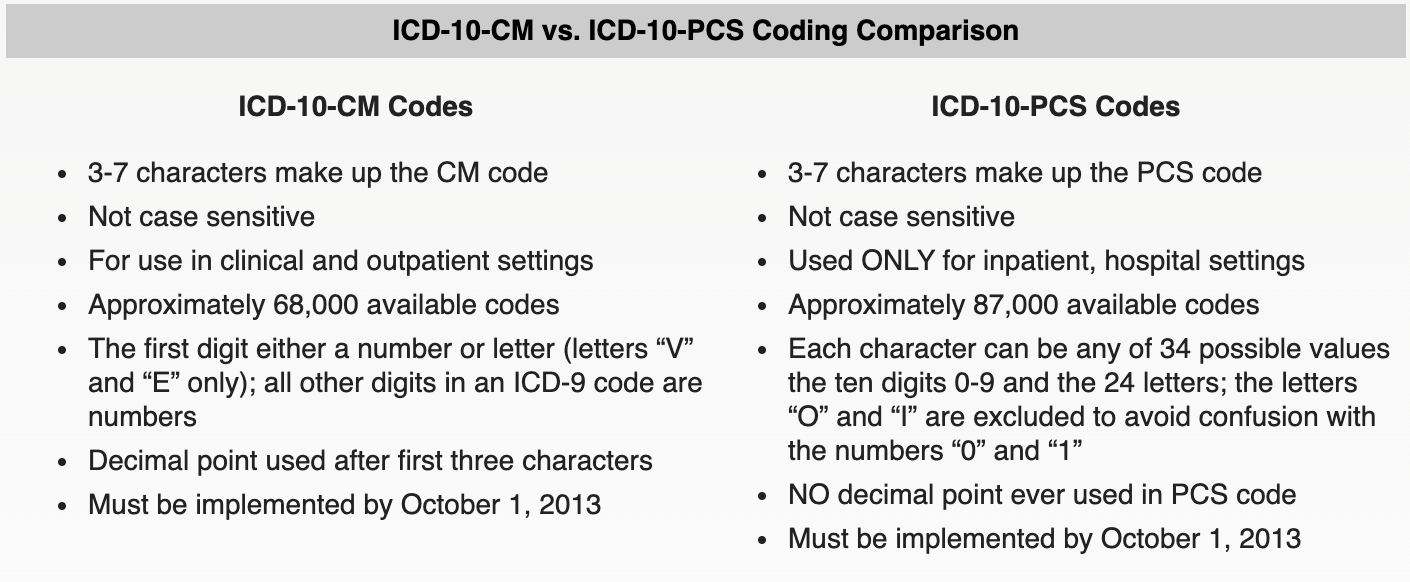

**Pretrained ICD-10 Models**

- `sbiobertresolve_icd10cm_augmented`
- `sbiobertresolve_icd10pcs`
- `sbiobertresolve_icd10cm_augmented_billable_hcc`
- `sbiobertresolve_icd10cm`
- `sbiobertresolve_icd10cm_slim_normalized`
- `sbiobertresolve_icd10cm_slim_billable_hcc`
- `sbertresolve_icd10cm_slim_billable_hcc_med`
- `sbiobertresolve_icd10cm_generalised`

Let's create an ICD10 pipeline with `sbiobertresolve_icd10cm_augmented_billable_hcc` model and see how it works

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector DL annotator, processes various sentences per line
sentenceDetectorDL = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare", "en", 'clinical/models') \
    .setInputCols(["document"]) \
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# WordEmbeddingsModel pretrained "embeddings_clinical" includes a model of 1.7Gb that needs to be downloaded
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("word_embeddings")

# Named Entity Recognition for clinical concepts.
clinical_ner = medical.NerModel().pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_chunk = medical.NerConverterInternal()\
    .setInputCols("sentence","token","clinical_ner")\
    .setOutputCol("clinical_ner_chunk")\
    .setWhiteList(["PROBLEM"])

c2doc = nlp.Chunk2Doc()\
    .setInputCols("clinical_ner_chunk")\
    .setOutputCol("ner_chunk_doc") 

sbiobert_embedder = nlp.BertSentenceEmbeddings.pretrained('sbiobert_base_cased_mli', 'en','clinical/models')\
    .setInputCols(["ner_chunk_doc"])\
    .setOutputCol("sentence_embeddings")\
    .setCaseSensitive(False)
    
icd_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_augmented_billable_hcc","en", "clinical/models") \
    .setInputCols(["clinical_ner_chunk", "sentence_embeddings"]) \
    .setOutputCol("icd10cm_code")\
    .setDistanceFunction("EUCLIDEAN")
    

# Build up the pipeline
resolver_pipeline = nlp.Pipeline(
    stages = [
        document_assembler,
        sentenceDetectorDL,
        tokenizer,
        word_embeddings,
        clinical_ner,
        clinical_ner_chunk,
        c2doc,
        sbiobert_embedder,
        icd_resolver
  ])

icd_model = resolver_pipeline.fit(spark.createDataFrame([['']]).toDF("text"))

In [ ]:
#sample clinical note
clinical_note = (
    'A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years '
    'prior to presentation and subsequent type two diabetes mellitus, associated '
    'with an acute hepatitis, and obesity with a body mass index (BMI) of 33.5 kg/m2, '
    'presented with a one-week history of polyuria, polydipsia, poor appetite, and vomiting. '
    'Two weeks prior to presentation, she was treated with a five-day course of amoxicillin '
    'for a respiratory tract infection. She had been on dapagliflozin for six months '
    'at the time of presentation. Physical examination on presentation was significant for dry oral mucosa; '
    'significantly, her abdominal examination was benign with no tenderness or guarding. Pertinent '
    'laboratory findings on admission were: serum glucose 111 mg/dl, bicarbonate 18 mmol/l, anion gap 20, '
    'creatinine 0.4 mg/dL, triglycerides 508 mg/dL, total cholesterol 122 mg/dL, glycated hemoglobin (HbA1c) '
    '10%, and venous pH 7.27. Serum lipase was normal at 43 U/L. Serum acetone levels could not be assessed '
    'as blood samples kept hemolyzing due to significant lipemia. The patient was initially admitted for '
    'starvation ketosis, as she reported poor oral intake for three days prior to admission.')

data_ner = spark.createDataFrame([[clinical_note]]).toDF("text")

Transforming the pipeline with clinical note

In [ ]:
icd10_result = icd_model.transform(data_ner)

Checking the results

In [ ]:
%%time
icd10_result.select("icd10cm_code.metadata").show(truncate=100)

In [ ]:
%%time

res_pd = get_codes_from_df(icd10_result, 'clinical_ner_chunk', 'icd10cm_code', hcc=True)

In [ ]:
res_pd.head(10)

**The values in `billable`, `hcc_code` and `hcc_status` columns are seperated by || and we will change them to a list.**

In [ ]:
res_pd["billable"] = res_pd["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,0]    
res_pd["hcc_status"] = res_pd["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,1]
res_pd["hcc_code"] = res_pd["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,2]

res_pd.drop("hcc_list", axis=1, inplace= True)

In [ ]:
res_pd.head(15)

### Entity Resolver Visualizer

Let's apply `EntityResolverVisualizer`  by using `sparknlp_display` library to see the results of the pipeline in a nicer layout:

In [ ]:
from sparknlp_display import EntityResolverVisualizer

icd10_lp = nlp.LightPipeline(icd_model)

light_result = icd10_lp.fullAnnotate(clinical_note)

visualiser = nlp.viz.EntityResolverVisualizer()

# Change color of an entity label
visualiser.set_label_colors({'PROBLEM':'#008080'})

visualiser.display(light_result[0], 'clinical_ner_chunk', 'icd10cm_code')

### CPT Resolver

The Current Procedural Terminology (CPT) code set is a medical code set maintained by the American Medical Association. The CPT code set describes medical, surgical, and diagnostic services and is designed to communicate uniform information about medical services and procedures among physicians, coders, patients, accreditation organizations, and payers for administrative, financial, and analytical purposes.

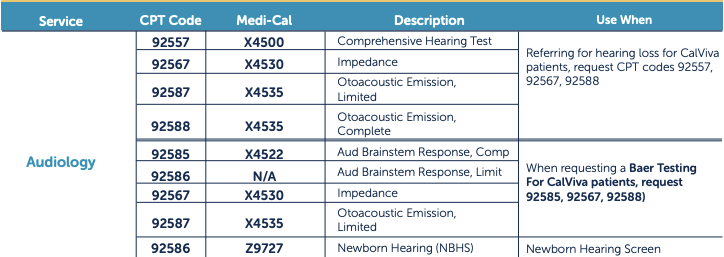

**Pretrained Models**

- `sbiobertresolve_cpt`
- `sbiobertresolve_cpt_procedures_augmented`
- `sbiobertresolve_cpt_augmented`
- `sbiobertresolve_cpt_procedures_measurements_augmented`

**We will create a pipeline to detect bodyparts and imaging tests entities and their relations. Then we will use these related chunks in CPT resolver model to get their CPT code.**

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetectorDL = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare", "en", 'clinical/models') \
    .setInputCols(["document"]) \
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("word_embeddings")

pos_tagger = nlp.PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token"])\
    .setOutputCol("pos_tags")
    
dependency_parser = nlp.DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tags", "token"])\
    .setOutputCol("dependencies")

# Named Entity Recognition for radiology reports.
radiology_ner = medical.NerModel.pretrained("jsl_rd_ner_wip_greedy_clinical", "en", "clinical/models") \
   .setInputCols(["sentence", "token", "word_embeddings"]) \
   .setOutputCol("ner")

radiology_ner_chunker = nlp.NerConverter()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")

re_model = medical.RelationExtractionModel()\
    .pretrained("re_bodypart_directions", "en", 'clinical/models')\
    .setInputCols(["word_embeddings", "pos_tags", "ner_chunk", "dependencies"])\
    .setOutputCol("relations")\
    .setRelationPairs(["imagingtest-bodypart", "bodypart-imagingtest"])\
    .setMaxSyntacticDistance(4)\
    .setPredictionThreshold(0.5)
      

# Build up the pipeline
rd_relation_pipeline = nlp.Pipeline(
    stages = [
        document_assembler,
        sentenceDetectorDL,
        tokenizer,
        word_embeddings,
        pos_tagger,
        dependency_parser,
        radiology_ner,
        radiology_ner_chunker,
        re_model
        ])


rd_rel_model = rd_relation_pipeline.fit(spark.createDataFrame([['']]).toDF("text"))

In [ ]:
light_rel_model = nlp.LightPipeline(rd_rel_model)

In [ ]:
text="Left shin pain. I have ordered x-ray of the left fibula and knee today. The patient will return to the clinic in 3 weeks. He is to call me in the interim for any problems."
light_result = light_rel_model.fullAnnotate(text)

get_relations_df(light_result)

Now we can get CPT codes of these related chunks.

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("clinical_ner_chunk")

sbert_embedder = nlp.BertSentenceEmbeddings.pretrained('sbiobert_base_cased_mli', 'en','clinical/models')\
    .setInputCols(["clinical_ner_chunk"])\
    .setOutputCol("sentence_embeddings")\
    .setCaseSensitive(False)
    
cpt_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_cpt_augmented","en", "clinical/models") \
    .setInputCols(["clinical_ner_chunk", "sentence_embeddings"]) \
    .setOutputCol("cpt_code")\
    .setDistanceFunction("EUCLIDEAN")


cpt_pipelineModel = nlp.PipelineModel(
    stages = [
        documentAssembler,
        sbert_embedder,
        cpt_resolver])


cpt_lp = nlp.LightPipeline(cpt_pipelineModel)

In [ ]:
text = 'fibula x-ray'

%time get_codes (cpt_lp, text, col_name='clinical_ner_chunk', vocab='cpt_code')

In [ ]:
text = 'knee x-ray'

%time get_codes (cpt_lp, text, col_name='clinical_ner_chunk', vocab='cpt_code')

In [ ]:
text="TECHNIQUE IN DETAIL: After informed consent was obtained from the patient and his mother, the chest was scanned with portable ultrasound."
light_result = light_rel_model.fullAnnotate(text)

get_relations_df(light_result)

In [ ]:
text = 'chest portable ultrasound'

%time get_codes (cpt_lp, text, col_name='clinical_ner_chunk', vocab='cpt_code')

### BertSentenceChunkEmbeddings


**BertSentenceChunkEmbeddings**

- This annotator let users to aggregate sentence embeddings and ner chunk embeddings to get more specific and accurate resolution codes. It works by averaging context and chunk embeddings to get contextual information. Input to this annotator is the context (sentence) and ner chunks, while the output is embedding for each chunk that can be fed to the resolver model. The `setChunkWeight` parameter can be used to control the influence of surrounding context.

- For more information and examples of `BertSentenceChunkEmbeddings` annotator, you can check here: 
[24.1.Improved_Entity_Resolution_with_SentenceChunkEmbeddings.ipynb](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/24.1.Improved_Entity_Resolution_with_SentenceChunkEmbeddings.ipynb)

Lets do the same process like we did with `BertSentenceEmbeddings` annotator and compare the results. We will create a new pipeline by using this annotator with SentenceEntityResolverModel.

In [ ]:
#Get average sentence-chunk Bert embeddings
sentence_chunk_embeddings = medical.BertSentenceChunkEmbeddings.pretrained("sbiobert_base_cased_mli", "en", "clinical/models")\
    .setInputCols(["sentence", "clinical_ner_chunk"])\
    .setOutputCol("sentence_embeddings")\
    .setCaseSensitive(False)\
    .setChunkWeight(0.5) #default : 0.5
    
icd_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_augmented_billable_hcc","en", "clinical/models") \
    .setInputCols(["clinical_ner_chunk", "sentence_embeddings"]) \
    .setOutputCol("icd10cm_code")\
    .setDistanceFunction("EUCLIDEAN")
  
resolver_pipeline_SCE = nlp.Pipeline(
    stages = [
        document_assembler,
        sentenceDetectorDL,
        tokenizer,
        word_embeddings,
        clinical_ner,
        clinical_ner_chunk,
        sentence_chunk_embeddings,
        icd_resolver
  ])


model_SCE = resolver_pipeline_SCE.fit(spark.createDataFrame([['']]).toDF("text"))

In [ ]:
model_SCE.stages

In [ ]:
icd10_result_SCE = model_SCE.transform(data_ner)

Checking the SentenceChunkEmbeddings results

In [ ]:
%%time

res_SCE_pd = get_codes_from_df(icd10_result_SCE, 'clinical_ner_chunk', 'icd10cm_code', hcc=True)

res_SCE_pd["billable"] = res_SCE_pd["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,0]    
res_SCE_pd["hcc_status"] = res_SCE_pd["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,1]
res_SCE_pd["hcc_code"] = res_SCE_pd["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,2]

res_SCE_pd.drop("hcc_list", axis=1, inplace= True)

In [ ]:
res_SCE_pd.head(15)

Lets compare the results that we got from these two methods.

In [ ]:
sentence_df = icd10_result.select(F.explode(F.arrays_zip('sentence.metadata', 'sentence.result')).alias("cols")) \
                          .select(F.expr("cols['0']['sentence']").alias("sent_id"),
                                  F.expr("cols['1']").alias("sentence_all")).toPandas()

comparison_df = pd.merge(res_pd.loc[:,'sent_id':'resolutions'],res_SCE_pd.loc[:,'sent_id':'resolutions'], on=['sent_id',"ner_chunk", "entity"], how='inner')
comparison_df.columns=['sent_id','ner_chunk', 'entity', 'icd10_code', 'all_codes', 'resolutions', 'icd10_code_SCE', 'all_codes_SCE', 'resolutions_SCE']

comparison_df = pd.merge(sentence_df, comparison_df,on="sent_id").drop('sent_id', axis=1)
comparison_df.head(15)

### Router - Using Resolver Models Together

- Normally, when we need to use more than one sentence entity resolver models in the same pipeline, we used to hit `BertSentenceEmbeddings` annotator more than once given the number of different resolver models in the same pipeline. Now we are introducing a solution with the help of `Router` annotator that could allow us to feed all the NER chunks to `BertSentenceEmbeddings` at once and then route the output of Sentence Embeddings to different resolver models needed.

- In this example, lets use `sbiobertresolve_rxnorm_augmented` RxNorm model and `sbiobertresolve_icd10cm_augmented_billable_hcc` ICD10CM-HCC models together. First we will get the `PROBLEM` entities form `ner_clinical` model and then get the `DRUG` entities from `ner_posology` model. Then we will merge them and use the `Chunk2Doc` annotator to create sentence chunks to populate Sentence Embeddings column. Then, we route the embeddings of `PROBLEM` entities to ICD10CM model and embeddings of `DRUG` entities to RxNorm model at the same time.

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = nlp.SentenceDetector()\
    .setInputCols("document")\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols("sentence")\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token")\
    .setOutputCol("word_embeddings")

# to get PROBLEM entitis
clinical_ner = medical.NerModel().pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("clinical_ner")

clinical_ner_chunk = medical.NerConverterInternal()\
    .setInputCols("sentence","token","clinical_ner")\
    .setOutputCol("clinical_ner_chunk")\
    .setWhiteList(["PROBLEM"])

# to get DRUG entities 
posology_ner = medical.NerModel().pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "word_embeddings"]) \
    .setOutputCol("posology_ner")

posology_ner_chunk = medical.NerConverterInternal()\
    .setInputCols("sentence","token","posology_ner")\
    .setOutputCol("posology_ner_chunk")\
    .setWhiteList(["DRUG"])

# merge the chunks into a single ner_chunk
chunk_merger = medical.ChunkMergeApproach()\
    .setInputCols("clinical_ner_chunk","posology_ner_chunk")\
    .setOutputCol("final_ner_chunk")\
    .setMergeOverlapping(False)


# convert chunks to doc to get sentence embeddings of them
chunk2doc = nlp.Chunk2Doc()\
    .setInputCols("final_ner_chunk")\
    .setOutputCol("doc_final_chunk")


sbiobert_embeddings = nlp.BertSentenceEmbeddings.pretrained("sbiobert_base_cased_mli","en","clinical/models")\
    .setInputCols(["doc_final_chunk"])\
    .setOutputCol("sbert_embeddings")\
    .setCaseSensitive(False)

# filter PROBLEM entity embeddings
router_sentence_icd10 = medical.Router() \
    .setInputCols("sbert_embeddings") \
    .setFilterFieldsElements(["PROBLEM"]) \
    .setOutputCol("problem_embeddings")

# filter DRUG entity embeddings
router_sentence_rxnorm = medical.Router() \
    .setInputCols("sbert_embeddings") \
    .setFilterFieldsElements(["DRUG"]) \
    .setOutputCol("drug_embeddings")

# use problem_embeddings only
icd_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_slim_billable_hcc","en", "clinical/models") \
    .setInputCols(["problem_embeddings"]) \
    .setOutputCol("icd10cm_code")\
    .setDistanceFunction("EUCLIDEAN")


# use drug_embeddings only
rxnorm_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_rxnorm_augmented","en", "clinical/models") \
    .setInputCols(["drug_embeddings"]) \
    .setOutputCol("rxnorm_code")\
    .setDistanceFunction("EUCLIDEAN")


pipeline = nlp.Pipeline(
    stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        clinical_ner,
        clinical_ner_chunk,
        posology_ner,
        posology_ner_chunk,
        chunk_merger,
        chunk2doc,
        sbiobert_embeddings,
        router_sentence_icd10,
        router_sentence_rxnorm,
        icd_resolver,
        rxnorm_resolver
])

empty_data = spark.createDataFrame([['']]).toDF("text")
model = pipeline.fit(empty_data)

In [ ]:
#sample clinical note
clinical_note = """The patient is a 41-year-old Vietnamese female with a cough that started last week. 
She has had right-sided chest pain radiating to her back with fever starting yesterday. 
She has a history of pericarditis in May 2006 and developed cough with right-sided chest pain. 
MEDICATIONS
1. Coumadin 1 mg daily. Last INR was on Tuesday, August 14, 2007, and her INR was 2.3.
2. Amiodarone 100 mg p.o. daily.
"""

Let's transform and see the results

In [ ]:
df = spark.createDataFrame([[clinical_note]]).toDF("text")

result = model.transform(df)

In [ ]:
%%time

icd10_result = get_codes_from_df(result, 'clinical_ner_chunk', 'icd10cm_code', hcc=True)

In [ ]:
# extract HCC informationinto different columns

icd10_result["billable"] = icd10_result["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,0]    
icd10_result["hcc_status"] = icd10_result["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,1]
icd10_result["hcc_code"] = icd10_result["hcc_list"].apply(extract_billable).apply(pd.Series).iloc[:,2]

icd10_result.drop("hcc_list", axis=1, inplace= True)

In [ ]:
icd10_result.head(15)

Now let's get RxNorm codes from our results.

In [ ]:
rxnorm_result = get_codes_from_df(result, 'posology_ner_chunk', 'rxnorm_code', hcc=False)

rxnorm_result.head()

### Sentence Entity Resolvers with EntityChunkEmbedding

**Entity Chunk Embeddings** uses BERT Sentence embeddings to compute a weighted average vector represention of related entity chunks. This model is a subclass of `BertSentenceEmbeddings` and shares all parameters with it. It can load any pretrained `BertSentenceEmbeddings` model. 

The input of the model consists of chunks of recognized named entities. One or more entities are selected as target entities and for each of them a list of related entities is specified (if empty, all other entities are assumed to be related).

 The model looks for chunks of the target entities and then tries to pair each target entity (e.g. DRUG) with other related entities (e.g. DOSAGE, STRENGTH, FORM, etc). The criterion for pairing a target entity with another related entity is that they appear in the same sentence and the **maximal syntactic distance** is below a predefined threshold. 

The relationship between target and related entities is one-to-many, meaning that if there are multiple instances of the same target entity (e.g. DRUG) within a sentence, the model will map a related entity (e.g. DOSAGE) to at most one of the instances of the target entity.

For example, if there is a sentence; "The patient was given 125 mg of paracetamol and metformin", the model will pair "125 mg" to "paracetamol", but not to "metformin". The output of the model is an average embeddings of the chunks of each of the target entities and their related entities. It is possible to specify a particular weight for each entity type. An entity can be defined both as target a entity and as a related entity for some other target entity.

Now, let's see how `EntityChunkEmbeddings` works. 

In [ ]:
documenter = nlp.DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = nlp.SentenceDetector() \
    .setInputCols("document") \
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer() \
    .setInputCols("sentence") \
    .setOutputCol("token")

embeddings = nlp.WordEmbeddingsModel() \
    .pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

posology_ner_model = medical.NerModel()\
    .pretrained("ner_posology_large", "en", "clinical/models")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols("sentence", "token", "ner")\
    .setOutputCol("ner_chunk")

pos_tager = nlp.PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models")\
    .setInputCols("sentence", "token")\
    .setOutputCol("pos_tag")

dependency_parser = nlp.DependencyParserModel()\
    .pretrained("dependency_conllu", "en")\
    .setInputCols(["sentence", "pos_tag", "token"])\
    .setOutputCol("dependencies")

entity_chunk_embeddings = medical.EntityChunkEmbeddings()\
    .pretrained("sbiobert_base_cased_mli","en","clinical/models")\
    .setInputCols(["ner_chunk", "dependencies"])\
    .setOutputCol("drug_chunk_embeddings")\
    .setMaxSyntacticDistance(3)

entity_chunk_embeddings.setTargetEntities({"DRUG": ["STRENGTH", "ROUTE", "FORM"]})
entity_chunk_embeddings.setEntityWeights({"DRUG": 0.8, "STRENGTH": 0.2, "ROUTE": 0.2, "FORM": 0.2})

rxnorm_re = medical.SentenceEntityResolverModel\
    .pretrained("sbiobertresolve_rxnorm_augmented_re", "en","clinical/models")\
    .setInputCols(["drug_chunk_embeddings"])\
    .setOutputCol("rxnorm_code")\
    .setDistanceFunction("EUCLIDEAN")

rxnorm_pipeline_re = nlp.Pipeline(
    stages = [
        documenter,
        sentence_detector,
        tokenizer,
        embeddings,
        posology_ner_model,
        ner_converter,
        pos_tager,
        dependency_parser,
        entity_chunk_embeddings,
        rxnorm_re
        ])

In [ ]:
import pandas as pd
sampleText = ["The patient was given metformin 500 mg tablet, 2.5 mg of coumadin and then ibuprofen.",
              "The patient was given metformin 400 mg, coumadin 5 mg, coumadin, amlodipine 10 MG tablet"]

sample_df = pd.DataFrame({'text':sampleText}).reset_index()

In [ ]:
data_df = spark.createDataFrame(sample_df)

results = rxnorm_pipeline_re.fit(data_df).transform(data_df)

Fit/transform the model with sample data

In [ ]:
results = rxnorm_pipeline_re.fit(data_df).transform(data_df)

Chunks extracted by NER model

In [ ]:
results.select("index", F.explode(F.arrays_zip(results.ner_chunk.result, 
                                               results.ner_chunk.metadata)).alias("cols")) \
.select("index", F.expr("cols['0']").alias("chunk"),
        F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

**Merged chunks by internal relation extraction model feature**

- We specified the relations as following by `.setTargetEntities` parameter in the EntityChunkEmbeddings annotator :    
`.setTargetEntities({"DRUG": ["STRENGTH", "ROUTE", "FORM"]})`

- EntityChunkEmbeddings calculates those new chunks embeddings according to the weights specified in`.setEntityWeights` parameter.

`.setEntityWeights({"DRUG": 0.8, "STRENGTH": 0.2, "ROUTE": 0.2, "FORM": 0.2})`

In [ ]:
results.select('index','drug_chunk_embeddings.result').show(truncate = False)

**RxNorm results**

In [ ]:
results.select('index', F.explode(F.arrays_zip(results.drug_chunk_embeddings.result, 
                                               results.rxnorm_code.result, 
                                               results.rxnorm_code.metadata).alias("col")))\
        .select('index', F.expr("col['0']").alias("chunk"),
                         F.expr("col['1']").alias("rxnorm_code_"),
                         F.expr("col['2']['resolved_text']").alias("Concept_Name")).show(truncate = 50)

### Healthcare Codes Mapping by Using Pretrained Pipelines

In Spark NLP, there are pretrained pipelines that can map these healthcare codes each other. Here is a list of these pipelines:

|index|model|
|-----:|:-----|
| 1| [icd10_icd9_mapping](https://nlp.johnsnowlabs.com/2022/09/30/icd10_icd9_mapping_en.html)   |
| 2| [icdo_snomed_mapping](https://nlp.johnsnowlabs.com/2022/06/27/icdo_snomed_mapping_en_3_0.html)   |
| 3| [icd10cm_snomed_mapping](https://nlp.johnsnowlabs.com/2022/06/27/icd10cm_snomed_mapping_en_3_0.html)   |
| 4| [rxnorm_ndc_mapping](https://nlp.johnsnowlabs.com/2022/06/27/rxnorm_ndc_mapping_en_3_0.html)   |
| 5| [rxnorm_umls_mapping](https://nlp.johnsnowlabs.com/2022/06/27/rxnorm_umls_mapping_en_3_0.html)   |
| 6| [snomed_icd10cm_mapping](https://nlp.johnsnowlabs.com/2022/06/27/snomed_icd10cm_mapping_en_3_0.html)   |
| 7| [snomed_icdo_mapping](https://nlp.johnsnowlabs.com/2022/06/27/snomed_icdo_mapping_en_3_0.html)   |
| 8| [snomed_umls_mapping](https://nlp.johnsnowlabs.com/2022/06/27/snomed_umls_mapping_en_3_0.html)   |
| 9| [icd10cm_umls_mapping](https://nlp.johnsnowlabs.com/2022/06/27/icd10cm_umls_mapping_en_3_0.html)   |
| 10| [mesh_umls_mapping](https://nlp.johnsnowlabs.com/2021/07/01/mesh_umls_mapping_en.html)   |
| 11| [rxnorm_mesh_mapping](https://nlp.johnsnowlabs.com/2021/07/01/rxnorm_mesh_mapping_en.html)   |


**You can find all these models and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?q=Chunk+Mapping&edition=Spark+NLP+for+Healthcare)**
Lets show an example of ICD codes mapping to Snomed Codes to show how these pipelines work. 

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
icd10_snomed_pipeline = nlp.PretrainedPipeline("icd10cm_snomed_mapping", "en", "clinical/models")

In [ ]:
icd10_snomed_pipeline.annotate('M8950 E119 H16269')

|**ICD10CM Code** | **ICD10CM Details** | **SNOMED Code** | **SNOMED Details** |
| ---------- | -----------:| ---------- | -----------:|
| M8950 |  Osteolysis, unspecified site | 716868003 | Multicentric osteolysis nodulosis arthropathy spectrum |
| E119 | Type 2 diabetes mellitus | 170771004 | Diabetic - follow-up default |
| H16269 | Vernal keratoconjunctivitis, with limbar and corneal involvement, unspecified eye | 51264003 | Limbal AND/OR corneal involvement in vernal conjunctivitis |


Also, if you want to see more examples, please check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.1.Healthcare_Code_Mapping.ipynb).



# 7.Chunk Mapping

We can use ChunkMapper to map entities with their associated code/reference based on pre-defined dictionaries. 

There is an AnnotatorApproach of the ChunkMapper,  `ChunkMapperApproach`,  which can be used to train ChunkMapper models by giving a custom mapping dictionary. To use pretriained models, there is a `ChunkMapperModel` annotator.

The annotator also allows using **fuzzy matching**, which can take into consideration parts of the tokens that can map even when word order is different, char ngrams that can map even when there are typos, and using fuzzy distance metric (Jaccard, Levenshtein, etc.).

### Pretrained ChunkMapper Models

**<center>MAPPER MODELS**

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [abbreviation_category_mapper](https://nlp.johnsnowlabs.com/2022/11/16/abbreviation_category_mapper_en.html)  | 2| [abbreviation_mapper](https://nlp.johnsnowlabs.com/2022/05/11/abbreviation_mapper_en_3_0.html)  | 3| [abbreviation_mapper_augmented](https://nlp.johnsnowlabs.com/2022/10/30/abbreviation_mapper_augmented_en.html)  |
| 4| [cvx_code_mapper](https://nlp.johnsnowlabs.com/2022/10/12/cvx_code_mapper_en.html)  | 5| [cvx_name_mapper](https://nlp.johnsnowlabs.com/2022/10/12/cvx_name_mapper_en.html)  | 6| [drug_action_treatment_mapper](https://nlp.johnsnowlabs.com/2022/03/31/drug_action_treatment_mapper_en_3_0.html)  |
| 7| [drug_ade_mapper](https://nlp.johnsnowlabs.com/2022/08/23/drug_ade_mapper_en.html)  | 8| [drug_brandname_ndc_mapper](https://nlp.johnsnowlabs.com/2022/05/11/drug_brandname_ndc_mapper_en_3_0.html)  | 9| [drug_category_mapper](https://nlp.johnsnowlabs.com/2022/12/18/drug_category_mapper_en.html)  |
| 10| [icd10_icd9_mapper](https://nlp.johnsnowlabs.com/2022/09/30/icd10_icd9_mapper_en.html)  | 11| [icd10cm_mapper](https://nlp.johnsnowlabs.com/2022/10/29/icd10cm_mapper_en.html)  | 12| [icd10cm_snomed_mapper](https://nlp.johnsnowlabs.com/2022/06/26/icd10cm_snomed_mapper_en_3_0.html)  |
| 13| [icd10cm_umls_mapper](https://nlp.johnsnowlabs.com/2022/06/26/icd10cm_umls_mapper_en_3_0.html)  | 14| [icd9_icd10_mapper](https://nlp.johnsnowlabs.com/2022/09/30/icd9_icd10_mapper_en.html)  | 15| [icd9_mapper](https://nlp.johnsnowlabs.com/2022/09/30/icd9_mapper_en.html)  |
| 16| [icdo_snomed_mapper](https://nlp.johnsnowlabs.com/2022/06/26/icdo_snomed_mapper_en_3_0.html)  | 17| [kegg_disease_mapper](https://nlp.johnsnowlabs.com/2022/11/18/kegg_disease_mapper_en.html)  | 18| [kegg_drug_mapper](https://nlp.johnsnowlabs.com/2022/11/21/kegg_drug_mapper_en.html)  |
| 19| [mesh_umls_mapper](https://nlp.johnsnowlabs.com/2022/06/26/mesh_umls_mapper_en_3_0.html)  | 20| [normalized_section_header_mapper](https://nlp.johnsnowlabs.com/2022/06/26/normalized_section_header_mapper_en_3_0.html)  | 21| [rxnorm_action_treatment_mapper](https://nlp.johnsnowlabs.com/2022/05/08/rxnorm_action_treatment_mapper_en_3_0.html)  |
| 22| [rxnorm_mapper](https://nlp.johnsnowlabs.com/2022/06/27/rxnorm_mapper_en_3_0.html)  | 23| [rxnorm_ndc_mapper](https://nlp.johnsnowlabs.com/2022/05/20/rxnorm_ndc_mapper_en_3_0.html)  | 24| [rxnorm_normalized_mapper](https://nlp.johnsnowlabs.com/2022/09/29/rxnorm_normalized_mapper_en.html)  |
| 25| [rxnorm_umls_mapper](https://nlp.johnsnowlabs.com/2022/06/26/rxnorm_umls_mapper_en_3_0.html)  | 26| [snomed_icd10cm_mapper](https://nlp.johnsnowlabs.com/2022/06/26/snomed_icd10cm_mapper_en_3_0.html)  | 27| [snomed_icdo_mapper](https://nlp.johnsnowlabs.com/2022/06/26/snomed_icdo_mapper_en_3_0.html)  |
| 28| [snomed_umls_mapper](https://nlp.johnsnowlabs.com/2022/06/27/snomed_umls_mapper_en_3_0.html)  | 29| [umls_clinical_drugs_mapper](https://nlp.johnsnowlabs.com/2022/07/06/umls_clinical_drugs_mapper_en_3_0.html)  | 30| [umls_clinical_findings_mapper](https://nlp.johnsnowlabs.com/2022/07/08/umls_clinical_findings_mapper_en_3_0.html)  |
| 31| [umls_disease_syndrome_mapper](https://nlp.johnsnowlabs.com/2022/07/11/umls_disease_syndrome_mapper_en_3_0.html)  | 32| [umls_drug_substance_mapper](https://nlp.johnsnowlabs.com/2022/07/11/umls_drug_substance_mapper_en_3_0.html)  | 33| [umls_major_concepts_mapper](https://nlp.johnsnowlabs.com/2022/07/11/umls_major_concepts_mapper_en_3_0.html)  |

**You can find all these models and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?q=Chunk+Mapping&edition=Spark+NLP+for+Healthcare)**

<br>

**<center>PRETRAINED MAPPER PIPELINES**

|index|model|
|-----:|:-----|
| 1| [icd10_icd9_mapping](https://nlp.johnsnowlabs.com/2022/09/30/icd10_icd9_mapping_en.html)  |
| 2| [icd10cm_snomed_mapping](https://nlp.johnsnowlabs.com/2022/06/27/icd10cm_snomed_mapping_en_3_0.html)  |
| 3| [icd10cm_umls_mapping](https://nlp.johnsnowlabs.com/2021/05/04/icd10cm_umls_mapping_en.html)  |
| 4| [icdo_snomed_mapping](https://nlp.johnsnowlabs.com/2022/06/27/icdo_snomed_mapping_en_3_0.html)  |
| 5| [mesh_umls_mapping](https://nlp.johnsnowlabs.com/2021/05/04/mesh_umls_mapping_en.html)  |
| 6| [rxnorm_mesh_mapping](https://nlp.johnsnowlabs.com/2021/05/04/rxnorm_mesh_mapping_en.html)  |
| 7| [rxnorm_ndc_mapping](https://nlp.johnsnowlabs.com/2022/06/27/rxnorm_ndc_mapping_en_3_0.html)  |
| 8| [rxnorm_umls_mapping](https://nlp.johnsnowlabs.com/2021/05/04/rxnorm_umls_mapping_en.html)  |
| 9| [snomed_icd10cm_mapping](https://nlp.johnsnowlabs.com/2021/05/02/snomed_icd10cm_mapping_en.html)  |
| 10| [snomed_icdo_mapping](https://nlp.johnsnowlabs.com/2022/06/27/snomed_icdo_mapping_en_3_0.html)  |
| 11| [snomed_umls_mapping](https://nlp.johnsnowlabs.com/2021/05/04/snomed_umls_mapping_en.html)  |



You can check [Healthcare Code Mapping Notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Healthcare/11.1.Healthcare_Code_Mapping.ipynb) for the examples of pretrained mapper pipelines.

Let's create a piepline with `drug_action_treatment_mapper` and see how it works.

Pretrained `drug_action_treatment_mapper` model maps drugs with their corresponding `action` and `treatment` through `ChunkMapperModel()` annotator. <br/>

We will create a pipeline consisting `bert_token_classifier_drug_development_trials` ner model to extract ner chunk as well as `ChunkMapperModel()`.

In [ ]:
#ChunkMapper Pipeline
document_assembler = nlp.DocumentAssembler()\
      .setInputCol('text')\
      .setOutputCol('document')

sentence_detector = nlp.SentenceDetector()\
      .setInputCols(["document"])\
      .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
      .setInputCols("sentence")\
      .setOutputCol("token")

btfc_ner =  medical.BertForTokenClassification.pretrained("bert_token_classifier_drug_development_trials", "en", "clinical/models")\
      .setInputCols("token","sentence")\
      .setOutputCol("btfc_ner")

btfc_ner_converter = nlp.NerConverter()\
      .setInputCols("sentence", "token", "btfc_ner")\
      .setOutputCol("btfc_ner_chunk")

#drug_action_treatment_mapper 
chunkerMapper= medical.ChunkMapperModel().pretrained("drug_action_treatment_mapper", "en", "clinical/models")\
    .setInputCols(["btfc_ner_chunk"])\
    .setOutputCol("mappings")\
    .setRels(["action", "treatment"])


mapperPipeline = nlp.Pipeline().setStages([
    document_assembler,
    sentence_detector,
    tokenizer,
    btfc_ner, 
    btfc_ner_converter, 
    chunkerMapper])


test_data = spark.createDataFrame([["The patient was female and patient of Dr. X. and she was given Dermovate, Aspagin"]]).toDF("text")

res = mapperPipeline.fit(test_data).transform(test_data)

Drugs detected by ner model

In [ ]:
res.select(F.explode('btfc_ner_chunk.result').alias("chunks")).show(truncate=False)

Checking the mapping results for **action** and **treatment** <br/>

if exist, we can see all the mappings for each chunk under the metadata column. 

In [ ]:
res.select(F.explode(F.arrays_zip(res.mappings.result, 
                                  res.mappings.metadata)).alias("col"))\
    .select(F.expr("col['1']['entity']").alias("ner_chunk"),
            F.expr("col['0']").alias("mapping_result"),
            F.expr("col['1']['relation']").alias("relation"),
            F.expr("col['1']['all_relations']").alias("all_mappings")).show(truncate=False)

### Chunk Mapping with Fuzzy Distance Calculation

We will create a sample text with a typo in the "dermovae", then will feed the `drug_action_treatment_mapper` model with fuzzy matching feature to map **action** of each drug. 

Also, we can modify the `setAllowMultiTokenChunk()` parameter to control matching of multi-token chunks. We will check that feature by observing the "Warfarina Lusa". 

In [ ]:
sample_text= "The patient was female and patient of Dr. X. and she was given dermovae, Warfarina Lusa"
test_data = spark.createDataFrame([[sample_text]]).toDF("text")


In [ ]:
chunkerMapper_fuzzy = medical.ChunkMapperModel.pretrained("drug_action_treatment_mapper", "en", "clinical/models")\
    .setInputCols(["btfc_ner_chunk"])\
    .setOutputCol("mappings")\
    .setRels(["action"]) \
    .setAllowMultiTokenChunk(True) \
    .setEnableFuzzyMatching(True) \
    .setFuzzyMatchingDistanceThresholds(0.3)


mapperPipeline = nlp.Pipeline().setStages([
    document_assembler,
    sentence_detector,
    tokenizer,
    btfc_ner, 
    btfc_ner_converter, 
    chunkerMapper_fuzzy])


fuzzy_res = mapperPipeline.fit(test_data).transform(test_data)

In [ ]:
fuzzy_res.select(F.explode(F.arrays_zip(fuzzy_res.mappings.result, 
                                        fuzzy_res.mappings.metadata)).alias("col"))\
    .select(F.expr("col['1']['entity']").alias("ner_chunk"),
            F.expr("col['1']['__trained__']").alias("fixed_chunk"),
            F.expr("col['0']").alias("action_mapping_result"),
            F.expr("col['1']['relation']").alias("relation ")).show(truncate=False)

As seen above, mapper model was able to return mappings based on fuzzy matching even though there is a typo in "dermovae". <br/>

Also, it returned mappings for "Warfarina Lusa" since we set `setAllowMultiTokenChunk(True)` parameter. 

### Creating a Mapper Model

There is a `ChunkMapperApproach()` to create your own mapper model. <br/>

This receives an `ner_chunk` and a Json with a mapping of ner entities and relations, and returns the `ner_chunk` augmented with the relations from the Json ontology. <br/> We give the path of json file to the `setDictionary()` parameter.




Let's create an example Json, then create a drug mapper model. This model will match the given drug name (only "metformin" for our example) with correpsonding action and treatment.  

The format of json file should be like following:


In [ ]:
data_set = {
  "mappings": [
    {
      "key": "metformin",
      "relations": [
        {
          "key": "action",
          "values" : ["hypoglycemic", "Drugs Used In Diabetes"]
        },
        {
          "key": "treatment",
          "values" : ["diabetes", "t2dm"]
        }
      ]
    }
  ]
}

import json
with open('sample_drug.json', 'w', encoding='utf-8') as f:
    json.dump(data_set, f, ensure_ascii=False, indent=4)

By using `setRels()` parameter, we tell the model which type of mappings we want. In our case, we set the parameter as `setRels(["action", "treatment"])`.

Also, we can manage the case status while creating a model by using `setLowerCase()` parameter.

Let's create a pipeline and see it in action. 

In [ ]:
document_assembler = nlp.DocumentAssembler()\
      .setInputCol('text')\
      .setOutputCol('document')

sentence_detector = nlp.SentenceDetector()\
      .setInputCols(["document"])\
      .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
      .setInputCols("sentence")\
      .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
      .setInputCols(["sentence", "token"])\
      .setOutputCol("embeddings")

posology_ner_model = medical.NerModel.pretrained("ner_posology_large", "en", "clinical/models")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("posology_ner")

posology_ner_converter = medical.NerConverterInternal()\
    .setInputCols("sentence", "token", "posology_ner")\
    .setOutputCol("posology_ner_chunk")\
    .setWhiteList(["DRUG"])

chunkerMapper = medical.ChunkMapperApproach()\
      .setInputCols(["posology_ner_chunk"])\
      .setOutputCol("mappings")\
      .setDictionary("/content/sample_drug.json")\
      .setRels(["action", "treatment"]) \
      .setLowerCase(True)

mapper_pipeline = nlp.Pipeline().setStages([
        document_assembler,
        sentence_detector,
        tokenizer, 
        word_embeddings,
        posology_ner_model, 
        posology_ner_converter, 
        chunkerMapper])


empty_data = spark.createDataFrame([[""]]).toDF("text")

mapper_model = mapper_pipeline.fit(empty_data)

Let's save the model and check the results by using `load()`.

In [ ]:
mapper_model.stages[-1].write().overwrite().save("models/drug_mapper")

In [ ]:
#loading the trained model from disk
chunkerMapper = medical.ChunkMapperModel.load("models/drug_mapper")\
      .setInputCols(["posology_ner_chunk"])\
      .setOutputCol("mappings")\
      .setRels(["action", "treatment"]) \
      .setLowerCase(True)

mapper_pipeline = nlp.Pipeline().setStages([
        document_assembler,
        sentence_detector,
        tokenizer, 
        word_embeddings,
        posology_ner_model, 
        posology_ner_converter, 
        chunkerMapper])


test_data = spark.createDataFrame([["The patient was given 1 unit of Metformin daily."]]).toDF("text")

mapper_model = mapper_pipeline.fit(test_data)
res= mapper_model.transform(test_data)

In [ ]:
#ner result
res.select(F.explode('posology_ner_chunk.result').alias("chunks")).show(truncate=False)

In [ ]:
#mapping result
res.select(F.explode(F.arrays_zip(res.mappings.result, 
                                  res.mappings.metadata)).alias("col"))\
    .select(F.expr("col['1']['entity']").alias("ner_chunk"),
            F.expr("col['0']").alias("mapping_result"),
            F.expr("col['1']['relation']").alias("relation"),
            F.expr("col['1']['all_relations']").alias("all_mappings")).show(truncate=False)

As you see, we successfully created our custom mapper model. 

### ResolverMerger - Using Sentence Entity Resolver and `ChunkMapperModel` Together

We can merge the results of `ChunkMapperModel` and `SentenceEntityResolverModel` by using `ResolverMerger` annotator. 

We can detect our results that fail by `ChunkMapperModel` with `ChunkMapperFilterer` and then merge the resolver and mapper results with `ResolverMerger`


In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol('text')\
    .setOutputCol('document')

sentence_detector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = nlp.Tokenizer()\
    .setInputCols("sentence")\
    .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

ner_model = medical.NerModel.pretrained("ner_posology_greedy", "en", "clinical/models")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal()\
    .setInputCols("sentence", "token", "ner")\
    .setOutputCol("chunk")

chunkerMapper = medical.ChunkMapperModel.pretrained("rxnorm_mapper", "en", "clinical/models")\
    .setInputCols(["chunk"])\
    .setOutputCol("RxNorm_Mapper")\
    .setRel("rxnorm_code")

cfModel = medical.ChunkMapperFilterer() \
    .setInputCols(["chunk", "RxNorm_Mapper"]) \
    .setOutputCol("chunks_fail") \
    .setReturnCriteria("fail")

chunk2doc = nlp.Chunk2Doc() \
    .setInputCols("chunks_fail") \
    .setOutputCol("doc_chunk")

sbert_embedder = nlp.BertSentenceEmbeddings.pretrained('sbiobert_base_cased_mli', 'en','clinical/models')\
    .setInputCols(["doc_chunk"])\
    .setOutputCol("sentence_embeddings")\
    .setCaseSensitive(False)

resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_rxnorm_augmented", "en", "clinical/models") \
    .setInputCols(["sentence_embeddings"]) \
    .setOutputCol("resolver_code") \
    .setDistanceFunction("EUCLIDEAN")

resolverMerger = medical.ResolverMerger()\
    .setInputCols(["resolver_code","RxNorm_Mapper"])\
    .setOutputCol("RxNorm")

mapper_pipeline = nlp.Pipeline(
    stages = [
        document_assembler,
        sentence_detector,
        tokenizer,
        word_embeddings,
        ner_model,
        ner_converter,
        chunkerMapper,
        chunkerMapper,
        cfModel,
        chunk2doc,
        sbert_embedder,
        resolver,
        resolverMerger
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = mapper_pipeline.fit(empty_data)

In [ ]:
samples = [['The patient was given Adapin 10 MG, coumadn 5 mg'],
           ['The patient was given Avandia 4 mg, Tegretol, zitiga'] ]

result = model.transform(spark.createDataFrame(samples).toDF("text"))

In [ ]:
result.selectExpr('chunk.result as chunk', 
                  'RxNorm_Mapper.result as RxNorm_Mapper', 
                  'chunks_fail.result as chunks_fail', 
                  'resolver_code.result as resolver_code',
                  'RxNorm.result as RxNorm')\
      .show(truncate = False)

# 8.Pretrained Clinical Pipelines

In order to save you from creating a pipeline from scratch, Spark NLP also has a pre-trained pipelines that are already fitted using certain annotators and transformers according to various use cases.

Here is the list of clinical pre-trained pipelines: 

**1.   explain_clinical_doc_carp** :

> A pipeline with `ner_clinical`, `assertion_dl`, `re_clinical` and `ner_posology`. It will extract clinical and medication entities, assign assertion status and find relationships between clinical entities.

**2.   explain_clinical_doc_era** :

> A pipeline with `ner_clinical_events`, `assertion_dl` and `re_temporal_events_clinical`. It will extract clinical entities, assign assertion status and find temporal relationships between clinical entities.

**3.   explain_clinical_doc_ade** :

> A pipeline for `Adverse Drug Events (ADE)` with `ner_ade_biobert`, `assertiondl_biobert`, `classifierdl_ade_conversational_biobert` and `re_ade_biobert`. It will classify the document, extract `ADE` and `DRUG` entities, assign assertion status to `ADE` entities, and relate them with `DRUG` entities, then assign ADE status to a text (`True` means ADE, `False` means not related to ADE).

**letter codes in the naming conventions:**

> c : ner_clinical

> e : ner_clinical_events

> r : relation extraction

> p : ner_posology

> a : assertion

> ade : adverse drug events

**Relation Extraction types:**

`re_clinical` >> TrIP (improved), TrWP (worsened), TrCP (caused problem), TrAP (administered), TrNAP (avoided), TeRP (revealed problem), TeCP (investigate problem), PIP (problems related)

`re_temporal_events_clinical` >> `AFTER`, `BEFORE`, `OVERLAP`

**4. explain_clinical_doc_medication:**

> A pipeline for detecting posology entities with the `ner_posology_large` NER model, assigning their assertion status with `assertion_jsl` model, and extracting relations between posology-related terminology with `posology_re` relation extraction model.


**5. explain_clinical_doc_radiology**

> A pipeline for detecting radiology entities with the `ner_radiology` NER model, assigning their assertion status with `assertion_dl_radiology` model, and extracting relations between the diagnosis, test, and findings with `re_test_problem_finding` relation extraction model.

**6. Clinical Deidentification** :

>This pipeline can be used to deidentify PHI information from medical texts. The PHI information will be masked and obfuscated in the resulting text. The pipeline can mask and obfuscate `AGE`, `CONTACT`, `DATE`, `ID`, `LOCATION`, `NAME`, `PROFESSION`, `CITY`, `COUNTRY`, `DOCTOR`, `HOSPITAL`, `IDNUM`, `MEDICALRECORD`, `ORGANIZATION`, `PATIENT`, `PHONE`, `PROFESSION`, `STREET`, `USERNAME`, `ZIP`, `ACCOUNT`, `LICENSE`, `VIN`, `SSN`, `DLN`, `PLATE`, `IPADDR` entities.

**7. NER Pipelines:**

> Pipelines for all the available pretrained NER models.

**8. BERT Based NER Pipelines**

> Pipelines for all the available Bert token classification models.

**9. ner_profiling_clinical and ner_profiling_biobert:**

> Pipelines for exploring all the available pretrained NER models at once.

**10. ner_model_finder**

> A pipeline trained with bert embeddings that can be used to find the most appropriate NER model given the entity name.

**11. Resolver Pipelines**

> Pipelines for converting clinical entities to their UMLS CUI codes and medication entities to their ADE, Action, Treatment, UMLS, RxNorm, ICD9, SNOMED and NDC codes.

**12. Oncology Pipelines**

> Pipelines includes Named-Entity Recognition, Assertion Status, Relation Extraction and Entity Resolution models to extract information from oncology texts.


**Also, you can find clinical CODE MAPPING pretrained pipelines in this notebook: [Healthcare Code Mapping Notebook](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Healthcare/11.1.Healthcare_Code_Mapping.ipynb)**




<table>
<tr><th>Pretraned NER Pipelines </th><th>
<tr><td>

|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [bert_token_classifier_drug_development_trials_pipeline](https://nlp.johnsnowlabs.com/2022/03/23/bert_token_classifier_drug_development_trials_pipeline_en_3_0.html)  | 2| [bert_token_classifier_ner_ade_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_ade_pipeline_en_3_0.html)  | 3| [bert_token_classifier_ner_anatomy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_anatomy_pipeline_en_3_0.html)  |
| 4| [bert_token_classifier_ner_bacteria_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_bacteria_pipeline_en_3_0.html)  | 5| [bert_token_classifier_ner_bionlp_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_bionlp_pipeline_en_3_0.html)  | 6| [bert_token_classifier_ner_cellular_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_cellular_pipeline_en_3_0.html)  |
| 7| [bert_token_classifier_ner_chemicals_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_chemicals_pipeline_en_3_0.html)  | 8| [bert_token_classifier_ner_chemprot_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_chemprot_pipeline_en_3_0.html)  | 9| [bert_token_classifier_ner_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_clinical_pipeline_en_3_0.html)  |
| 10| [bert_token_classifier_ner_deid_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_deid_pipeline_en_3_0.html)  | 11| [bert_token_classifier_ner_drugs_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_drugs_pipeline_en_3_0.html)  | 12| [bert_token_classifier_ner_jsl_pipeline](https://nlp.johnsnowlabs.com/2022/03/23/bert_token_classifier_ner_jsl_pipeline_en_3_0.html)  |
| 13| [bert_token_classifier_ner_jsl_slim_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/bert_token_classifier_ner_jsl_slim_pipeline_en_3_0.html)  | 14| [german_deid_pipeline_spark24](https://nlp.johnsnowlabs.com/2022/03/03/german_deid_pipeline_spark24_de_2_4.html)  | 15| [jsl_ner_wip_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_clinical_pipeline_en_3_0.html)  |
| 16| [jsl_ner_wip_greedy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_greedy_biobert_pipeline_en_3_0.html)  | 17| [jsl_ner_wip_greedy_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_greedy_clinical_pipeline_en_3_0.html)  | 18| [jsl_ner_wip_modifier_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_ner_wip_modifier_clinical_pipeline_en_3_0.html)  |
| 19| [jsl_rd_ner_wip_greedy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_rd_ner_wip_greedy_biobert_pipeline_en_3_0.html)  | 20| [jsl_rd_ner_wip_greedy_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/jsl_rd_ner_wip_greedy_clinical_pipeline_en_3_0.html)  | 21| [ner_abbreviation_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_abbreviation_clinical_pipeline_en_3_0.html)  |
| 22| [ner_ade_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_ade_biobert_pipeline_en_3_0.html)  | 23| [ner_ade_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_ade_clinical_pipeline_en_3_0.html)  | 24| [ner_ade_clinicalbert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_ade_clinicalbert_pipeline_en_3_0.html)  |
| 25| [ner_ade_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_ade_healthcare_pipeline_en_3_0.html)  | 26| [ner_anatomy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_biobert_pipeline_en_3_0.html)  | 27| [ner_anatomy_coarse_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_coarse_biobert_pipeline_en_3_0.html)  |
| 28| [ner_anatomy_coarse_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_coarse_pipeline_en_3_0.html)  | 29| [ner_anatomy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_anatomy_pipeline_en_3_0.html)  | 30| [ner_bacterial_species_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_bacterial_species_pipeline_en_3_0.html)  |
| 31| [ner_biomarker_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_biomarker_pipeline_en_3_0.html)  | 32| [ner_bionlp_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_bionlp_biobert_pipeline_en_3_0.html)  | 33| [ner_bionlp_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_bionlp_pipeline_en_3_0.html)  |
| 34| [ner_cancer_genetics_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_cancer_genetics_pipeline_en_3_0.html)  | 35| [ner_cellular_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_cellular_biobert_pipeline_en_3_0.html)  | 36| [ner_cellular_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_cellular_pipeline_en_3_0.html)  |
| 37| [ner_chemicals_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chemicals_pipeline_en_3_0.html)  | 38| [ner_chemprot_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chemprot_biobert_pipeline_en_3_0.html)  | 39| [ner_chemprot_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chemprot_clinical_pipeline_en_3_0.html)  |
| 40| [ner_chexpert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_chexpert_pipeline_en_3_0.html)  | 41| [ner_clinical_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_clinical_biobert_pipeline_en_3_0.html)  | 42| [ner_clinical_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_clinical_large_pipeline_en_3_0.html)  |
| 43| [ner_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_clinical_pipeline_en_3_0.html)  | 44| [ner_diseases_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_diseases_biobert_pipeline_en_3_0.html)  | 45| [ner_diseases_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_diseases_large_pipeline_en_3_0.html)  |
| 46| [ner_diseases_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_diseases_pipeline_en_3_0.html)  | 47| [ner_drugprot_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugprot_clinical_pipeline_en_3_0.html)  | 48| [ner_drugs_greedy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugs_greedy_pipeline_en_3_0.html)  |
| 49| [ner_drugs_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugs_large_pipeline_en_3_0.html)  | 50| [ner_drugs_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_drugs_pipeline_en_3_0.html)  | 51| [ner_events_admission_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_events_admission_clinical_pipeline_en_3_0.html)  |
| 52| [ner_events_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_events_biobert_pipeline_en_3_0.html)  | 53| [ner_events_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_events_clinical_pipeline_en_3_0.html)  | 54| [ner_events_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_events_healthcare_pipeline_en_3_0.html)  |
| 55| [ner_genetic_variants_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_genetic_variants_pipeline_en_3_0.html)  | 56| [ner_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_healthcare_pipeline_en_3_0.html)  | 57| [ner_human_phenotype_gene_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_gene_biobert_pipeline_en_3_0.html)  |
| 58| [ner_human_phenotype_gene_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_gene_clinical_pipeline_en_3_0.html)  | 59| [ner_human_phenotype_go_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_go_biobert_pipeline_en_3_0.html)  | 60| [ner_human_phenotype_go_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_human_phenotype_go_clinical_pipeline_en_3_0.html)  |
| 61| [ner_jsl_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_biobert_pipeline_en_3_0.html)  | 62| [ner_jsl_enriched_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_enriched_biobert_pipeline_en_3_0.html)  | 63| [ner_jsl_enriched_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_enriched_pipeline_en_3_0.html)  |
| 64| [ner_jsl_greedy_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_greedy_biobert_pipeline_en_3_0.html)  | 65| [ner_jsl_greedy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_greedy_pipeline_en_3_0.html)  | 66| [ner_jsl_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_pipeline_en_3_0.html)  |
| 67| [ner_jsl_slim_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_jsl_slim_pipeline_en_3_0.html)  | 68| [ner_measurements_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_measurements_clinical_pipeline_en_3_0.html)  | 69| [ner_medmentions_coarse_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_medmentions_coarse_pipeline_en_3_0.html)  |
| 70| [ner_nihss_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_nihss_pipeline_en_3_0.html)  | 71| [ner_posology_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_biobert_pipeline_en_3_0.html)  | 72| [ner_posology_experimental_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_experimental_pipeline_en_3_0.html)  |
| 73| [ner_posology_greedy_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_greedy_pipeline_en_3_0.html)  | 74| [ner_posology_healthcare_pipeline](https://nlp.johnsnowlabs.com/2022/03/22/ner_posology_healthcare_pipeline_en_3_0.html)  | 75| [ner_posology_large_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_large_biobert_pipeline_en_3_0.html)  |
| 76| [ner_posology_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_large_pipeline_en_3_0.html)  | 77| [ner_posology_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_pipeline_en_3_0.html)  | 78| [ner_posology_small_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_posology_small_pipeline_en_3_0.html)  |
| 79| [ner_radiology_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_radiology_pipeline_en_3_0.html)  | 80| [ner_radiology_wip_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_radiology_wip_clinical_pipeline_en_3_0.html)  | 81| [ner_risk_factors_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_risk_factors_biobert_pipeline_en_3_0.html)  |
| 82| [ner_risk_factors_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_risk_factors_pipeline_en_3_0.html)  | 83| []()| 84| []()|

 </table>

<table>
<tr><th>Pretraned Pipelines for Different Use Cases</th><th>
<td><tr>

|index|model|index|model|
|-----:|:-----|-----:|:-----|
| 1| [ner_deid_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_augmented_pipeline_en_3_0.html)  | 2| [ner_deid_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_biobert_pipeline_en_3_0.html)  |
| 3| [ner_deid_enriched_biobert_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_biobert_pipeline_en_3_0.html)  | 4| [ner_deid_enriched_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_enriched_pipeline_en_3_0.html)  |
| 5| [ner_deid_generic_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_generic_augmented_pipeline_en_3_0.html)  | 6| [ner_deid_generic_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_generic_pipeline_de_3_0.html)  |
| 7| [ner_deid_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_large_pipeline_en_3_0.html)  | 8| [ner_deid_sd_large_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_large_pipeline_en_3_0.html)  |
| 9| [ner_deid_sd_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_sd_pipeline_en_3_0.html)  | 10| [ner_deid_subentity_augmented_i2b2_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_i2b2_pipeline_en_3_0.html)  |
| 11| [ner_deid_subentity_augmented_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_augmented_pipeline_en_3_0.html)  | 12| [ner_deid_subentity_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deid_subentity_pipeline_de_3_0.html)  |
| 13| [ner_deidentify_dl_pipeline](https://nlp.johnsnowlabs.com/2022/03/21/ner_deidentify_dl_pipeline_en_3_0.html)  | 14| [re_bodypart_directions_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_directions_pipeline_en_3_0.html)  |
| 15| [re_bodypart_proceduretest_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_bodypart_proceduretest_pipeline_en_3_0.html)  | 16| [re_date_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_date_clinical_pipeline_en_3_0.html)  |
| 17| [re_human_phenotype_gene_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_human_phenotype_gene_clinical_pipeline_en_3_0.html)  | 18| [re_temporal_events_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_clinical_pipeline_en_3_0.html)  |
| 19| [re_temporal_events_enriched_clinical_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_temporal_events_enriched_clinical_pipeline_en_3_0.html)  | 20| [re_test_problem_finding_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_problem_finding_pipeline_en_3_0.html)  |
| 21| [re_test_result_date_pipeline](https://nlp.johnsnowlabs.com/2022/03/31/re_test_result_date_pipeline_en_3_0.html)  | 22| [explain_clinical_doc_radiology](https://nlp.johnsnowlabs.com/2022/03/31/explain_clinical_doc_radiology_en_3_0.html)|
| 23| [explain_clinical_doc_ade](https://nlp.johnsnowlabs.com/2021/07/15/explain_clinical_doc_ade_en.html)  | 24| [explain_clinical_doc_carp](https://nlp.johnsnowlabs.com/2020/08/19/explain_clinical_doc_carp_en.html)  |
| 25| [explain_clinical_doc_cra](https://nlp.johnsnowlabs.com/2020/08/19/explain_clinical_doc_cra_en.html)  | 26| [explain_clinical_doc_era](https://nlp.johnsnowlabs.com/2020/09/30/explain_clinical_doc_era_en.html)  |
| 27| [explain_clinical_doc_medication](https://nlp.johnsnowlabs.com/2022/04/01/explain_clinical_doc_medication_en_3_0.html)  | 28|   |


</td></tr>

</table>

You can visit [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.Pretrained_Clinical_Pipelines.ipynb) in order to see the usage of all these pipelines. 

Now, firstly let's pick the `explain_clinical_doc_carp` and see how it works. 

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
pipeline = nlp.PretrainedPipeline('explain_clinical_doc_carp', 'en', 'clinical/models')

In [ ]:
pipeline.model.stages

In [ ]:
# Load pretrained pipeline from local disk:

# >> pipeline_local = PretrainedPipeline.from_disk('/root/cache_pretrained/explain_clinical_doc_carp_en_2.5.5_2.4_1597841630062')

We will annotate our pretrained pipeline with sample data and see the result

In [ ]:
text ="""28-year-old female with a history of gestational diabetes mellitus, used to take metformin 1000 mg two times a day, presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting .
She was seen by the endocrinology service and discharged on 40 units of insulin glargine at night, 12 units of insulin lispro with meals.
"""

annotations = pipeline.annotate(text)

annotations.keys()


In [ ]:
import pandas as pd

rows = list(zip(annotations['tokens'], annotations['clinical_ner_tags'], annotations['posology_ner_tags'], annotations['pos_tags'], annotations['dependencies']))

df = pd.DataFrame(rows, columns = ['tokens','clinical_ner_tags','posology_ner_tags','POS_tags','dependencies'])

df.head(20)

# 9.Clinical Text Classification

# Classifiers

The below classifiers will be used in this notebook.ClassifierDL, MultiClassifierDL, and GenericClassifier will be trained using healthcare_100d, embeddingd_clinical, and bert sentence embeddings(sbiobert_base_cased_mli). DocumentLogRegClassifier accepts tokens, so sentence embeddings are not utilized during DocumentLogRegClassifier training.

## ClassifierDL

ClassifierDL is a generic Multi-class Text Classification annotator. ClassifierDL uses the state-of-the-art Universal Sentence Encoder as an input for text classifications. The ClassifierDL annotator uses a deep learning model (DNNs) built inside TensorFlow and supports up to 100 classes. For more information please [follow the link](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl).


##  MultiClassifierDL

MultiClassifierDL is a Multi-label Text Classification annotator.MultiClassifierDL uses a Bidirectional GRU with a convolutional model built inside TensorFlow and supports up to 100 classes.  For more information please [follow the link](https://nlp.johnsnowlabs.com/docs/en/annotators#multiclassifierdl).


## GenericClassifier

GenericClassifier is a TensorFlow model for the generic classification of feature vectors in Healthcare  Lİbrary. It takes FEATURE_VECTOR annotations from FeaturesAssembler as input, classifies them, and outputs CATEGORY annotations. Please see [the link](https://nlp.johnsnowlabs.com/docs/en/licensed_annotators#genericclassifier) for more information.

## GenericLogRegClassifierApproach

`GenericLogRegClassifierApproach` is a derivative of GenericClassifier which implements a multinomial *Logistic Regression*. This is a single layer neural network with the logistic function at the output. The input to the model is `FeatureVector` and the output is `Category` annotations with labels and corresponding confidence scores varying between 0 and 1. Training data requires "text" and their "label" columns only and the trained model will be a `GenericLogRegClassifierModel()`.


## GenericSVMClassifierApproach

`GenericSVMClassifierApproach` is a derivative of GenericClassifier which implements *SVM (Support Vector Machine)* classification. The input to the model is `FeatureVector` and the output is `Category` annotations with labels and corresponding confidence scores. The scores are standardized using the logistic function so that they vary between 0 and 1. Taining data requires "text" and their "label" columns only and the trained model will be a `GenericSVMClassifierModel()`

## DocumentLogRegClassifier

DocumentLogRegClassifier is a model to classify documents with a Logarithmic Regression algorithm in Healthcare  Library. Training data requires columns for text and labels. The result is a trained DocumentLogRegClassifierModel. you can get more info [here](https://nlp.johnsnowlabs.com/docs/en/licensed_annotators#documentlogregclassifier). 


## DocumentMLClassifierApproach

`DocumentMLClassifierApproach` trains a model to classify documents with a Logistic Regression or Linear SVM algorithms. Training data requires columns for text and their label. The result is a trained GenericClassifierModel.

## MedicalBertForSequenceClassification

`MedicalBertForTokenClassification` annotator can load BERT Models with sequence classification/regression head on top (a linear layer on top of the pooled output) e.g. for multi-class document classification tasks.

Transformer models are compatible with Spark NLP library. So if you want to train and import a transformer based `BertForSequenceClassification` model to Spark NLP, you can do it by using [Import Transformers Into Spark NLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/15.Import_Transformers_Into_Spark_NLP.ipynb) notebook. **BUT**, don't forget to use `BertForSequenceClassification` open source annotator while importing.

### Load & Prepare ADE Classification Dataset

In [ ]:
#downloading sample datasets
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/ADE_Corpus_V2/ADE-NEG.txt
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/ADE_Corpus_V2/DRUG-AE.rel

**ADE-Negative Dataset**

In [ ]:
df_neg= pd.read_csv("ADE-NEG.txt", header=None, delimiter="\t", names=["col1"])
df_neg['text'] =  df_neg.col1.str.split('NEG').str[1]
df_neg["category"] = "neg"
df_neg= df_neg[["text", "category"]]
df_neg.head()

**ADE-Positive Dataset**

In [ ]:
df_pos= pd.read_csv("DRUG-AE.rel", header=None, delimiter="|")
df_pos["category"]= "pos"
df_pos.rename(columns={1: "text"}, inplace=True)
df_pos= df_pos[["text", "category"]]
df_pos.head()

**Merging positive and negative datasets**

In [ ]:
ade_df= pd.concat([df_neg, df_pos]).sample(frac=1) #merge and shuffle the data
ade_df.head()

In [ ]:
ade_df["category"].value_counts()

In [ ]:
ade_df.info()

In [ ]:
spark_df = spark.createDataFrame(ade_df)
spark_df.show(3)

In [ ]:
spark_df.groupBy("category").count().show()
spark_df.printSchema()

**Get train & test set**

In [ ]:
train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed = 100)

print("Train Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

### DocumentMLClassifier with Logistic Regression

The below pipeline uses the Logistic Regression of `DocumentMLClassifier` by setting `setClassificationModelClass("logreg")`.

In [ ]:
document = nlp.DocumentAssembler()\
            .setInputCol("text")\
            .setOutputCol("document")

token = nlp.Tokenizer()\
          .setInputCols("document")\
          .setOutputCol("token")

classifier_logreg = medical.DocumentMLClassifierApproach() \
          .setInputCols("token") \
          .setLabelCol("category") \
          .setOutputCol("prediction") \
          .setClassificationModelClass("logreg")\


pipeline = nlp.Pipeline(stages=[document, token, classifier_logreg])
    
logreg_model = pipeline.fit(train_data)
result_logreg = logreg_model.transform(test_data).cache()

In [ ]:
result_logreg.show()

In [ ]:
result_logreg.printSchema()

In [ ]:
result_logreg.select("text","prediction").show(4, truncate=100)

Checking model metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
result_logreg_df = result_logreg.select('category','prediction.result').toPandas()
result_logreg_df['result'] = result_logreg_df.result.apply(lambda x : x[0])

print (classification_report(result_logreg_df['category'], result_logreg_df['result']))

### GenericLogRegClassifier

Firstly, we will extract [healthcare_100d embeddings](https://nlp.johnsnowlabs.com/2020/05/29/embeddings_healthcare_100d_en.html) and use it in the classificaiton model training.

In [ ]:
document_assembler = nlp.DocumentAssembler()\
        .setInputCol("text")\
        .setOutputCol("document")

tokenizer = nlp.Tokenizer() \
            .setInputCols(["document"]) \
            .setOutputCol("token")

word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_healthcare_100d","en","clinical/models")\
        .setInputCols(["document","token"])\
        .setOutputCol("word_embeddings")

sentence_embeddings = nlp.SentenceEmbeddings() \
        .setInputCols(["document", "word_embeddings"]) \
        .setOutputCol("sentence_embeddings") \
        .setPoolingStrategy("AVERAGE")

embeddings_pipeline = nlp.Pipeline(
    stages = [
        document_assembler,
        tokenizer,
        word_embeddings,
        sentence_embeddings,

    ])

In [ ]:
trainingData_with_embeddings = embeddings_pipeline.fit(train_data).transform(train_data)
trainingData_with_embeddings = trainingData_with_embeddings.select("text","category","sentence_embeddings")
trainingData_with_embeddings.show(2,truncate=80)

In [ ]:
testData_with_embeddings = embeddings_pipeline.fit(test_data).transform(test_data)
testData_with_embeddings = testData_with_embeddings.select("text","category","sentence_embeddings")
testData_with_embeddings.show(2,truncate=80)

In [ ]:
testData_with_embeddings.printSchema()

In [ ]:
log_folder="ADE_logs_healthcare_100d"
!mkdir -p $log_folder

**Creating Graph**

In [ ]:
!pip install -q tensorflow==2.11.0
!pip install -q tensorflow-addons

In [ ]:
from sparknlp_jsl.annotator import TFGraphBuilder

graph_folder = "gc_graph"

gc_logreg_graph_builder = medical.TFGraphBuilder()\
    .setModelName("logreg_classifier")\
    .setInputCols(["feature_vector"]) \
    .setLabelColumn("category")\
    .setGraphFolder(graph_folder)\
    .setGraphFile("log_reg_graph.pb")

GenericLogRegClassifier needs outputs from FeaturesAssembler. The FeaturesAssembler is used to collect features from different columns or an embeddings column.

The GenericLogRegClassifier takes FEATURE_VECTOR annotations as input, classifies them and outputs CATEGORY annotations.

In [ ]:
features_asm = medical.FeaturesAssembler()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("feature_vector")
      
gen_clf = medical.GenericLogRegClassifierApproach()\
    .setLabelColumn("category")\
    .setInputCols("feature_vector")\
    .setOutputCol("prediction")\
    .setModelFile(f"{graph_folder}/log_reg_graph.pb")\
    .setEpochsNumber(25)\
    .setBatchSize(128)\
    .setLearningRate(0.004)\
    .setOutputLogsPath(log_folder)\
    .setDropout(0.2)\
    .setFixImbalance(True)\
    # .setValidationSplit(0.1)

clf_Pipeline = nlp.Pipeline(stages=[
    features_asm,
    gc_logreg_graph_builder,
    gen_clf])


In [ ]:
generic_model_hc100 = clf_Pipeline.fit(trainingData_with_embeddings)

In [ ]:
!cat $log_folder/GenericLogRegClassifierApproach*

In [ ]:
pred_df = generic_model_hc100.transform(testData_with_embeddings)

In [ ]:
pred_df.printSchema()
pred_df.select(pred_df.prediction).show(5, truncate=False)
pred_df.select(pred_df.category, pred_df.prediction.result).show(5, truncate=False)

Checking model metrics

In [ ]:
preds_df = pred_df.select('category','prediction.result').toPandas()
preds_df['result'] = preds_df.result.apply(lambda x : x[0])

print (classification_report(preds_df['category'], preds_df['result']))

### Pretrained Clinical Text Classification Models

Spark NLP for Healthcare serves a variety of pretrained clinical text classification models. <br/>

In this notebook, we will cover some example pipelines with pretrained text classification models. 

#### **`genericclassifier_sdoh_alcohol_usage_sbiobert_cased_mli`**

This Generic Classifier model is intended for detecting alcohol use in clinical notes and trained by using GenericClassifierApproach annotator. <br/>

`Present`: if the patient was a current consumer of alcohol. <br/>
`Past`: the patient was a consumer in the past and had quit. <br/>
`Never`: if the patient had never consumed alcohol. <br/>
`None`: if there was no related text.

In [ ]:
from pyspark.sql.types import StringType

document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
        
sentence_embeddings = nlp.BertSentenceEmbeddings.pretrained("sbiobert_base_cased_mli", 'en','clinical/models')\
    .setInputCols(["document"])\
    .setOutputCol("sentence_embeddings")

features_asm = medical.FeaturesAssembler()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("features")

generic_classifier = medical.GenericClassifierModel.pretrained("genericclassifier_sdoh_alcohol_usage_sbiobert_cased_mli", 'en', 'clinical/models')\
    .setInputCols(["features"])\
    .setOutputCol("class")

pipeline = nlp.Pipeline(stages=[
    document_assembler,
    sentence_embeddings,
    features_asm,
    generic_classifier    
])

text_list = ["Retired schoolteacher, now substitutes. Lives with wife in location 1439. Has a 27 yo son and a 25 yo daughter. He uses alcohol and cigarettes",
             "The patient quit smoking approximately two years ago with an approximately a 40 pack year history, mostly cigar use. He also reports 'heavy alcohol use', quit 15 months ago.",
             "Employee in neuro departmentin at the Center Hospital 18. Widower since 2001. Current smoker since 20 years. No EtOH or illicits.",
             "Patient smoked 4 ppd x 37 years, quitting 22 years ago. He is widowed, lives alone, has three children."]         
            
df = spark.createDataFrame(text_list, StringType()).toDF("text")

result = pipeline.fit(df).transform(df)

result.select("text", "class.result").show(truncate=100)

#### **`bert_sequence_classifier_sdoh_community_present_status`**

`bert_sequence_classifier_sdoh_community_present_status` classifies the clinical texts related to social support such as a family member or friend in the clinical documents. A discharge summary was classified `True` for Community-Present if the discharge summary had passages related to active social support and `False` if such passages were not found in the discharge summary.

In [ ]:
document_assembler = nlp.DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

tokenizer = nlp.Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

sequenceClassifier = medical.BertForSequenceClassification.pretrained("bert_sequence_classifier_sdoh_community_present_status", "en", "clinical/models")\
    .setInputCols(["document","token"])\
    .setOutputCol("classes")

pipeline = nlp.Pipeline(stages=[
    document_assembler, 
    tokenizer,
    sequenceClassifier    
])

model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

data = spark.createDataFrame([["Right inguinal hernia repair in childhood Cervical discectomy 3 years ago Umbilical hernia repair 2137. Retired schoolteacher, now substitutes. Lives with wife in location 1439. Has a 27 yo son and a 25 yo daughter. Name (NI) past or present smoking hx, no EtOH."],
                              ["Atrial Septal Defect with Right Atrial Thrombus Pulmonary Hypertension Obesity, Obstructive Sleep Apnea. Denies tobacco and ETOH. Works as cafeteria worker."]]).toDF("text")

result = model.transform(data)

result.select("text", "classes.result").show(truncate=False)

#### **`classifierdl_ade_biobert`**

`classifierdl_ade_biobert` classifies text/sentence in two categories: <br/>

`True` : The sentence is talking about a possible ADE <br/>
`False` : The sentences doesn’t have any information about an ADE.

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
         
tokenizer = nlp.Tokenizer()\
    .setInputCols(["document"])\
    .setOutputCol("token")

embeddings = nlp.BertEmbeddings.pretrained('biobert_pubmed_base_cased')\
    .setInputCols(["document", 'token'])\
    .setOutputCol("word_embeddings")

sentence_embeddings = nlp.SentenceEmbeddings() \
    .setInputCols(["document", "word_embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE")

classifier = nlp.ClassifierDLModel.pretrained('classifierdl_ade_biobert', 'en', 'clinical/models')\
    .setInputCols(['sentence_embeddings'])\
    .setOutputCol('class')

nlp_pipeline = nlp.Pipeline(stages=[document_assembler, 
                                tokenizer, 
                                embeddings, 
                                sentence_embeddings, 
                                classifier])


data = spark.createDataFrame([["I feel a bit drowsy & have a little blurred vision after taking an insulin"], ["I feel great after taking tylenol"]]).toDF("text")

model = nlp_pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))
result = model.transform(data)

result.select("text", "class.result").show(truncate=False)

#### **`classifierdl_gender_biobert`**

`classifierdl_gender_biobert` classifies the gender of the patient in the clinical document using context.



In [ ]:
document_assembler = nlp.DocumentAssembler()\
  .setInputCol("text")\
  .setOutputCol("document")

tokenizer = nlp.Tokenizer()\
  .setInputCols(['document'])\
  .setOutputCol('token')

biobert_embeddings = nlp.BertEmbeddings().pretrained("biobert_pubmed_base_cased") \
  .setInputCols(["document", "token"])\
  .setOutputCol("bert_embeddings")

sentence_embeddings = nlp.SentenceEmbeddings() \
  .setInputCols(["document", "bert_embeddings"]) \
  .setOutputCol("sentence_bert_embeddings") \
  .setPoolingStrategy("AVERAGE")

genderClassifier = nlp.ClassifierDLModel.pretrained("classifierdl_gender_biobert", "en", "clinical/models") \
  .setInputCols(["sentence_bert_embeddings"]) \
  .setOutputCol("gender")

nlp_pipeline = nlp.Pipeline(stages=[document_assembler, 
                                tokenizer, biobert_embeddings, 
                                sentence_embeddings, 
                                genderClassifier])



data = spark.createDataFrame([["social history: shows that  does not smoke cigarettes or drink alcohol, lives in a nursing home. family history: shows a family history of breast cancer"], 
                              ["The patient took Advil and he experienced an adverse reaction."]]).toDF("text")

model = nlp_pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))
result = model.transform(data)

result.select("text", "gender.result").show(truncate=False)

# 9.Serving Spark NLP with API: Fast API with LightPipelines

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>Before continue, <font color='darkred'> RESET the COLAB RUNTIME, INSTALL the LIBRARIES  </font> and go ahead because of the memory issue.<b>

In [ ]:
from johnsnowlabs import nlp, medical, visual
import pandas as pd

# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

## Using Fast API and LightPipeline

You can serve SparkNLP + FastAPI on Docker. To do that, we will create a project with the following files:

`Dockerfile`: Image for creating a SparkNLP + FastAPI Docker image <br/>
`requirements.txt`: PIP Requirements <br/>
`entrypoint.sh`: Dockerfile entrypoint <br/>
`content/`: folder containing FastAPI webapp and SparkNLP keys <br/>
`content/main.py`: FastAPI webapp, entrypoint <br/>
`content/sparknlp_keys.json`: SparkNLP keys (for Healthcare or OCR) <br/>

### Dockerfile

`Dockerfile`: Image for creating a SparkNLP + FastAPI Docker image

In [ ]:
"""
FROM ubuntu:18.04
RUN apt-get update && apt-get -y update

RUN apt-get -y update \
    && apt-get install -y wget \
    && apt-get install -y jq \
    && apt-get install -y lsb-release \
    && apt-get install -y openjdk-8-jdk-headless \
    && apt-get install -y build-essential python3-pip \
    && pip3 -q install pip --upgrade \
    && apt-get clean && rm -rf /var/lib/apt/lists/* /tmp/* /var/tmp/* \
         /usr/share/man /usr/share/doc /usr/share/doc-base

ENV PYSPARK_DRIVER_PYTHON=python3
ENV PYSPARK_PYTHON=python3

ENV LC_ALL=C.UTF-8
ENV LANG=C.UTF-8

EXPOSE 8515

COPY requirements.txt /
RUN pip install -r /requirements.txt

COPY entrypoint.sh /
RUN chmod +x /entrypoint.sh

COPY ./content/ /content/
WORKDIR content/

ENTRYPOINT ["/entrypoint.sh"]
"""

### Other files of the project

- `requirements.txt`: PIP Requirements 

In [ ]:
"""
pyspark==3.1.2
fastapi==0.70.1
uvicorn==0.16
wget==3.2
pandas
"""

- `entrypoint.sh`: Dockerfile entrypoint

In [ ]:
"""
#!/bin/bash

export_json () {
    for s in $(echo $values | jq -r 'to_entries|map("\(.key)=\(.value|tostring)")|.[]' $1 ); do
        export $s
    done
}

export_json "/content/sparknlp_keys.json"

pip install --upgrade spark-nlp-jsl==$JSL_VERSION --user --extra-index-url https://pypi.johnsnowlabs.com/$SECRET

if [ $? != 0 ];
then
    exit 1
fi

python3 /content/main.py
"""

### Example to serve 2 pipelines
We are going to download and store in memory two pipelines: `ner_profiling_clinical` and `clinical_deidentification`. This will reduce the latency of loading the models every time.

- `content/main.py`: FastAPI webapp, entrypoint

In [ ]:
from fastapi import FastAPI
import uvicorn
import json
import os
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")
from johnsnowlabs import *


app = FastAPI()
event_list = dict()
pipelines = {}

@app.get("/benchmark/pipeline")
async def get_one_sequential_pipeline_result(modelname, text=''):
    # print(list(pipelines.keys()))
    if modelname is None or modelname not in pipelines.keys():
        return json.dumps({'error': f"{modelname} not in loaded list: {list(pipelines.keys())}"})

    return pipelines[modelname].annotate(text)

@app.on_event("startup")
async def startup_event():
    if 'pipeline_loaded' in event_list:
        return
    event_list['start_up']=datetime.now()
    print(f'startup has been started at {datetime.now()}...', )
    print(list(pipelines.keys()))

    print(f'****** spark nlp healthcare version fired up {datetime.now()} ******')
    event_list['sparknlp_fired']=datetime.now()

    print("- App started.")
    from google.colab import files
    print('Please Upload your John Snow Labs License using the button below')
    license_keys = files.upload()

    nlp.install()
    spark = nlp.start()

    print(f'****** Loading pretrained pipelines fired up {datetime.now()} ****** ')
    pipelines['ner_profiling_clinical'] = nlp.PretrainedPipeline('ner_profiling_clinical', 'en', 'clinical/models')
    pipelines['clinical_deidentification'] = nlp.PretrainedPipeline("clinical_deidentification", "en", "clinical/models")
    event_list['pipeline_loaded'] = datetime.now()

    print(event_list)

if __name__ == "__main__":
    uvicorn.run('main:app', host='0.0.0.0', port=8515)

### Keys file

...and last, but not least, add your sparknlp_keys.json to `content/sparknlp_keys.json`!
Don't forget to fulfill with your license values.

In [ ]:
'''
{
  "AWS_ACCESS_KEY_ID": "",
  "AWS_SECRET_ACCESS_KEY": "",
  "SECRET": "",
  "SPARK_NLP_LICENSE": "",
  "JSL_VERSION": "",
  "PUBLIC_VERSION": ""
}
'''

### Building and running Docker
Spin up a Docker container using the SparkNLP+FastAPI Docker image we created before

In [ ]:
"""
docker build -t johnsnowlabs/sparknlp:sparknlp_api .
docker run -v jsl_keys.json:/content/sparknlp_keys.json -p 8515:8515 -it johnsnowlabs/sparknlp:sparknlp_api
"""

### Consuming the API from a Python Script

Use this code to query the API either sequentially (1 call at a time) or sending N concurrent calls using ThreadPoolExecutor

In [ ]:
import requests
import time
from concurrent.futures import ThreadPoolExecutor

ner_text = """
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting. The patient was prescribed 1 capsule of Advil 10 mg for 5 days and magnesium hydroxide 100mg/1ml suspension PO. 
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day.
"""

modelname = 'clinical_deidentification'
# modelname = 'ner_profiling_clinical'

def get_url(args):
    res = requests.get(args[0])
    return res    

In [ ]:
# 1 call
# ==================
query = f"?modelname={modelname}&text={ner_text}"
url = f"http://localhost:8515/benchmark/pipeline{query}"

print(get_url([url]))

In [ ]:
# N calls in parallel
# ==================
list_of_urls = []

N_CALLS = 10    
for i in range(0, N_CALLS):
  list_of_urls.append((url, i))

with ThreadPoolExecutor() as pool:
  response_list = list(pool.map(get_url, list_of_urls))
  print(response_list)

# 10.Serving Spark NLP with API: Synapse ML

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>Before continue, <font color='darkred'>FACTORY RESET the COLAB RUNTIME</font> and go ahead.<b>

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

In [ ]:
from johnsnowlabs import nlp, medical, visual

# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
nlp.install()

In [ ]:
import pandas as pd
import json
import string
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from pyspark.sql import DataFrame
import pyspark.sql.functions as F
from pyspark.sql.types import *
import pyspark.sql as SQL
from pyspark import keyword_only
from pyspark.ml import Pipeline, PipelineModel

import time
import requests
import uuid
import json
import requests
from concurrent.futures import ThreadPoolExecutor

# Automatically load license data and start a session with all jars user has access to

spark = nlp.start()

In [ ]:
import synapse.ml
from synapse.ml.io import *

### Preparing a pipeline with Entity Resolution

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
document_assembler = nlp.DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("document")

# Sentence Detector DL annotator, processes various sentences per line
sentenceDetectorDL = nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare", "en", 'clinical/models') \
      .setInputCols(["document"]) \
      .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
      .setInputCols(["sentence"])\
      .setOutputCol("token")

# WordEmbeddingsModel pretrained "embeddings_clinical" includes a model of 1.7Gb that needs to be downloaded
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
  .setInputCols(["sentence", "token"])\
  .setOutputCol("word_embeddings")

# Named Entity Recognition for clinical concepts.
clinical_ner = medical.NerModel.pretrained("ner_clinical", "en", "clinical/models") \
      .setInputCols(["sentence", "token", "word_embeddings"]) \
      .setOutputCol("ner")

ner_converter_icd = medical.NerConverterInternal() \
      .setInputCols(["sentence", "token", "ner"]) \
      .setOutputCol("ner_chunk")\
      .setWhiteList(['PROBLEM'])\
      .setPreservePosition(False)

c2doc = nlp.Chunk2Doc()\
      .setInputCols("ner_chunk")\
      .setOutputCol("ner_chunk_doc") 

sbert_embedder = nlp.BertSentenceEmbeddings.pretrained('sbiobert_base_cased_mli', 'en','clinical/models')\
      .setInputCols(["ner_chunk_doc"])\
      .setOutputCol("sentence_embeddings")\
      .setCaseSensitive(False)
    
icd_resolver = medical.SentenceEntityResolverModel.pretrained("sbiobertresolve_icd10cm_augmented_billable_hcc","en", "clinical/models") \
     .setInputCols(["ner_chunk"]) \
     .setOutputCol("icd10cm_code")\
     .setDistanceFunction("EUCLIDEAN")
    

# Build up the pipeline
resolver_pipeline = nlp.Pipeline(
    stages = [
        document_assembler,
        sentenceDetectorDL,
        tokenizer,
        word_embeddings,
        clinical_ner,
        ner_converter_icd,
        c2doc,
        sbert_embedder,
        icd_resolver
  ])

resolver_p_model = resolver_pipeline.fit(spark.createDataFrame([['']]).toDF("text"))

Adding a clinical note as a text example

In [ ]:
clinical_note = """A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years 
    prior to presentation and subsequent type two diabetes mellitus (T2DM), one prior 
    episode of HTG-induced pancreatitis three years prior to presentation, associated 
    with an acute hepatitis, and obesity with a body mass index (BMI) of 33.5 kg/m2, 
    presented with a one-week history of polyuria, polydipsia, poor appetite, and vomiting. 
    Two weeks prior to presentation, she was treated with a five-day course of amoxicillin 
    for a respiratory tract infection. She was on metformin, glipizide, and dapagliflozin 
    for T2DM and atorvastatin and gemfibrozil for HTG. She had been on dapagliflozin for six months 
    at the time of presentation. Physical examination on presentation was significant for dry oral mucosa; 
    significantly, her abdominal examination was benign with no tenderness, guarding, or rigidity. Pertinent 
    laboratory findings on admission were: serum glucose 111 mg/dl, bicarbonate 18 mmol/l, anion gap 20, 
    creatinine 0.4 mg/dL, triglycerides 508 mg/dL, total cholesterol 122 mg/dL, glycated hemoglobin (HbA1c) 
    10%, and venous pH 7.27. Serum lipase was normal at 43 U/L. Serum acetone levels could not be assessed 
    as blood samples kept hemolyzing due to significant lipemia. The patient was initially admitted for 
    starvation ketosis, as she reported poor oral intake for three days prior to admission. However, 
    serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL, the anion gap 
    was still elevated at 21, serum bicarbonate was 16 mmol/L, triglyceride level peaked at 2050 mg/dL, and 
    lipase was 52 U/L. The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - 
    the original sample was centrifuged and the chylomicron layer removed prior to analysis due to 
    interference from turbidity caused by lipemia again. The patient was treated with an insulin drip 
    for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL, within 
    24 hours. Her euDKA was thought to be precipitated by her respiratory tract infection in the setting 
    of SGLT2 inhibitor use. The patient was seen by the endocrinology service and she was discharged on 
    40 units of insulin glargine at night, 12 units of insulin lispro with meals, and metformin 1000 mg 
    two times a day. It was determined that all SGLT2 inhibitors should be discontinued indefinitely. She 
    had close follow-up with endocrinology post discharge."""


data = spark.createDataFrame([[clinical_note]]).toDF("text")

### Creating a JSON file with the clinical note
Since SynapseML runs a webservice that accepts HTTP calls with json format

In [ ]:
data_json = {"text": clinical_note }

### Running a Synapse server

In [ ]:
serving_input = spark.readStream.server() \
    .address("localhost", 9999, "benchmark_api") \
    .option("name", "benchmark_api") \
    .load() \
    .parseRequest("benchmark_api", data.schema)

serving_output = resolver_p_model.transform(serving_input) \
    .makeReply("icd10cm_code")

server = serving_output.writeStream \
      .server() \
      .replyTo("benchmark_api") \
      .queryName("benchmark_query") \
      .option("checkpointLocation", "file:///tmp/checkpoints-{}".format(uuid.uuid1())) \
      .start()

In [ ]:
def post_url(args):
    print(f"- Request {str(args[2])} launched!")
    res = requests.post(args[0], data=args[1])    
    print(f"**Response {str(args[2])} received**")
    return res

# If you want to send parallel calls, just add more tuples to list_of_urls array
# tuple: (URL from above, json, number_of_call)
list_of_urls = [("http://localhost:9999/benchmark_api",json.dumps(data_json), 0)]

with ThreadPoolExecutor() as pool:
    response_list = list(pool.map(post_url,list_of_urls))

### Checking Results

In [ ]:
for i in range (0, len(response_list[0].json())):
  print(response_list[0].json()[i]['result'])